In [38]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import logging
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
lemma = WordNetLemmatizer()
import gensim
from gensim import corpora
from wordcloud import WordCloud


In [39]:
stop_raw=stopwords.words('english')

In [40]:
stop_raw.append('rt')
stop_raw.append('amp')
stop_raw.append('u')


In [41]:
stop = set(stop_raw)
exclude = set(string.punctuation)

In [42]:
#logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [43]:
conn = psycopg2.connect(
    host="localhost",
    database="capstone",
    user="postgres",
    password="postgres")

In [44]:
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

In [45]:
def wrd_cloud(df,topics=3,words=3):
    doc_completea=df.tolist()
    doc_complete=[]
    for item in doc_completea:
        if type(item)==str:
            doc_complete.append(item)
    doc_clean = [clean(doc).split() for doc in doc_complete]
    dictionary = corpora.Dictionary(doc_clean)
    doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
    Lda = gensim.models.ldamodel.LdaModel
    ldamodel = Lda(doc_term_matrix, num_topics=topics, id2word = dictionary, chunksize=100, update_every=1,passes=1)
    print(ldamodel.print_topics(num_topics=topics, num_words=words))
    #
    #Generate topic word clouds
    topic = 0 # Initialize counter
    
   
    return ldamodel

In [46]:
def make_chart(ldamodel,topics=3):
    topic=0
    while topic < topics:
            topic_words_freq = dict(ldamodel.show_topic(topic, topn=50))
            topic += 1    
            # Generate Word Cloud for topic using frequencies
            wordcloud = WordCloud(background_color="white").generate_from_frequencies(topic_words_freq) 
            plt.imshow(wordcloud, interpolation='bilinear')
            plt.axis("off")
            plt.show()

In [47]:
def anal(sql):
    df=pd.read_sql(sql,conn)
    return df

In [37]:
df=anal("""select tweet_clean from tweets2 where tweet_clean like '%trump%'""")
ldamodel=wrd_cloud(df.tweet_clean)
make_chart(ldamodel)

[(0, '0.105*"trump" + 0.031*"president" + 0.025*"budget"'), (1, '0.046*"trumpcare" + 0.027*"trumpbudget" + 0.026*"cut"'), (2, '0.042*"trump" + 0.023*"american" + 0.017*"health"')]


[(0, '0.017*"thank" + 0.016*"co" + 0.013*"nah"'), (1, '0.025*"congress" + 0.022*"member" + 0.012*"statement"'), (2, '0.015*"announces" + 0.013*"w" + 0.013*"bipartisan"')]


<IPython.core.display.Javascript object>


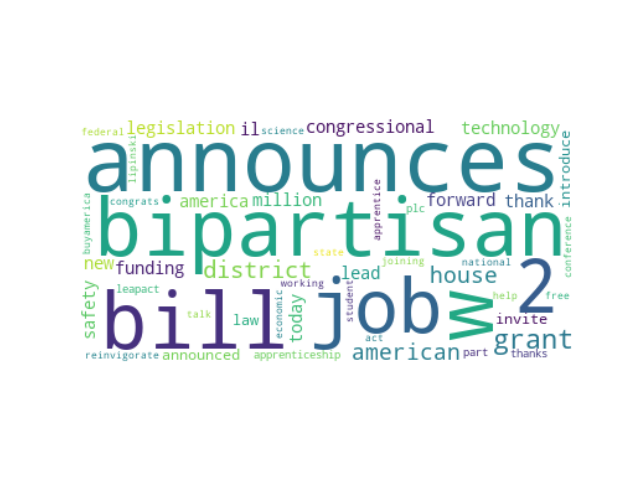

In [49]:
df=anal("""select tweet_clean from tweets2 where text like '%RepLipinski%'""")
ldamodel=wrd_cloud(df.tweet_clean)
make_chart(ldamodel)

[(0, '0.027*"tax" + 0.022*"bill" + 0.016*"trumpcare"'), (1, '0.050*"health" + 0.038*"care" + 0.036*"million"'), (2, '0.030*"american" + 0.024*"trumpcare" + 0.022*"people"')]


<IPython.core.display.Javascript object>


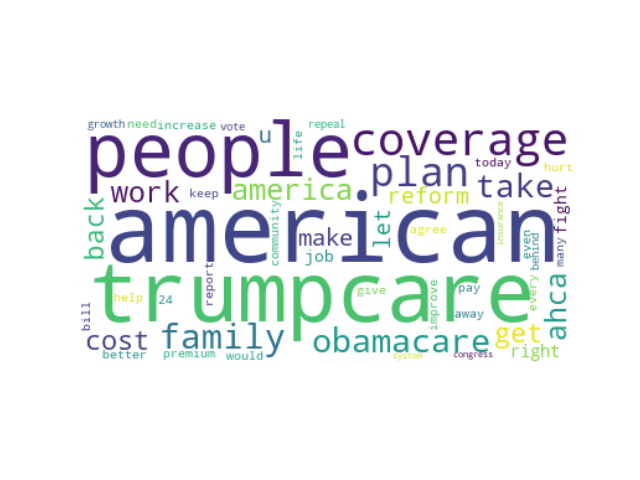

In [50]:
df=anal("""select tweet_clean from tweets2 where text like '%HouseGOP%'""")
ldamodel=wrd_cloud(df.tweet_clean)
make_chart(ldamodel)

[(0, '0.032*"via" + 0.021*"bill" + 0.018*"job"'), (1, '0.037*"via" + 0.015*"house" + 0.013*"bill"'), (2, '0.049*"via" + 0.020*"house" + 0.014*"video"')]


<IPython.core.display.Javascript object>


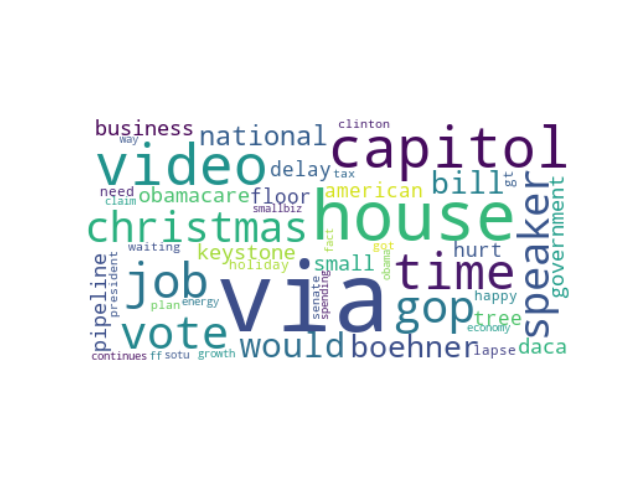

In [51]:
df=anal("""select tweet_clean from tweets2 where text like '%SpeakerBoehner'""")
ldamodel=wrd_cloud(df.tweet_clean)
make_chart(ldamodel)

In [ ]:
######### above all in one line?###################################################

[(0, '0.023*"congress" + 0.017*"vote" + 0.016*"paycheck"'), (1, '0.019*"w" + 0.019*"fake" + 0.019*"getmoneyout"'), (2, '0.023*"time" + 0.023*"house" + 0.020*"ff"')]


<IPython.core.display.Javascript object>


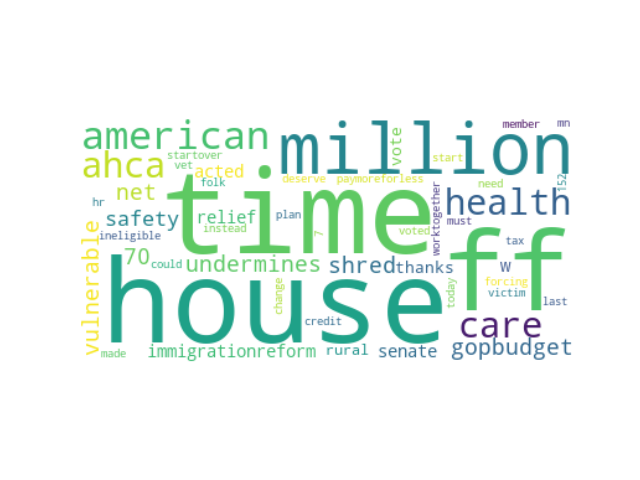

In [52]:
df=anal("""select tweet_clean from tweets2 where text like '%HouseDemocrats'""")
ldamodel=wrd_cloud(df.tweet_clean)
make_chart(ldamodel)

In [35]:
ldamodel=wrd_cloud(df.tweet_clean)

[(0, '0.104*"trump" + 0.024*"president" + 0.013*"parisagreement"'), (1, '0.029*"trump" + 0.014*"america" + 0.013*"need"'), (2, '0.037*"trumpcare" + 0.025*"budget" + 0.025*"trumpbudget"')]


<IPython.core.display.Javascript object>


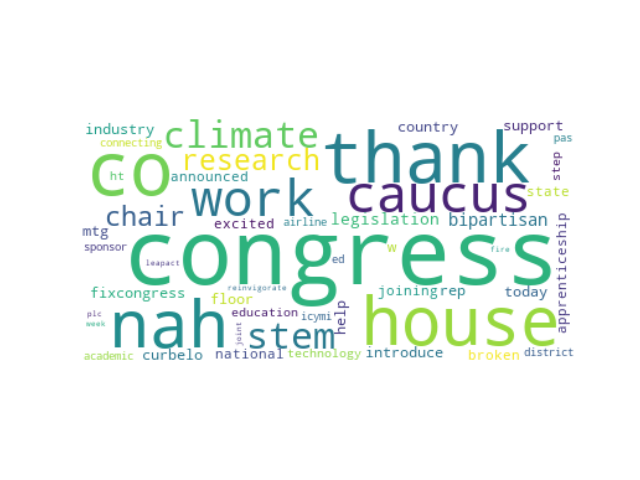

In [36]:
make_chart(ldamodel)

In [18]:
sql2="""select tweet_clean from tweets2 where text like '%RepLipinski%'"""
df2=pd.read_sql(sql2,conn)
df2.head()


,tweet_clean
0,rt miss our nitrd hearing this afternoon ...
1,rt watch live our subcommittee on rese...
2,rt at the sotu address tomorrow i ll be si...
3,rt delivers his opening statement at the ...
4,rt subcommittees discuss cybersecurity r a...


In [ ]:
#########################################################################delete below if this works

In [19]:
topicanal(df2.tweet_clean)

2021-02-12 19:23:11,385 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-12 19:23:11,410 : INFO : built Dictionary(1784 unique tokens: ['afternoon', 'deliver', 'hearing', 'miss', 'nitrd']...) from 650 documents (total 5183 corpus positions)
2021-02-12 19:23:11,424 : INFO : using symmetric alpha at 0.3333333333333333
2021-02-12 19:23:11,427 : INFO : using symmetric eta at 0.3333333333333333
2021-02-12 19:23:11,435 : INFO : using serial LDA version on this node
2021-02-12 19:23:11,442 : INFO : running online (single-pass) LDA training, 3 topics, 1 passes over the supplied corpus of 650 documents, updating model once every 100 documents, evaluating perplexity every 650 documents, iterating 50x with a convergence threshold of 0.001000
2021-02-12 19:23:11,444 : WARNING : too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2021-02-12 19:23:11,446 : INFO : PROGRESS: pass 0, at document #100/650
2021-02-

[(0, '0.024*"congress" + 0.018*"member" + 0.014*"house"'), (1, '0.015*"co" + 0.015*"announces" + 0.013*"caucus"'), (2, '0.021*"w" + 0.014*"thanks" + 0.011*"american"')]


[(0, '0.024*"congress" + 0.018*"member" + 0.014*"house"'),
 (1, '0.015*"co" + 0.015*"announces" + 0.013*"caucus"'),
 (2, '0.021*"w" + 0.014*"thanks" + 0.011*"american"')]

In [20]:
sql3="""select tweet_clean from tweets2 where text like '%HouseGOP%'"""
df3=pd.read_sql(sql3,conn)
df3.head()

,tweet_clean
0,work begins to win a gop house majority in 201...
1,meet nc legislators who get it when it comes...
2,majority leader kenny bingham is 1 of sc s b...
3,40 days since housegop passed bill to cut spe...
4,in final hours housegop still chooses to adva...


In [21]:
house_gop=topicanal(df3.tweet_clean)

2021-02-12 19:23:21,064 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-12 19:23:21,423 : INFO : adding document #10000 to Dictionary(6955 unique tokens: ['2010', 'begin', 'campaign', 'consnc', 'gop']...)
2021-02-12 19:23:21,460 : INFO : built Dictionary(7526 unique tokens: ['2010', 'begin', 'campaign', 'consnc', 'gop']...) from 11055 documents (total 109023 corpus positions)
2021-02-12 19:23:21,848 : INFO : using symmetric alpha at 0.3333333333333333
2021-02-12 19:23:21,850 : INFO : using symmetric eta at 0.3333333333333333
2021-02-12 19:23:21,853 : INFO : using serial LDA version on this node
2021-02-12 19:23:21,863 : INFO : running online (single-pass) LDA training, 3 topics, 1 passes over the supplied corpus of 11055 documents, updating model once every 100 documents, evaluating perplexity every 1000 documents, iterating 50x with a convergence threshold of 0.001000
2021-02-12 19:23:21,865 : INFO : PROGRESS: pass 0, at document #100/11055
2021-02-12 19:23:22,0

2021-02-12 19:23:23,359 : INFO : topic #1 (0.333): 0.031*"let" + 0.030*"raisethewage" + 0.027*"w" + 0.022*"american" + 0.019*"national" + 0.018*"put" + 0.017*"paying" + 0.014*"working" + 0.013*"avoid" + 0.012*"middleclassfirst"
2021-02-12 19:23:23,361 : INFO : topic #2 (0.333): 0.053*"10" + 0.032*"day" + 0.026*"wage" + 0.025*"minimum" + 0.018*"job" + 0.017*"address" + 0.016*"family" + 0.014*"fact" + 0.013*"hold" + 0.013*"state"
2021-02-12 19:23:23,363 : INFO : topic diff=0.173914, rho=0.333333
2021-02-12 19:23:23,510 : INFO : -8.872 per-word bound, 468.6 perplexity estimate based on a held-out corpus of 100 documents with 1058 words
2021-02-12 19:23:23,512 : INFO : PROGRESS: pass 0, at document #1000/11055
2021-02-12 19:23:23,622 : INFO : merging changes from 100 documents into a model of 11055 documents
2021-02-12 19:23:23,629 : INFO : topic #0 (0.333): 0.023*"still" + 0.023*"dems" + 0.022*"pas" + 0.020*"last" + 0.019*"american" + 0.019*"today" + 0.018*"htt" + 0.018*"year" + 0.017*"jo

2021-02-12 19:23:24,529 : INFO : topic #2 (0.333): 0.024*"please" + 0.021*"day" + 0.018*"congress" + 0.016*"full" + 0.015*"people" + 0.014*"join" + 0.013*"address" + 0.013*"impact" + 0.013*"across" + 0.012*"politics"
2021-02-12 19:23:24,531 : INFO : topic diff=0.179575, rho=0.235702
2021-02-12 19:23:24,534 : INFO : PROGRESS: pass 0, at document #1900/11055
2021-02-12 19:23:24,617 : INFO : merging changes from 100 documents into a model of 11055 documents
2021-02-12 19:23:24,622 : INFO : topic #0 (0.333): 0.024*"bill" + 0.024*"better" + 0.020*"work" + 0.017*"house" + 0.016*"dhs" + 0.016*"would" + 0.015*"dems" + 0.014*"shutdown" + 0.014*"america" + 0.013*"agree"
2021-02-12 19:23:24,625 : INFO : topic #1 (0.333): 0.063*"dontshutdownoursecurity" + 0.027*"time" + 0.025*"funding" + 0.024*"american" + 0.019*"http" + 0.019*"political" + 0.019*"stop" + 0.018*"security" + 0.015*"w" + 0.015*"put"
2021-02-12 19:23:24,628 : INFO : topic #2 (0.333): 0.021*"budget" + 0.018*"please" + 0.017*"day" + 0.

2021-02-12 19:23:25,785 : INFO : topic diff=0.150259, rho=0.192450
2021-02-12 19:23:25,792 : INFO : PROGRESS: pass 0, at document #2800/11055
2021-02-12 19:23:25,901 : INFO : merging changes from 100 documents into a model of 11055 documents
2021-02-12 19:23:25,907 : INFO : topic #0 (0.333): 0.039*"job" + 0.024*"support" + 0.020*"pas" + 0.018*"bill" + 0.015*"fund" + 0.015*"bringing" + 0.014*"highway" + 0.012*"today" + 0.011*"htt" + 0.011*"charter"
2021-02-12 19:23:25,909 : INFO : topic #1 (0.333): 0.039*"exim4jobs" + 0.038*"let" + 0.032*"w" + 0.031*"vote" + 0.022*"american" + 0.020*"today" + 0.019*"u" + 0.016*"bank" + 0.014*"stand" + 0.014*"im"
2021-02-12 19:23:25,912 : INFO : topic #2 (0.333): 0.022*"charleston" + 0.020*"biz" + 0.016*"day" + 0.014*"time" + 0.014*"job" + 0.013*"creating" + 0.013*"small" + 0.011*"family" + 0.011*"shut" + 0.011*"vote"
2021-02-12 19:23:25,913 : INFO : topic diff=0.162083, rho=0.188982
2021-02-12 19:23:25,915 : INFO : PROGRESS: pass 0, at document #2900/11

2021-02-12 19:23:27,066 : INFO : topic #0 (0.333): 0.021*"want" + 0.020*"economy" + 0.019*"pas" + 0.018*"american" + 0.018*"job" + 0.017*"credit" + 0.017*"would" + 0.016*"act" + 0.015*"meet" + 0.013*"bill"
2021-02-12 19:23:27,069 : INFO : topic #1 (0.333): 0.038*"gopshutdown" + 0.037*"let" + 0.037*"american" + 0.036*"time" + 0.026*"end" + 0.018*"peopleoverpolitics" + 0.017*"w" + 0.016*"stop" + 0.015*"u" + 0.014*"vote"
2021-02-12 19:23:27,072 : INFO : topic #2 (0.333): 0.022*"budget" + 0.022*"must" + 0.021*"congress" + 0.020*"health" + 0.019*"people" + 0.018*"join" + 0.017*"full" + 0.017*"time" + 0.016*"faith" + 0.015*"another"
2021-02-12 19:23:27,074 : INFO : topic diff=0.142164, rho=0.164399
2021-02-12 19:23:27,077 : INFO : PROGRESS: pass 0, at document #3800/11055
2021-02-12 19:23:27,172 : INFO : merging changes from 100 documents into a model of 11055 documents
2021-02-12 19:23:27,179 : INFO : topic #0 (0.333): 0.023*"taxpayer" + 0.021*"woman" + 0.019*"economy" + 0.019*"want" + 0.01

2021-02-12 19:23:28,080 : INFO : topic #1 (0.333): 0.027*"time" + 0.027*"american" + 0.023*"end" + 0.019*"agenda" + 0.019*"gopshutdown" + 0.018*"w" + 0.015*"put" + 0.015*"working" + 0.014*"let" + 0.011*"terrorist"
2021-02-12 19:23:28,082 : INFO : topic #2 (0.333): 0.053*"budget" + 0.024*"health" + 0.014*"family" + 0.012*"medicare" + 0.012*"must" + 0.011*"medicaid" + 0.010*"time" + 0.010*"million" + 0.009*"address" + 0.009*"people"
2021-02-12 19:23:28,084 : INFO : topic diff=0.125776, rho=0.147442
2021-02-12 19:23:28,087 : INFO : PROGRESS: pass 0, at document #4700/11055
2021-02-12 19:23:28,233 : INFO : merging changes from 100 documents into a model of 11055 documents
2021-02-12 19:23:28,241 : INFO : topic #0 (0.333): 0.018*"woman" + 0.015*"act" + 0.015*"want" + 0.011*"bill" + 0.011*"america" + 0.011*"american" + 0.010*"still" + 0.009*"witch" + 0.009*"economy" + 0.009*"taxpayer"
2021-02-12 19:23:28,243 : INFO : topic #1 (0.333): 0.034*"w" + 0.023*"american" + 0.023*"time" + 0.019*"end"

2021-02-12 19:23:29,520 : INFO : topic #2 (0.333): 0.037*"budget" + 0.021*"doyourjob" + 0.020*"health" + 0.019*"address" + 0.015*"protect" + 0.012*"flintwatercrisis" + 0.012*"discrimination" + 0.012*"public" + 0.011*"week" + 0.010*"people"
2021-02-12 19:23:29,523 : INFO : topic diff=0.153799, rho=0.134840
2021-02-12 19:23:29,526 : INFO : PROGRESS: pass 0, at document #5600/11055
2021-02-12 19:23:29,651 : INFO : merging changes from 100 documents into a model of 11055 documents
2021-02-12 19:23:29,659 : INFO : topic #0 (0.333): 0.020*"act" + 0.015*"american" + 0.013*"woman" + 0.011*"3" + 0.011*"bill" + 0.010*"yet" + 0.010*"epidemic" + 0.010*"fund" + 0.010*"case" + 0.010*"new"
2021-02-12 19:23:29,663 : INFO : topic #1 (0.333): 0.048*"zika" + 0.041*"american" + 0.035*"w" + 0.020*"crisis" + 0.017*"threat" + 0.016*"u" + 0.015*"time" + 0.014*"let" + 0.011*"confirmed" + 0.011*"right"
2021-02-12 19:23:29,668 : INFO : topic #2 (0.333): 0.033*"budget" + 0.022*"doyourjob" + 0.019*"health" + 0.018

2021-02-12 19:23:30,885 : INFO : topic #2 (0.333): 0.022*"gun" + 0.020*"vote" + 0.018*"doyourjob" + 0.015*"plan" + 0.015*"people" + 0.013*"betterway" + 0.012*"budget" + 0.011*"keep" + 0.010*"health" + 0.010*"protect"
2021-02-12 19:23:30,887 : INFO : topic diff=0.124415, rho=0.125000
2021-02-12 19:23:30,889 : INFO : PROGRESS: pass 0, at document #6500/11055
2021-02-12 19:23:31,001 : INFO : merging changes from 100 documents into a model of 11055 documents
2021-02-12 19:23:31,006 : INFO : topic #0 (0.333): 0.025*"gun" + 0.024*"violence" + 0.018*"disarmhate" + 0.016*"act" + 0.015*"bill" + 0.015*"left" + 0.013*"american" + 0.012*"year" + 0.011*"action" + 0.011*"yet"
2021-02-12 19:23:31,008 : INFO : topic #1 (0.333): 0.039*"zika" + 0.037*"american" + 0.029*"disarmhate" + 0.028*"w" + 0.025*"time" + 0.021*"dangerous" + 0.014*"vote" + 0.014*"terrorist" + 0.014*"u" + 0.012*"noflynobuy"
2021-02-12 19:23:31,011 : INFO : topic #2 (0.333): 0.024*"doyourjob" + 0.021*"gunviolence" + 0.019*"gun" + 0.0

2021-02-12 19:23:32,009 : INFO : topic #2 (0.333): 0.070*"doyourjob" + 0.037*"zika" + 0.025*"flint" + 0.024*"gunviolence" + 0.020*"health" + 0.016*"address" + 0.016*"recklessrecess" + 0.015*"congress" + 0.015*"recess" + 0.014*"people"
2021-02-12 19:23:32,011 : INFO : topic diff=0.085916, rho=0.117041
2021-02-12 19:23:32,013 : INFO : PROGRESS: pass 0, at document #7400/11055
2021-02-12 19:23:32,103 : INFO : merging changes from 100 documents into a model of 11055 documents
2021-02-12 19:23:32,111 : INFO : topic #0 (0.333): 0.022*"still" + 0.019*"act" + 0.019*"life" + 0.017*"back" + 0.017*"session" + 0.014*"house" + 0.013*"gun" + 0.012*"betterway" + 0.011*"violence" + 0.011*"7"
2021-02-12 19:23:32,114 : INFO : topic #1 (0.333): 0.088*"zika" + 0.040*"end" + 0.035*"recklessrecess" + 0.033*"time" + 0.033*"american" + 0.027*"funding" + 0.019*"crisis" + 0.016*"take" + 0.016*"u" + 0.014*"w"
2021-02-12 19:23:32,119 : INFO : topic #2 (0.333): 0.077*"doyourjob" + 0.041*"zika" + 0.028*"gunviolence

2021-02-12 19:23:33,028 : INFO : topic diff=0.121098, rho=0.110432
2021-02-12 19:23:33,032 : INFO : PROGRESS: pass 0, at document #8300/11055
2021-02-12 19:23:33,169 : INFO : merging changes from 100 documents into a model of 11055 documents
2021-02-12 19:23:33,176 : INFO : topic #0 (0.333): 0.021*"betterway" + 0.013*"american" + 0.012*"life" + 0.010*"need" + 0.010*"left" + 0.010*"america" + 0.010*"act" + 0.010*"house" + 0.009*"curesnow" + 0.009*"back"
2021-02-12 19:23:33,184 : INFO : topic #1 (0.333): 0.046*"zika" + 0.033*"american" + 0.024*"end" + 0.021*"working" + 0.018*"right" + 0.018*"u" + 0.017*"time" + 0.016*"w" + 0.016*"recklessrecess" + 0.014*"funding"
2021-02-12 19:23:33,190 : INFO : topic #2 (0.333): 0.043*"doyourjob" + 0.024*"betterway" + 0.023*"day" + 0.020*"zika" + 0.017*"people" + 0.015*"health" + 0.015*"recess" + 0.013*"plan" + 0.013*"gunviolence" + 0.012*"obamacare"
2021-02-12 19:23:33,192 : INFO : topic diff=0.141841, rho=0.109764
2021-02-12 19:23:33,195 : INFO : PROG

2021-02-12 19:23:34,405 : INFO : merging changes from 100 documents into a model of 11055 documents
2021-02-12 19:23:34,410 : INFO : topic #0 (0.333): 0.017*"would" + 0.015*"4" + 0.012*"american" + 0.012*"betterway" + 0.010*"fight" + 0.010*"america" + 0.008*"woman" + 0.008*"blocking" + 0.008*"house" + 0.008*"act"
2021-02-12 19:23:34,413 : INFO : topic #1 (0.333): 0.036*"american" + 0.019*"w" + 0.018*"stop" + 0.016*"healthcare" + 0.015*"zika" + 0.015*"take" + 0.013*"working" + 0.012*"russian" + 0.012*"right" + 0.011*"agenda"
2021-02-12 19:23:34,415 : INFO : topic #2 (0.333): 0.042*"aca" + 0.035*"repeal" + 0.027*"million" + 0.022*"health" + 0.020*"care" + 0.017*"plan" + 0.016*"people" + 0.014*"child" + 0.014*"doyourjob" + 0.012*"obamacare"
2021-02-12 19:23:34,417 : INFO : topic diff=0.125734, rho=0.104257
2021-02-12 19:23:34,420 : INFO : PROGRESS: pass 0, at document #9300/11055
2021-02-12 19:23:34,499 : INFO : merging changes from 100 documents into a model of 11055 documents
2021-02-12

2021-02-12 19:23:35,347 : INFO : topic #0 (0.333): 0.048*"bill" + 0.019*"trumpcare" + 0.016*"american" + 0.016*"would" + 0.014*"tax" + 0.012*"paymoreforless" + 0.010*"today" + 0.009*"cost" + 0.009*"know" + 0.008*"24"
2021-02-12 19:23:35,351 : INFO : topic #1 (0.333): 0.038*"american" + 0.034*"healthcare" + 0.019*"w" + 0.017*"stop" + 0.015*"working" + 0.013*"take" + 0.012*"trumpcare" + 0.010*"vote" + 0.010*"repealandreplace" + 0.010*"let"
2021-02-12 19:23:35,353 : INFO : topic #2 (0.333): 0.038*"health" + 0.030*"aca" + 0.028*"care" + 0.026*"repeal" + 0.025*"million" + 0.022*"plan" + 0.019*"people" + 0.018*"coverage" + 0.012*"family" + 0.011*"obamacare"
2021-02-12 19:23:35,355 : INFO : topic diff=0.113680, rho=0.099504
2021-02-12 19:23:35,357 : INFO : PROGRESS: pass 0, at document #10200/11055
2021-02-12 19:23:35,472 : INFO : merging changes from 100 documents into a model of 11055 documents
2021-02-12 19:23:35,479 : INFO : topic #0 (0.333): 0.043*"bill" + 0.018*"trumpcare" + 0.016*"amer

2021-02-12 19:23:36,530 : INFO : topic #1 (0.333): 0.043*"american" + 0.030*"healthcare" + 0.020*"w" + 0.019*"trumpcare" + 0.015*"take" + 0.014*"working" + 0.013*"stop" + 0.013*"condition" + 0.012*"time" + 0.011*"pre"
2021-02-12 19:23:36,534 : INFO : topic #2 (0.333): 0.044*"health" + 0.033*"care" + 0.030*"million" + 0.021*"aca" + 0.021*"coverage" + 0.020*"people" + 0.016*"trumpcare" + 0.015*"repeal" + 0.014*"plan" + 0.013*"family"
2021-02-12 19:23:36,536 : INFO : topic diff=0.126227, rho=0.095346
2021-02-12 19:23:36,622 : INFO : -8.431 per-word bound, 345.1 perplexity estimate based on a held-out corpus of 55 documents with 535 words
2021-02-12 19:23:36,623 : INFO : PROGRESS: pass 0, at document #11055/11055
2021-02-12 19:23:36,666 : INFO : merging changes from 55 documents into a model of 11055 documents
2021-02-12 19:23:36,671 : INFO : topic #0 (0.333): 0.043*"bill" + 0.022*"trumpcare" + 0.020*"tax" + 0.019*"would" + 0.014*"american" + 0.009*"america" + 0.009*"know" + 0.008*"cost" +

[(0, '0.043*"bill" + 0.022*"trumpcare" + 0.020*"tax"'), (1, '0.039*"american" + 0.028*"healthcare" + 0.018*"w"'), (2, '0.042*"health" + 0.032*"care" + 0.029*"million"')]


In [22]:
house_gop

[(0, '0.043*"bill" + 0.022*"trumpcare" + 0.020*"tax"'),
 (1, '0.039*"american" + 0.028*"healthcare" + 0.018*"w"'),
 (2, '0.042*"health" + 0.032*"care" + 0.029*"million"')]

In [23]:
sql5="""select tweet_clean from tweets2 where text like '%SpeakerBoehner'"""
df5=pd.read_sql(sql5,conn)
df5.head()

,tweet_clean
0,ap confirms current tax hike proposals would h...
1,25 jobs bills stuck in democratic run senate ...
2,25 house passed bills 4jobs are stalled in th...
3,merry christmas from the u s capitol time la...
4,for once top republican in senate mitch mcconn...


In [24]:
boehner=topicanal(df5.tweet_clean)

2021-02-12 19:23:48,147 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-12 19:23:48,152 : INFO : built Dictionary(355 unique tokens: ['ap', 'business', 'class', 'confirms', 'current']...) from 64 documents (total 563 corpus positions)
2021-02-12 19:23:48,157 : INFO : using symmetric alpha at 0.3333333333333333
2021-02-12 19:23:48,159 : INFO : using symmetric eta at 0.3333333333333333
2021-02-12 19:23:48,161 : INFO : using serial LDA version on this node
2021-02-12 19:23:48,166 : INFO : running online (single-pass) LDA training, 3 topics, 1 passes over the supplied corpus of 64 documents, updating model once every 64 documents, evaluating perplexity every 64 documents, iterating 50x with a convergence threshold of 0.001000
2021-02-12 19:23:48,168 : WARNING : too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2021-02-12 19:23:48,362 : INFO : -7.339 per-word bound, 161.9 perplexity estimate based 

[(0, '0.047*"via" + 0.015*"job" + 0.015*"bill"'), (1, '0.023*"house" + 0.023*"via" + 0.013*"bill"'), (2, '0.048*"via" + 0.017*"house" + 0.013*"gop"')]


In [25]:
sql4="""select tweet_clean from tweets2 where text like '%HouseDemocrats'"""
df4=pd.read_sql(sql4,conn)
df4.head()

,tweet_clean
0,ff
1,my statement in support of dc s desire to acqu...
2,in a few moments members of the house will vot...
3,very excited about my subcommittee assignments...
4,rt rep cheri bustos talks highway funding ...


In [27]:
house_dems=topicanal(df4.tweet_clean)

2021-02-12 19:24:10,210 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-12 19:24:10,214 : INFO : built Dictionary(163 unique tokens: ['ff', 'acquire', 'autonomy', 'budget', 'dc']...) from 23 documents (total 195 corpus positions)
2021-02-12 19:24:10,216 : INFO : using symmetric alpha at 0.3333333333333333
2021-02-12 19:24:10,218 : INFO : using symmetric eta at 0.3333333333333333
2021-02-12 19:24:10,220 : INFO : using serial LDA version on this node
2021-02-12 19:24:10,224 : INFO : running online (single-pass) LDA training, 3 topics, 1 passes over the supplied corpus of 23 documents, updating model once every 23 documents, evaluating perplexity every 23 documents, iterating 50x with a convergence threshold of 0.001000
2021-02-12 19:24:10,225 : WARNING : too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2021-02-12 19:24:10,314 : INFO : -6.831 per-word bound, 113.8 perplexity estimate based on a 

[(0, '0.022*"congress" + 0.022*"fake" + 0.016*"house"'), (1, '0.017*"health" + 0.017*"million" + 0.017*"paycheck"'), (2, '0.024*"w" + 0.020*"proud" + 0.020*"amendment"')]


In [10]:
sql99="""select tweet_clean from tweets2 where retweet_count > 50"""
df99=pd.read_sql(sql99,conn)
df99.head()

,tweet_clean
0,if we printed the health care bill in regular ...
1,one caller said i would go to hell if i voted ...
2,really helping suffering people is about poli...
3,with scott brown s victory i worry about our ...
4,rt soichi stevie ray roxx take 2


In [31]:
all_tweets=topicanal(df99.tweet_clean)

2021-02-12 19:42:18,449 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-12 19:42:18,814 : INFO : adding document #10000 to Dictionary(12186 unique tokens: ['bill', 'bone', 'book', 'care', 'font']...)
2021-02-12 19:42:19,224 : INFO : adding document #20000 to Dictionary(16809 unique tokens: ['bill', 'bone', 'book', 'care', 'font']...)
2021-02-12 19:42:19,646 : INFO : adding document #30000 to Dictionary(20536 unique tokens: ['bill', 'bone', 'book', 'care', 'font']...)
2021-02-12 19:42:20,000 : INFO : adding document #40000 to Dictionary(23687 unique tokens: ['bill', 'bone', 'book', 'care', 'font']...)
2021-02-12 19:42:20,385 : INFO : adding document #50000 to Dictionary(26002 unique tokens: ['bill', 'bone', 'book', 'care', 'font']...)
2021-02-12 19:42:20,740 : INFO : adding document #60000 to Dictionary(29039 unique tokens: ['bill', 'bone', 'book', 'care', 'font']...)
2021-02-12 19:42:21,140 : INFO : adding document #70000 to Dictionary(31714 unique tokens: ['bill

2021-02-12 19:42:27,065 : INFO : topic diff=0.116272, rho=0.377964
2021-02-12 19:42:27,067 : INFO : PROGRESS: pass 0, at document #800/120615
2021-02-12 19:42:27,250 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-12 19:42:27,272 : INFO : topic #0 (0.333): 0.020*"budget" + 0.017*"american" + 0.014*"student" + 0.014*"000" + 0.013*"1" + 0.013*"president" + 0.013*"year" + 0.012*"health" + 0.012*"debt" + 0.011*"today"
2021-02-12 19:42:27,276 : INFO : topic #1 (0.333): 0.016*"u" + 0.013*"support" + 0.013*"today" + 0.012*"people" + 0.011*"w" + 0.010*"time" + 0.010*"say" + 0.010*"act" + 0.009*"right" + 0.009*"2"
2021-02-12 19:42:27,280 : INFO : topic #2 (0.333): 0.029*"obama" + 0.022*"day" + 0.020*"house" + 0.017*"job" + 0.013*"gop" + 0.013*"tax" + 0.012*"bill" + 0.011*"child" + 0.011*"http" + 0.010*"vote"
2021-02-12 19:42:27,283 : INFO : topic diff=0.099873, rho=0.353553
2021-02-12 19:42:27,285 : INFO : PROGRESS: pass 0, at document #900/120615
2021-02-12

2021-02-12 19:42:28,683 : INFO : topic #1 (0.333): 0.016*"today" + 0.014*"right" + 0.013*"act" + 0.012*"w" + 0.012*"u" + 0.011*"one" + 0.010*"state" + 0.010*"benghazi" + 0.010*"support" + 0.008*"year"
2021-02-12 19:42:28,687 : INFO : topic #2 (0.333): 0.025*"obama" + 0.022*"house" + 0.018*"president" + 0.017*"vote" + 0.015*"senate" + 0.011*"tax" + 0.011*"work" + 0.011*"bill" + 0.011*"congress" + 0.011*"spending"
2021-02-12 19:42:28,690 : INFO : topic diff=0.075441, rho=0.242536
2021-02-12 19:42:28,693 : INFO : PROGRESS: pass 0, at document #1800/120615
2021-02-12 19:42:28,792 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-12 19:42:28,812 : INFO : topic #0 (0.333): 0.022*"budget" + 0.014*"american" + 0.012*"must" + 0.011*"violence" + 0.010*"president" + 0.009*"year" + 0.009*"time" + 0.009*"benghazi" + 0.009*"woman" + 0.008*"law"
2021-02-12 19:42:28,815 : INFO : topic #1 (0.333): 0.020*"today" + 0.014*"act" + 0.012*"one" + 0.012*"benghazi" + 0.011*"r

2021-02-12 19:42:29,930 : INFO : topic #2 (0.333): 0.023*"obama" + 0.021*"house" + 0.015*"obamacare" + 0.014*"senate" + 0.013*"president" + 0.012*"bill" + 0.011*"vote" + 0.009*"day" + 0.008*"tax" + 0.008*"agree"
2021-02-12 19:42:29,932 : INFO : topic diff=0.080930, rho=0.196116
2021-02-12 19:42:29,935 : INFO : PROGRESS: pass 0, at document #2700/120615
2021-02-12 19:42:30,024 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-12 19:42:30,043 : INFO : topic #0 (0.333): 0.016*"american" + 0.011*"irs" + 0.011*"time" + 0.010*"1" + 0.009*"benghazi" + 0.009*"budget" + 0.008*"people" + 0.008*"debt" + 0.007*"must" + 0.006*"000"
2021-02-12 19:42:30,046 : INFO : topic #1 (0.333): 0.025*"tcot" + 0.016*"today" + 0.015*"benghazi" + 0.013*"right" + 0.013*"please" + 0.012*"support" + 0.010*"u" + 0.009*"pjnet" + 0.009*"w" + 0.009*"hearing"
2021-02-12 19:42:30,049 : INFO : topic #2 (0.333): 0.022*"obama" + 0.021*"house" + 0.014*"obamacare" + 0.012*"president" + 0.012*"

2021-02-12 19:42:31,190 : INFO : PROGRESS: pass 0, at document #3600/120615
2021-02-12 19:42:31,276 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-12 19:42:31,295 : INFO : topic #0 (0.333): 0.017*"american" + 0.015*"time" + 0.014*"health" + 0.014*"1" + 0.013*"pjnet" + 0.012*"think" + 0.012*"law" + 0.011*"care" + 0.009*"student" + 0.009*"cost"
2021-02-12 19:42:31,299 : INFO : topic #1 (0.333): 0.050*"pjnet" + 0.030*"tcot" + 0.017*"today" + 0.012*"amendment" + 0.012*"support" + 0.011*"right" + 0.010*"w" + 0.009*"irs" + 0.009*"u" + 0.008*"act"
2021-02-12 19:42:31,302 : INFO : topic #2 (0.333): 0.036*"obamacare" + 0.021*"obama" + 0.015*"president" + 0.014*"house" + 0.014*"agree" + 0.013*"bill" + 0.012*"job" + 0.012*"day" + 0.009*"senate" + 0.009*"gop"
2021-02-12 19:42:31,304 : INFO : topic diff=0.061454, rho=0.166667
2021-02-12 19:42:31,306 : INFO : PROGRESS: pass 0, at document #3700/120615
2021-02-12 19:42:31,396 : INFO : merging changes from 100 doc

2021-02-12 19:42:32,498 : INFO : topic #1 (0.333): 0.029*"pjnet" + 0.017*"tcot" + 0.016*"w" + 0.015*"today" + 0.011*"fund" + 0.010*"u" + 0.010*"support" + 0.009*"gov" + 0.009*"call" + 0.009*"say"
2021-02-12 19:42:32,501 : INFO : topic #2 (0.333): 0.034*"obamacare" + 0.031*"house" + 0.021*"shutdown" + 0.020*"bill" + 0.019*"vote" + 0.018*"obama" + 0.015*"gop" + 0.014*"senate" + 0.013*"government" + 0.012*"open"
2021-02-12 19:42:32,503 : INFO : topic diff=0.054301, rho=0.149071
2021-02-12 19:42:32,505 : INFO : PROGRESS: pass 0, at document #4600/120615
2021-02-12 19:42:32,584 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-12 19:42:32,604 : INFO : topic #0 (0.333): 0.020*"american" + 0.014*"health" + 0.013*"people" + 0.013*"time" + 0.011*"care" + 0.010*"debt" + 0.009*"1" + 0.008*"make" + 0.008*"law" + 0.008*"end"
2021-02-12 19:42:32,607 : INFO : topic #1 (0.333): 0.025*"pjnet" + 0.016*"w" + 0.016*"tcot" + 0.015*"today" + 0.011*"u" + 0.011*"call" + 0.01

2021-02-12 19:42:33,678 : INFO : topic #2 (0.333): 0.031*"obamacare" + 0.023*"house" + 0.022*"obama" + 0.013*"gop" + 0.013*"bill" + 0.013*"vote" + 0.013*"agree" + 0.012*"president" + 0.012*"senate" + 0.010*"plan"
2021-02-12 19:42:33,680 : INFO : topic diff=0.067326, rho=0.136083
2021-02-12 19:42:33,683 : INFO : PROGRESS: pass 0, at document #5500/120615
2021-02-12 19:42:33,762 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-12 19:42:33,781 : INFO : topic #0 (0.333): 0.021*"health" + 0.021*"american" + 0.015*"million" + 0.014*"1" + 0.014*"renewui" + 0.013*"care" + 0.011*"insurance" + 0.010*"must" + 0.010*"time" + 0.009*"people"
2021-02-12 19:42:33,784 : INFO : topic #1 (0.333): 0.020*"today" + 0.015*"tcot" + 0.014*"pjnet" + 0.011*"w" + 0.010*"year" + 0.010*"like" + 0.009*"state" + 0.008*"right" + 0.008*"obamacare" + 0.008*"one"
2021-02-12 19:42:33,788 : INFO : topic #2 (0.333): 0.030*"obamacare" + 0.025*"house" + 0.022*"obama" + 0.014*"bill" + 0.014*

2021-02-12 19:42:34,845 : INFO : topic diff=0.053321, rho=0.125988
2021-02-12 19:42:34,848 : INFO : PROGRESS: pass 0, at document #6400/120615
2021-02-12 19:42:34,945 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-12 19:42:34,966 : INFO : topic #0 (0.333): 0.025*"renewui" + 0.023*"american" + 0.017*"1" + 0.014*"time" + 0.013*"million" + 0.012*"must" + 0.011*"health" + 0.008*"people" + 0.008*"law" + 0.008*"la"
2021-02-12 19:42:34,969 : INFO : topic #1 (0.333): 0.016*"today" + 0.015*"state" + 0.012*"support" + 0.011*"tcot" + 0.011*"u" + 0.010*"w" + 0.009*"year" + 0.008*"stand" + 0.008*"woman" + 0.008*"sosvenezuela"
2021-02-12 19:42:34,972 : INFO : topic #2 (0.333): 0.024*"obama" + 0.020*"president" + 0.018*"house" + 0.015*"obamacare" + 0.013*"vote" + 0.011*"gop" + 0.010*"agree" + 0.010*"http" + 0.010*"job" + 0.010*"republican"
2021-02-12 19:42:34,975 : INFO : topic diff=0.062585, rho=0.125000
2021-02-12 19:42:34,979 : INFO : PROGRESS: pass 0, at docu

2021-02-12 19:42:36,071 : INFO : topic #0 (0.333): 0.032*"renewui" + 0.022*"american" + 0.018*"1" + 0.017*"million" + 0.014*"raisethewage" + 0.012*"time" + 0.012*"must" + 0.009*"health" + 0.009*"wage" + 0.009*"thank"
2021-02-12 19:42:36,074 : INFO : topic #1 (0.333): 0.018*"benghazi" + 0.014*"today" + 0.014*"state" + 0.013*"pjnet" + 0.012*"u" + 0.008*"tcot" + 0.008*"support" + 0.007*"right" + 0.007*"join" + 0.007*"year"
2021-02-12 19:42:36,078 : INFO : topic #2 (0.333): 0.025*"house" + 0.018*"vote" + 0.017*"senate" + 0.016*"since" + 0.014*"obama" + 0.013*"http" + 0.012*"president" + 0.011*"job" + 0.010*"bill" + 0.010*"month"
2021-02-12 19:42:36,080 : INFO : topic diff=0.051751, rho=0.117041
2021-02-12 19:42:36,082 : INFO : PROGRESS: pass 0, at document #7400/120615
2021-02-12 19:42:36,177 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-12 19:42:36,198 : INFO : topic #0 (0.333): 0.036*"renewui" + 0.024*"american" + 0.016*"1" + 0.016*"million" + 0.012

2021-02-12 19:42:37,220 : INFO : topic #1 (0.333): 0.025*"today" + 0.018*"ago" + 0.017*"equal" + 0.015*"year" + 0.014*"pjnet" + 0.013*"support" + 0.011*"u" + 0.011*"benghazi" + 0.011*"woman" + 0.008*"w"
2021-02-12 19:42:37,223 : INFO : topic #2 (0.333): 0.027*"house" + 0.018*"vote" + 0.016*"http" + 0.015*"job" + 0.013*"bill" + 0.013*"gop" + 0.012*"obama" + 0.011*"act" + 0.011*"senate" + 0.010*"president"
2021-02-12 19:42:37,226 : INFO : topic diff=0.056907, rho=0.110432
2021-02-12 19:42:37,229 : INFO : PROGRESS: pass 0, at document #8300/120615
2021-02-12 19:42:37,304 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-12 19:42:37,324 : INFO : topic #0 (0.333): 0.025*"renewui" + 0.020*"american" + 0.018*"million" + 0.014*"must" + 0.014*"student" + 0.012*"pay" + 0.011*"debt" + 0.011*"help" + 0.011*"1" + 0.011*"make"
2021-02-12 19:42:37,326 : INFO : topic #1 (0.333): 0.023*"today" + 0.021*"year" + 0.016*"ago" + 0.016*"support" + 0.015*"equal" + 0.013*"pjn

2021-02-12 19:42:38,338 : INFO : topic diff=0.053721, rho=0.104828
2021-02-12 19:42:38,341 : INFO : PROGRESS: pass 0, at document #9200/120615
2021-02-12 19:42:38,424 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-12 19:42:38,443 : INFO : topic #0 (0.333): 0.024*"renewui" + 0.021*"american" + 0.018*"must" + 0.014*"woman" + 0.013*"health" + 0.013*"htt" + 0.011*"1" + 0.010*"unemployment" + 0.009*"decision" + 0.009*"3"
2021-02-12 19:42:38,446 : INFO : topic #1 (0.333): 0.029*"today" + 0.023*"right" + 0.021*"year" + 0.021*"ago" + 0.017*"act" + 0.014*"anniversary" + 0.013*"civil" + 0.013*"scotus" + 0.011*"58" + 0.010*"woman"
2021-02-12 19:42:38,449 : INFO : topic #2 (0.333): 0.024*"house" + 0.018*"job" + 0.017*"senate" + 0.016*"vote" + 0.014*"act" + 0.013*"work" + 0.013*"passed" + 0.013*"create" + 0.012*"watch" + 0.012*"bill"
2021-02-12 19:42:38,452 : INFO : topic diff=0.036741, rho=0.104257
2021-02-12 19:42:38,454 : INFO : PROGRESS: pass 0, at document

2021-02-12 19:42:39,533 : INFO : topic #0 (0.333): 0.022*"every" + 0.019*"hour" + 0.015*"american" + 0.014*"obamafailures" + 0.011*"border" + 0.011*"must" + 0.011*"wage" + 0.010*"make" + 0.010*"renewui" + 0.010*"1"
2021-02-12 19:42:39,536 : INFO : topic #1 (0.333): 0.060*"tcot" + 0.020*"today" + 0.017*"half" + 0.017*"year" + 0.015*"ago" + 0.014*"right" + 0.012*"support" + 0.011*"list" + 0.010*"equal" + 0.010*"israel"
2021-02-12 19:42:39,539 : INFO : topic #2 (0.333): 0.027*"obama" + 0.022*"middleclassfirst" + 0.020*"house" + 0.018*"put" + 0.015*"job" + 0.015*"act" + 0.015*"dems" + 0.013*"42" + 0.012*"approval" + 0.012*"gop"
2021-02-12 19:42:39,541 : INFO : topic diff=0.043336, rho=0.099504
2021-02-12 19:42:39,544 : INFO : PROGRESS: pass 0, at document #10200/120615
2021-02-12 19:42:39,623 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-12 19:42:39,642 : INFO : topic #0 (0.333): 0.021*"every" + 0.018*"hour" + 0.016*"american" + 0.013*"obamafailures" 

2021-02-12 19:42:40,632 : INFO : topic #1 (0.333): 0.035*"tcot" + 0.019*"today" + 0.018*"access" + 0.014*"w" + 0.013*"right" + 0.011*"year" + 0.011*"support" + 0.010*"ago" + 0.010*"israel" + 0.009*"act"
2021-02-12 19:42:40,636 : INFO : topic #2 (0.333): 0.039*"middleclassfirst" + 0.027*"http" + 0.025*"put" + 0.023*"agenda" + 0.022*"job" + 0.021*"plan" + 0.018*"dem" + 0.018*"obama" + 0.016*"house" + 0.016*"act"
2021-02-12 19:42:40,638 : INFO : topic diff=0.043308, rho=0.095346
2021-02-12 19:42:40,641 : INFO : PROGRESS: pass 0, at document #11100/120615
2021-02-12 19:42:40,725 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-12 19:42:40,744 : INFO : topic #0 (0.333): 0.016*"make" + 0.015*"american" + 0.014*"every" + 0.013*"america" + 0.010*"must" + 0.010*"includes" + 0.009*"paying" + 0.009*"care" + 0.009*"million" + 0.008*"quality"
2021-02-12 19:42:40,747 : INFO : topic #1 (0.333): 0.033*"tcot" + 0.019*"access" + 0.017*"today" + 0.015*"support" + 0.013

2021-02-12 19:42:41,643 : INFO : topic diff=0.040457, rho=0.091670
2021-02-12 19:42:41,752 : INFO : -8.667 per-word bound, 406.5 perplexity estimate based on a held-out corpus of 100 documents with 1186 words
2021-02-12 19:42:41,754 : INFO : PROGRESS: pass 0, at document #12000/120615
2021-02-12 19:42:41,824 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-12 19:42:41,844 : INFO : topic #0 (0.333): 0.021*"american" + 0.019*"help" + 0.015*"must" + 0.013*"student" + 0.012*"1" + 0.010*"woman" + 0.010*"every" + 0.009*"2" + 0.009*"let" + 0.009*"million"
2021-02-12 19:42:41,847 : INFO : topic #1 (0.333): 0.022*"w" + 0.019*"woman" + 0.018*"today" + 0.015*"year" + 0.014*"support" + 0.014*"u" + 0.013*"tcot" + 0.010*"violence" + 0.010*"like" + 0.010*"day"
2021-02-12 19:42:41,849 : INFO : topic #2 (0.333): 0.019*"pas" + 0.018*"http" + 0.018*"let" + 0.018*"put" + 0.018*"middleclassfirst" + 0.016*"job" + 0.015*"house" + 0.015*"plan" + 0.015*"act" + 0.014*"work"
2

2021-02-12 19:42:42,844 : INFO : topic #1 (0.333): 0.020*"w" + 0.020*"day" + 0.016*"year" + 0.014*"today" + 0.012*"u" + 0.011*"woman" + 0.010*"ebola" + 0.009*"support" + 0.009*"say" + 0.009*"access"
2021-02-12 19:42:42,847 : INFO : topic #2 (0.333): 0.025*"pas" + 0.019*"http" + 0.018*"let" + 0.017*"job" + 0.017*"work" + 0.013*"obama" + 0.012*"put" + 0.012*"dems" + 0.011*"house" + 0.011*"fact"
2021-02-12 19:42:42,850 : INFO : topic diff=0.038905, rho=0.088045
2021-02-12 19:42:42,966 : INFO : -8.772 per-word bound, 437.3 perplexity estimate based on a held-out corpus of 100 documents with 918 words
2021-02-12 19:42:42,968 : INFO : PROGRESS: pass 0, at document #13000/120615
2021-02-12 19:42:43,050 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-12 19:42:43,070 : INFO : topic #0 (0.333): 0.025*"american" + 0.017*"raisethewage" + 0.016*"paid" + 0.014*"must" + 0.013*"sick" + 0.013*"wage" + 0.013*"help" + 0.012*"1" + 0.011*"million" + 0.011*"10"
2021-02-1

2021-02-12 19:42:44,046 : INFO : topic diff=0.041775, rho=0.085126
2021-02-12 19:42:44,050 : INFO : PROGRESS: pass 0, at document #13900/120615
2021-02-12 19:42:44,139 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-12 19:42:44,159 : INFO : topic #0 (0.333): 0.023*"american" + 0.018*"must" + 0.016*"raisethewage" + 0.013*"wage" + 0.010*"paid" + 0.010*"help" + 0.009*"1" + 0.009*"worker" + 0.008*"sick" + 0.008*"million"
2021-02-12 19:42:44,161 : INFO : topic #1 (0.333): 0.018*"today" + 0.017*"w" + 0.016*"day" + 0.012*"year" + 0.011*"u" + 0.011*"support" + 0.009*"obamacare" + 0.009*"right" + 0.008*"woman" + 0.008*"pelosi"
2021-02-12 19:42:44,164 : INFO : topic #2 (0.333): 0.024*"obama" + 0.018*"immigration" + 0.018*"pas" + 0.016*"president" + 0.013*"job" + 0.012*"vote" + 0.011*"http" + 0.010*"work" + 0.009*"act" + 0.009*"house"
2021-02-12 19:42:44,167 : INFO : topic diff=0.043529, rho=0.084819
2021-02-12 19:42:44,274 : INFO : -8.975 per-word bound, 503.

2021-02-12 19:42:45,249 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-12 19:42:45,268 : INFO : topic #0 (0.333): 0.021*"must" + 0.020*"american" + 0.015*"health" + 0.013*"help" + 0.013*"raisethewage" + 0.011*"getcovered" + 0.011*"family" + 0.010*"million" + 0.010*"wage" + 0.009*"people"
2021-02-12 19:42:45,271 : INFO : topic #1 (0.333): 0.020*"today" + 0.013*"w" + 0.013*"year" + 0.012*"u" + 0.012*"day" + 0.008*"support" + 0.008*"woman" + 0.008*"obamacare" + 0.007*"country" + 0.007*"right"
2021-02-12 19:42:45,276 : INFO : topic #2 (0.333): 0.024*"obama" + 0.018*"president" + 0.014*"vote" + 0.013*"http" + 0.012*"immigration" + 0.011*"congress" + 0.009*"pas" + 0.009*"house" + 0.009*"put" + 0.009*"senate"
2021-02-12 19:42:45,279 : INFO : topic diff=0.042210, rho=0.082199
2021-02-12 19:42:45,282 : INFO : PROGRESS: pass 0, at document #14900/120615
2021-02-12 19:42:45,352 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-

2021-02-12 19:42:46,338 : INFO : topic #0 (0.333): 0.025*"american" + 0.019*"must" + 0.014*"family" + 0.010*"help" + 0.010*"health" + 0.009*"1" + 0.008*"people" + 0.007*"million" + 0.007*"make" + 0.007*"security"
2021-02-12 19:42:46,344 : INFO : topic #1 (0.333): 0.019*"today" + 0.016*"w" + 0.013*"u" + 0.012*"bigger" + 0.012*"year" + 0.010*"country" + 0.009*"support" + 0.008*"woman" + 0.008*"state" + 0.008*"right"
2021-02-12 19:42:46,348 : INFO : topic #2 (0.333): 0.026*"president" + 0.025*"obama" + 0.020*"sotu" + 0.014*"house" + 0.014*"job" + 0.013*"vote" + 0.013*"congress" + 0.013*"gop" + 0.011*"bill" + 0.011*"paycheck"
2021-02-12 19:42:46,351 : INFO : topic diff=0.047912, rho=0.079809
2021-02-12 19:42:46,354 : INFO : PROGRESS: pass 0, at document #15800/120615
2021-02-12 19:42:46,451 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-12 19:42:46,474 : INFO : topic #0 (0.333): 0.024*"american" + 0.018*"must" + 0.013*"family" + 0.011*"1" + 0.010*"help

2021-02-12 19:42:47,424 : INFO : topic #2 (0.333): 0.024*"president" + 0.022*"bill" + 0.021*"obama" + 0.019*"gop" + 0.017*"time" + 0.015*"dontshutdownoursecurity" + 0.014*"funding" + 0.014*"house" + 0.014*"vote" + 0.012*"job"
2021-02-12 19:42:47,426 : INFO : topic diff=0.042356, rho=0.077615
2021-02-12 19:42:47,428 : INFO : PROGRESS: pass 0, at document #16700/120615
2021-02-12 19:42:47,499 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-12 19:42:47,518 : INFO : topic #0 (0.333): 0.028*"american" + 0.019*"game" + 0.018*"must" + 0.014*"1" + 0.012*"health" + 0.011*"security" + 0.009*"family" + 0.008*"care" + 0.008*"htt" + 0.007*"time"
2021-02-12 19:42:47,521 : INFO : topic #1 (0.333): 0.022*"today" + 0.020*"w" + 0.012*"dhs" + 0.010*"u" + 0.010*"state" + 0.010*"year" + 0.009*"support" + 0.008*"day" + 0.008*"please" + 0.007*"bigger"
2021-02-12 19:42:47,525 : INFO : topic #2 (0.333): 0.024*"president" + 0.022*"obama" + 0.021*"bill" + 0.019*"dontshutdowno

2021-02-12 19:42:48,483 : INFO : topic diff=0.039624, rho=0.075593
2021-02-12 19:42:48,485 : INFO : PROGRESS: pass 0, at document #17600/120615
2021-02-12 19:42:48,572 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-12 19:42:48,590 : INFO : topic #0 (0.333): 0.024*"american" + 0.018*"security" + 0.018*"must" + 0.014*"game" + 0.012*"iran" + 0.012*"htt" + 0.010*"1" + 0.010*"national" + 0.008*"health" + 0.007*"infrastructure"
2021-02-12 19:42:48,593 : INFO : topic #1 (0.333): 0.020*"today" + 0.015*"w" + 0.013*"dhs" + 0.012*"u" + 0.012*"state" + 0.010*"support" + 0.010*"road" + 0.009*"bridge" + 0.009*"bigger" + 0.008*"year"
2021-02-12 19:42:48,597 : INFO : topic #2 (0.333): 0.024*"dontshutdownoursecurity" + 0.022*"bill" + 0.021*"president" + 0.021*"obama" + 0.016*"gop" + 0.015*"house" + 0.014*"time" + 0.014*"need" + 0.014*"job" + 0.014*"http"
2021-02-12 19:42:48,600 : INFO : topic diff=0.043963, rho=0.075378
2021-02-12 19:42:48,602 : INFO : PROGRESS: pa

2021-02-12 19:42:49,588 : INFO : topic diff=0.039569, rho=0.073721
2021-02-12 19:42:49,590 : INFO : PROGRESS: pass 0, at document #18500/120615
2021-02-12 19:42:49,668 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-12 19:42:49,686 : INFO : topic #0 (0.333): 0.021*"american" + 0.020*"must" + 0.019*"family" + 0.016*"budget" + 0.013*"harder" + 0.013*"infrastructure" + 0.012*"deserve" + 0.011*"security" + 0.011*"iran" + 0.011*"working"
2021-02-12 19:42:49,690 : INFO : topic #1 (0.333): 0.019*"today" + 0.015*"value" + 0.014*"w" + 0.012*"u" + 0.010*"state" + 0.010*"support" + 0.008*"first" + 0.008*"year" + 0.008*"road" + 0.007*"bridge"
2021-02-12 19:42:49,693 : INFO : topic #2 (0.333): 0.028*"paycheck" + 0.026*"better" + 0.021*"bigger" + 0.020*"http" + 0.020*"put" + 0.017*"obama" + 0.015*"bill" + 0.015*"time" + 0.015*"president" + 0.014*"house"
2021-02-12 19:42:49,696 : INFO : topic diff=0.031363, rho=0.073521
2021-02-12 19:42:49,704 : INFO : PROGRESS: p

2021-02-12 19:42:50,792 : INFO : topic #0 (0.333): 0.023*"american" + 0.020*"must" + 0.016*"student" + 0.016*"family" + 0.015*"loan" + 0.012*"bankonstudents" + 0.012*"fight" + 0.012*"2" + 0.011*"iran" + 0.011*"borrower"
2021-02-12 19:42:50,796 : INFO : topic #1 (0.333): 0.021*"today" + 0.019*"day" + 0.014*"right" + 0.013*"scotus" + 0.012*"w" + 0.010*"u" + 0.010*"law" + 0.009*"lovecantwait" + 0.009*"love" + 0.008*"equal"
2021-02-12 19:42:50,799 : INFO : topic #2 (0.333): 0.021*"bill" + 0.018*"http" + 0.017*"paycheck" + 0.017*"better" + 0.015*"let" + 0.014*"congress" + 0.014*"time" + 0.013*"obama" + 0.013*"american" + 0.013*"put"
2021-02-12 19:42:50,803 : INFO : topic diff=0.058677, rho=0.071796
2021-02-12 19:42:50,805 : INFO : PROGRESS: pass 0, at document #19500/120615
2021-02-12 19:42:50,875 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-12 19:42:50,894 : INFO : topic #0 (0.333): 0.023*"must" + 0.022*"american" + 0.016*"family" + 0.015*"student" +

2021-02-12 19:42:51,880 : INFO : topic #1 (0.333): 0.021*"day" + 0.019*"today" + 0.014*"u" + 0.014*"highway" + 0.009*"right" + 0.009*"week" + 0.009*"support" + 0.008*"join" + 0.008*"w" + 0.008*"trust"
2021-02-12 19:42:51,883 : INFO : topic #2 (0.333): 0.026*"bill" + 0.018*"let" + 0.017*"fund" + 0.013*"http" + 0.013*"president" + 0.012*"american" + 0.012*"congress" + 0.012*"gop" + 0.011*"house" + 0.010*"obama"
2021-02-12 19:42:51,886 : INFO : topic diff=0.039161, rho=0.070186
2021-02-12 19:42:51,891 : INFO : PROGRESS: pass 0, at document #20400/120615
2021-02-12 19:42:51,975 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-12 19:42:51,993 : INFO : topic #0 (0.333): 0.022*"loan" + 0.021*"american" + 0.017*"family" + 0.016*"let" + 0.016*"must" + 0.016*"student" + 0.011*"2" + 0.011*"iran" + 0.011*"bankonstudents" + 0.011*"business"
2021-02-12 19:42:51,997 : INFO : topic #1 (0.333): 0.020*"day" + 0.018*"today" + 0.016*"highway" + 0.014*"u" + 0.011*"right"

2021-02-12 19:42:52,954 : INFO : topic diff=0.039327, rho=0.068680
2021-02-12 19:42:52,957 : INFO : PROGRESS: pass 0, at document #21300/120615
2021-02-12 19:42:53,033 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-12 19:42:53,052 : INFO : topic #0 (0.333): 0.020*"american" + 0.015*"let" + 0.014*"family" + 0.014*"loan" + 0.013*"must" + 0.013*"help" + 0.012*"student" + 0.011*"2" + 0.011*"000" + 0.010*"htt"
2021-02-12 19:42:53,055 : INFO : topic #1 (0.333): 0.022*"today" + 0.021*"u" + 0.017*"bank" + 0.017*"day" + 0.010*"right" + 0.010*"creating" + 0.010*"year" + 0.009*"ex" + 0.008*"state" + 0.008*"highway"
2021-02-12 19:42:53,060 : INFO : topic #2 (0.333): 0.026*"job" + 0.023*"im" + 0.023*"exim4jobs" + 0.021*"let" + 0.017*"http" + 0.016*"bill" + 0.014*"ex" + 0.013*"need" + 0.013*"vote" + 0.011*"fund"
2021-02-12 19:42:53,063 : INFO : topic diff=0.034856, rho=0.068519
2021-02-12 19:42:53,066 : INFO : PROGRESS: pass 0, at document #21400/120615
2021-02-

2021-02-12 19:42:54,117 : INFO : topic #1 (0.333): 0.025*"today" + 0.014*"u" + 0.012*"support" + 0.012*"day" + 0.011*"flag" + 0.011*"state" + 0.010*"stand" + 0.010*"bank" + 0.010*"symbol" + 0.009*"scotus"
2021-02-12 19:42:54,121 : INFO : topic #2 (0.333): 0.026*"exim4jobs" + 0.023*"job" + 0.019*"http" + 0.018*"let" + 0.017*"im" + 0.016*"vote" + 0.015*"bill" + 0.014*"american" + 0.014*"need" + 0.011*"congress"
2021-02-12 19:42:54,127 : INFO : topic diff=0.035069, rho=0.067116
2021-02-12 19:42:54,129 : INFO : PROGRESS: pass 0, at document #22300/120615
2021-02-12 19:42:54,201 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-12 19:42:54,220 : INFO : topic #0 (0.333): 0.027*"must" + 0.019*"american" + 0.015*"let" + 0.012*"every" + 0.011*"small" + 0.010*"family" + 0.009*"help" + 0.009*"htt" + 0.009*"iran" + 0.008*"time"
2021-02-12 19:42:54,222 : INFO : topic #1 (0.333): 0.025*"today" + 0.014*"right" + 0.013*"u" + 0.011*"support" + 0.011*"day" + 0.011*"sta

2021-02-12 19:42:55,213 : INFO : topic diff=0.030182, rho=0.065795
2021-02-12 19:42:55,215 : INFO : PROGRESS: pass 0, at document #23200/120615
2021-02-12 19:42:55,298 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-12 19:42:55,317 : INFO : topic #0 (0.333): 0.022*"must" + 0.017*"american" + 0.014*"voice" + 0.012*"iran" + 0.012*"family" + 0.011*"let" + 0.009*"planned" + 0.009*"yr" + 0.009*"every" + 0.008*"health"
2021-02-12 19:42:55,320 : INFO : topic #1 (0.333): 0.023*"today" + 0.020*"right" + 0.009*"equality" + 0.009*"flag" + 0.009*"stand" + 0.009*"u" + 0.008*"happy" + 0.008*"day" + 0.008*"state" + 0.008*"next"
2021-02-12 19:42:55,324 : INFO : topic #2 (0.333): 0.026*"vote" + 0.015*"agree" + 0.014*"bill" + 0.014*"job" + 0.013*"exim4jobs" + 0.012*"http" + 0.012*"need" + 0.011*"pas" + 0.011*"let" + 0.011*"american"
2021-02-12 19:42:55,327 : INFO : topic diff=0.028159, rho=0.065653
2021-02-12 19:42:55,331 : INFO : PROGRESS: pass 0, at document #23300

2021-02-12 19:42:56,373 : INFO : topic #0 (0.333): 0.024*"american" + 0.015*"must" + 0.015*"million" + 0.014*"iran" + 0.013*"let" + 0.010*"every" + 0.010*"1" + 0.010*"time" + 0.009*"loan" + 0.008*"family"
2021-02-12 19:42:56,376 : INFO : topic #1 (0.333): 0.028*"right" + 0.019*"today" + 0.010*"citizen" + 0.010*"happy" + 0.009*"sw" + 0.009*"join" + 0.009*"stand" + 0.009*"support" + 0.008*"w" + 0.008*"democracy"
2021-02-12 19:42:56,380 : INFO : topic #2 (0.333): 0.029*"vote" + 0.022*"agree" + 0.014*"american" + 0.014*"need" + 0.013*"bill" + 0.012*"time" + 0.012*"gop" + 0.012*"http" + 0.011*"let" + 0.011*"term"
2021-02-12 19:42:56,382 : INFO : topic diff=0.039098, rho=0.064416
2021-02-12 19:42:56,386 : INFO : PROGRESS: pass 0, at document #24200/120615
2021-02-12 19:42:56,462 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-12 19:42:56,483 : INFO : topic #0 (0.333): 0.023*"american" + 0.014*"must" + 0.014*"iran" + 0.014*"million" + 0.012*"let" + 0.010*"

2021-02-12 19:42:57,460 : INFO : topic #2 (0.333): 0.027*"american" + 0.022*"gopshutdown" + 0.022*"vote" + 0.021*"want" + 0.017*"budget" + 0.016*"time" + 0.013*"congress" + 0.013*"agreement" + 0.013*"agree" + 0.012*"another"
2021-02-12 19:42:57,462 : INFO : topic diff=0.032426, rho=0.063246
2021-02-12 19:42:57,464 : INFO : PROGRESS: pass 0, at document #25100/120615
2021-02-12 19:42:57,540 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-12 19:42:57,558 : INFO : topic #0 (0.333): 0.024*"american" + 0.018*"must" + 0.016*"iran" + 0.013*"family" + 0.012*"4" + 0.010*"health" + 0.009*"time" + 0.009*"irandeal" + 0.009*"million" + 0.009*"let"
2021-02-12 19:42:57,562 : INFO : topic #1 (0.333): 0.021*"right" + 0.020*"today" + 0.011*"u" + 0.009*"support" + 0.009*"anniversary" + 0.009*"year" + 0.009*"sw" + 0.008*"happy" + 0.008*"w" + 0.008*"ago"
2021-02-12 19:42:57,567 : INFO : topic #2 (0.333): 0.028*"american" + 0.024*"gopshutdown" + 0.021*"vote" + 0.020*"wan

2021-02-12 19:42:58,518 : INFO : PROGRESS: pass 0, at document #26000/120615
2021-02-12 19:42:58,587 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-12 19:42:58,606 : INFO : topic #0 (0.333): 0.020*"american" + 0.020*"must" + 0.013*"million" + 0.013*"4" + 0.012*"health" + 0.011*"planned" + 0.010*"iran" + 0.010*"family" + 0.010*"time" + 0.010*"parenthood"
2021-02-12 19:42:58,609 : INFO : topic #1 (0.333): 0.017*"today" + 0.014*"right" + 0.010*"u" + 0.009*"world" + 0.008*"woman" + 0.007*"attack" + 0.007*"state" + 0.007*"happy" + 0.007*"support" + 0.007*"w"
2021-02-12 19:42:58,612 : INFO : topic #2 (0.333): 0.032*"gopshutdown" + 0.028*"american" + 0.021*"time" + 0.020*"another" + 0.018*"want" + 0.015*"vote" + 0.014*"http" + 0.012*"agree" + 0.011*"stop" + 0.011*"budget"
2021-02-12 19:42:58,615 : INFO : topic diff=0.032938, rho=0.062017
2021-02-12 19:42:58,618 : INFO : PROGRESS: pass 0, at document #26100/120615
2021-02-12 19:42:58,686 : INFO : merging c

2021-02-12 19:42:59,571 : INFO : topic #1 (0.333): 0.017*"today" + 0.012*"state" + 0.010*"right" + 0.009*"u" + 0.008*"clinton" + 0.008*"benghazi" + 0.008*"first" + 0.007*"support" + 0.007*"join" + 0.007*"world"
2021-02-12 19:42:59,575 : INFO : topic #2 (0.333): 0.024*"american" + 0.022*"time" + 0.019*"want" + 0.018*"gopshutdown" + 0.014*"another" + 0.014*"bill" + 0.013*"congress" + 0.012*"vote" + 0.012*"http" + 0.010*"let"
2021-02-12 19:42:59,577 : INFO : topic diff=0.035365, rho=0.060971
2021-02-12 19:42:59,679 : INFO : -9.288 per-word bound, 625.0 perplexity estimate based on a held-out corpus of 100 documents with 910 words
2021-02-12 19:42:59,681 : INFO : PROGRESS: pass 0, at document #27000/120615
2021-02-12 19:42:59,751 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-12 19:42:59,773 : INFO : topic #0 (0.333): 0.018*"must" + 0.015*"american" + 0.012*"4" + 0.012*"1" + 0.010*"htt" + 0.009*"family" + 0.008*"chaos" + 0.008*"credit" + 0.008*"health"

2021-02-12 19:43:00,652 : INFO : topic #2 (0.333): 0.021*"american" + 0.016*"time" + 0.015*"committee" + 0.013*"want" + 0.012*"congress" + 0.011*"gopshutdown" + 0.011*"bill" + 0.011*"watch" + 0.011*"taxpayer" + 0.010*"agree"
2021-02-12 19:43:00,654 : INFO : topic diff=0.026249, rho=0.059976
2021-02-12 19:43:00,656 : INFO : PROGRESS: pass 0, at document #27900/120615
2021-02-12 19:43:00,754 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-12 19:43:00,774 : INFO : topic #0 (0.333): 0.017*"must" + 0.015*"million" + 0.014*"health" + 0.013*"1" + 0.012*"american" + 0.012*"family" + 0.010*"care" + 0.009*"woman" + 0.009*"ensure" + 0.009*"security"
2021-02-12 19:43:00,777 : INFO : topic #1 (0.333): 0.015*"today" + 0.014*"u" + 0.010*"state" + 0.009*"attack" + 0.009*"w" + 0.009*"support" + 0.008*"day" + 0.007*"happy" + 0.007*"select" + 0.007*"benghazi"
2021-02-12 19:43:00,780 : INFO : topic #2 (0.333): 0.021*"american" + 0.016*"time" + 0.015*"committee" + 0.013

2021-02-12 19:43:01,726 : INFO : topic diff=0.035610, rho=0.059028
2021-02-12 19:43:01,728 : INFO : PROGRESS: pass 0, at document #28800/120615
2021-02-12 19:43:01,806 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-12 19:43:01,825 : INFO : topic #0 (0.333): 0.022*"must" + 0.014*"woman" + 0.012*"million" + 0.012*"family" + 0.012*"health" + 0.011*"1" + 0.011*"american" + 0.011*"keep" + 0.010*"security" + 0.009*"let"
2021-02-12 19:43:01,828 : INFO : topic #1 (0.333): 0.016*"today" + 0.014*"u" + 0.011*"refugee" + 0.010*"w" + 0.010*"attack" + 0.009*"state" + 0.009*"day" + 0.008*"terrorist" + 0.007*"syrian" + 0.007*"honor"
2021-02-12 19:43:01,832 : INFO : topic #2 (0.333): 0.019*"american" + 0.018*"time" + 0.017*"congress" + 0.017*"gopshutdown" + 0.013*"another" + 0.013*"watch" + 0.012*"need" + 0.012*"day" + 0.011*"want" + 0.011*"committee"
2021-02-12 19:43:01,838 : INFO : topic diff=0.030476, rho=0.058926
2021-02-12 19:43:01,840 : INFO : PROGRESS: pass 

2021-02-12 19:43:02,846 : INFO : topic #0 (0.333): 0.025*"must" + 0.016*"health" + 0.015*"1" + 0.012*"2" + 0.010*"security" + 0.010*"buy" + 0.009*"american" + 0.009*"weapon" + 0.009*"keep" + 0.009*"insurance"
2021-02-12 19:43:02,849 : INFO : topic #1 (0.333): 0.019*"today" + 0.017*"terrorist" + 0.015*"u" + 0.013*"gun" + 0.012*"w" + 0.009*"state" + 0.009*"refugee" + 0.008*"country" + 0.008*"year" + 0.007*"attack"
2021-02-12 19:43:02,852 : INFO : topic #2 (0.333): 0.021*"congress" + 0.019*"time" + 0.016*"bill" + 0.014*"american" + 0.014*"act" + 0.012*"watch" + 0.011*"obama" + 0.011*"vote" + 0.010*"need" + 0.010*"agree"
2021-02-12 19:43:02,854 : INFO : topic diff=0.036732, rho=0.058026
2021-02-12 19:43:02,856 : INFO : PROGRESS: pass 0, at document #29800/120615
2021-02-12 19:43:02,932 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-12 19:43:02,950 : INFO : topic #0 (0.333): 0.025*"must" + 0.015*"health" + 0.015*"1" + 0.011*"2" + 0.010*"american" + 0.00

2021-02-12 19:43:03,918 : INFO : topic #2 (0.333): 0.027*"congress" + 0.020*"time" + 0.016*"president" + 0.016*"obama" + 0.015*"american" + 0.014*"bill" + 0.011*"watch" + 0.010*"need" + 0.010*"action" + 0.010*"house"
2021-02-12 19:43:03,920 : INFO : topic diff=0.023855, rho=0.057166
2021-02-12 19:43:03,922 : INFO : PROGRESS: pass 0, at document #30700/120615
2021-02-12 19:43:03,994 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-12 19:43:04,014 : INFO : topic #0 (0.333): 0.023*"must" + 0.013*"health" + 0.012*"american" + 0.011*"1" + 0.009*"year" + 0.009*"fight" + 0.009*"woman" + 0.009*"2" + 0.008*"5" + 0.008*"life"
2021-02-12 19:43:04,017 : INFO : topic #1 (0.333): 0.020*"gun" + 0.016*"today" + 0.012*"terrorist" + 0.011*"u" + 0.011*"w" + 0.011*"state" + 0.008*"tonight" + 0.007*"right" + 0.007*"year" + 0.007*"country"
2021-02-12 19:43:04,020 : INFO : topic #2 (0.333): 0.025*"congress" + 0.020*"time" + 0.018*"president" + 0.016*"obama" + 0.016*"americ

2021-02-12 19:43:04,979 : INFO : PROGRESS: pass 0, at document #31600/120615
2021-02-12 19:43:05,060 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-12 19:43:05,079 : INFO : topic #0 (0.333): 0.016*"must" + 0.015*"iran" + 0.013*"health" + 0.012*"american" + 0.012*"1" + 0.010*"woman" + 0.010*"2" + 0.009*"life" + 0.008*"make" + 0.008*"year"
2021-02-12 19:43:05,082 : INFO : topic #1 (0.333): 0.020*"today" + 0.012*"gun" + 0.012*"w" + 0.011*"state" + 0.010*"u" + 0.009*"right" + 0.008*"year" + 0.007*"terrorist" + 0.007*"tonight" + 0.006*"country"
2021-02-12 19:43:05,086 : INFO : topic #2 (0.333): 0.019*"president" + 0.019*"american" + 0.017*"congress" + 0.017*"obama" + 0.016*"sotu" + 0.014*"time" + 0.011*"action" + 0.010*"need" + 0.010*"bill" + 0.009*"watch"
2021-02-12 19:43:05,088 : INFO : topic diff=0.040082, rho=0.056254
2021-02-12 19:43:05,091 : INFO : PROGRESS: pass 0, at document #31700/120615
2021-02-12 19:43:05,161 : INFO : merging changes from 10

2021-02-12 19:43:06,134 : INFO : topic #1 (0.333): 0.022*"today" + 0.016*"right" + 0.012*"w" + 0.011*"state" + 0.011*"recommit" + 0.008*"u" + 0.008*"year" + 0.008*"voting" + 0.008*"gun" + 0.007*"law"
2021-02-12 19:43:06,137 : INFO : topic #2 (0.333): 0.019*"president" + 0.015*"american" + 0.015*"congress" + 0.014*"obama" + 0.013*"time" + 0.011*"job" + 0.011*"gopdebate" + 0.010*"gop" + 0.010*"sotu" + 0.009*"need"
2021-02-12 19:43:06,140 : INFO : topic diff=0.029722, rho=0.055470
2021-02-12 19:43:06,142 : INFO : PROGRESS: pass 0, at document #32600/120615
2021-02-12 19:43:06,216 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-12 19:43:06,235 : INFO : topic #0 (0.333): 0.017*"must" + 0.012*"american" + 0.011*"1" + 0.010*"let" + 0.010*"family" + 0.010*"iran" + 0.010*"fighting" + 0.010*"health" + 0.009*"woman" + 0.008*"2"
2021-02-12 19:43:06,238 : INFO : topic #1 (0.333): 0.021*"today" + 0.018*"right" + 0.011*"w" + 0.011*"state" + 0.010*"recommit" + 0.00

2021-02-12 19:43:07,240 : INFO : topic diff=0.029992, rho=0.054718
2021-02-12 19:43:07,242 : INFO : PROGRESS: pass 0, at document #33500/120615
2021-02-12 19:43:07,311 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-12 19:43:07,329 : INFO : topic #0 (0.333): 0.018*"must" + 0.011*"american" + 0.011*"2" + 0.010*"1" + 0.010*"great" + 0.009*"year" + 0.008*"veteran" + 0.008*"family" + 0.008*"make" + 0.008*"let"
2021-02-12 19:43:07,332 : INFO : topic #1 (0.333): 0.022*"today" + 0.013*"right" + 0.010*"state" + 0.009*"w" + 0.009*"justice" + 0.008*"year" + 0.008*"u" + 0.007*"scalia" + 0.007*"one" + 0.007*"tonight"
2021-02-12 19:43:07,335 : INFO : topic #2 (0.333): 0.017*"president" + 0.016*"time" + 0.013*"gopdebate" + 0.013*"congress" + 0.012*"obama" + 0.012*"american" + 0.010*"senate" + 0.010*"job" + 0.009*"need" + 0.009*"watch"
2021-02-12 19:43:07,337 : INFO : topic diff=0.030061, rho=0.054636
2021-02-12 19:43:07,340 : INFO : PROGRESS: pass 0, at document 

2021-02-12 19:43:08,344 : INFO : topic #0 (0.333): 0.018*"must" + 0.012*"american" + 0.010*"great" + 0.009*"1" + 0.009*"2" + 0.008*"year" + 0.007*"make" + 0.007*"million" + 0.007*"let" + 0.007*"family"
2021-02-12 19:43:08,348 : INFO : topic #1 (0.333): 0.020*"today" + 0.012*"scotus" + 0.012*"right" + 0.010*"state" + 0.009*"justice" + 0.009*"john" + 0.009*"w" + 0.009*"day" + 0.008*"one" + 0.008*"u"
2021-02-12 19:43:08,351 : INFO : topic #2 (0.333): 0.019*"gopdebate" + 0.019*"president" + 0.014*"time" + 0.013*"vote" + 0.012*"american" + 0.011*"job" + 0.011*"senate" + 0.011*"need" + 0.011*"nominee" + 0.011*"budget"
2021-02-12 19:43:08,353 : INFO : topic diff=0.027434, rho=0.053916
2021-02-12 19:43:08,355 : INFO : PROGRESS: pass 0, at document #34500/120615
2021-02-12 19:43:08,434 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-12 19:43:08,452 : INFO : topic #0 (0.333): 0.017*"must" + 0.013*"american" + 0.010*"great" + 0.009*"family" + 0.009*"1" + 0.008

2021-02-12 19:43:09,353 : INFO : topic #1 (0.333): 0.022*"today" + 0.014*"right" + 0.012*"scotus" + 0.011*"john" + 0.010*"kasich" + 0.008*"reagan" + 0.008*"state" + 0.008*"day" + 0.007*"w" + 0.007*"u"
2021-02-12 19:43:09,357 : INFO : topic #2 (0.333): 0.023*"gopdebate" + 0.018*"budget" + 0.016*"president" + 0.016*"need" + 0.014*"time" + 0.013*"vote" + 0.012*"american" + 0.011*"kasich" + 0.011*"job" + 0.011*"trump"
2021-02-12 19:43:09,359 : INFO : topic diff=0.027165, rho=0.053225
2021-02-12 19:43:09,361 : INFO : PROGRESS: pass 0, at document #35400/120615
2021-02-12 19:43:09,438 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-12 19:43:09,456 : INFO : topic #0 (0.333): 0.019*"must" + 0.012*"american" + 0.012*"family" + 0.010*"woman" + 0.009*"great" + 0.009*"year" + 0.008*"ohio" + 0.008*"flintwatercrisis" + 0.008*"kid" + 0.008*"make"
2021-02-12 19:43:09,459 : INFO : topic #1 (0.333): 0.022*"today" + 0.014*"right" + 0.012*"scotus" + 0.012*"john" + 0.01

2021-02-12 19:43:10,384 : INFO : topic #2 (0.333): 0.020*"gopdebate" + 0.020*"vote" + 0.018*"budget" + 0.013*"time" + 0.013*"kasich" + 0.013*"president" + 0.013*"job" + 0.012*"need" + 0.012*"trump" + 0.009*"want"
2021-02-12 19:43:10,386 : INFO : topic diff=0.026688, rho=0.052559
2021-02-12 19:43:10,389 : INFO : PROGRESS: pass 0, at document #36300/120615
2021-02-12 19:43:10,473 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-12 19:43:10,491 : INFO : topic #0 (0.333): 0.018*"ohio" + 0.016*"must" + 0.011*"american" + 0.010*"make" + 0.010*"family" + 0.008*"great" + 0.008*"woman" + 0.008*"poll" + 0.008*"florida" + 0.007*"year"
2021-02-12 19:43:10,494 : INFO : topic #1 (0.333): 0.023*"today" + 0.014*"john" + 0.013*"scotus" + 0.011*"right" + 0.011*"kasich" + 0.011*"state" + 0.009*"join" + 0.008*"support" + 0.008*"day" + 0.007*"u"
2021-02-12 19:43:10,497 : INFO : topic #2 (0.333): 0.020*"vote" + 0.019*"gopdebate" + 0.017*"budget" + 0.014*"president" + 0.01

2021-02-12 19:43:11,437 : INFO : PROGRESS: pass 0, at document #37200/120615
2021-02-12 19:43:11,508 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-12 19:43:11,528 : INFO : topic #0 (0.333): 0.016*"health" + 0.016*"must" + 0.013*"year" + 0.012*"american" + 0.012*"2" + 0.012*"care" + 0.011*"ohio" + 0.010*"act" + 0.009*"affordable" + 0.009*"make"
2021-02-12 19:43:11,530 : INFO : topic #1 (0.333): 0.019*"today" + 0.012*"john" + 0.010*"state" + 0.010*"w" + 0.010*"scotus" + 0.009*"kasich" + 0.009*"right" + 0.008*"u" + 0.008*"day" + 0.008*"people"
2021-02-12 19:43:11,533 : INFO : topic #2 (0.333): 0.021*"vote" + 0.020*"budget" + 0.013*"job" + 0.013*"president" + 0.012*"gopdebate" + 0.012*"time" + 0.010*"kasich" + 0.010*"need" + 0.010*"senate" + 0.010*"american"
2021-02-12 19:43:11,536 : INFO : topic diff=0.034492, rho=0.051848
2021-02-12 19:43:11,541 : INFO : PROGRESS: pass 0, at document #37300/120615
2021-02-12 19:43:11,616 : INFO : merging changes fro

2021-02-12 19:43:12,549 : INFO : topic #1 (0.333): 0.021*"today" + 0.014*"john" + 0.011*"state" + 0.010*"kasich" + 0.008*"w" + 0.008*"scotus" + 0.008*"u" + 0.007*"right" + 0.007*"first" + 0.006*"day"
2021-02-12 19:43:12,553 : INFO : topic #2 (0.333): 0.022*"vote" + 0.021*"budget" + 0.015*"house" + 0.015*"time" + 0.012*"job" + 0.012*"crisis" + 0.011*"doyourjob" + 0.011*"president" + 0.011*"kasich" + 0.011*"need"
2021-02-12 19:43:12,555 : INFO : topic diff=0.029760, rho=0.051232
2021-02-12 19:43:12,558 : INFO : PROGRESS: pass 0, at document #38200/120615
2021-02-12 19:43:12,631 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-12 19:43:12,650 : INFO : topic #0 (0.333): 0.023*"health" + 0.016*"american" + 0.015*"act" + 0.014*"care" + 0.013*"must" + 0.012*"woman" + 0.012*"affordable" + 0.012*"thanks" + 0.011*"3" + 0.010*"coverage"
2021-02-12 19:43:12,654 : INFO : topic #1 (0.333): 0.021*"today" + 0.014*"john" + 0.011*"state" + 0.010*"kasich" + 0.009*"w" +

2021-02-12 19:43:13,614 : INFO : topic diff=0.032743, rho=0.050637
2021-02-12 19:43:13,616 : INFO : PROGRESS: pass 0, at document #39100/120615
2021-02-12 19:43:13,686 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-12 19:43:13,704 : INFO : topic #0 (0.333): 0.017*"health" + 0.016*"woman" + 0.015*"american" + 0.014*"act" + 0.012*"2" + 0.011*"must" + 0.010*"every" + 0.010*"public" + 0.009*"care" + 0.009*"year"
2021-02-12 19:43:13,707 : INFO : topic #1 (0.333): 0.024*"today" + 0.012*"john" + 0.010*"kasich" + 0.009*"day" + 0.009*"state" + 0.008*"w" + 0.008*"stand" + 0.008*"u" + 0.007*"scotus" + 0.007*"country"
2021-02-12 19:43:13,710 : INFO : topic #2 (0.333): 0.022*"budget" + 0.017*"vote" + 0.015*"time" + 0.012*"house" + 0.011*"action" + 0.011*"american" + 0.010*"need" + 0.010*"crisis" + 0.010*"president" + 0.010*"congress"
2021-02-12 19:43:13,712 : INFO : topic diff=0.030139, rho=0.050572
2021-02-12 19:43:13,715 : INFO : PROGRESS: pass 0, at document

2021-02-12 19:43:14,749 : INFO : topic #0 (0.333): 0.019*"american" + 0.016*"health" + 0.014*"zika" + 0.013*"woman" + 0.011*"must" + 0.011*"threat" + 0.010*"epidemic" + 0.010*"2" + 0.010*"act" + 0.009*"year"
2021-02-12 19:43:14,753 : INFO : topic #1 (0.333): 0.022*"today" + 0.012*"john" + 0.011*"state" + 0.010*"day" + 0.009*"kasich" + 0.009*"right" + 0.008*"u" + 0.008*"protect" + 0.008*"one" + 0.007*"w"
2021-02-12 19:43:14,756 : INFO : topic #2 (0.333): 0.023*"budget" + 0.016*"house" + 0.015*"vote" + 0.015*"american" + 0.015*"time" + 0.012*"w" + 0.011*"republican" + 0.010*"action" + 0.010*"need" + 0.010*"congress"
2021-02-12 19:43:14,758 : INFO : topic diff=0.029297, rho=0.050000
2021-02-12 19:43:14,761 : INFO : PROGRESS: pass 0, at document #40100/120615
2021-02-12 19:43:14,835 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-12 19:43:14,855 : INFO : topic #0 (0.333): 0.018*"american" + 0.015*"health" + 0.014*"zika" + 0.012*"woman" + 0.011*"2" + 0.0

2021-02-12 19:43:15,749 : INFO : topic diff=0.029499, rho=0.049447
2021-02-12 19:43:15,853 : INFO : -8.474 per-word bound, 355.6 perplexity estimate based on a held-out corpus of 100 documents with 964 words
2021-02-12 19:43:15,855 : INFO : PROGRESS: pass 0, at document #41000/120615
2021-02-12 19:43:15,923 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-12 19:43:15,944 : INFO : topic #0 (0.333): 0.021*"american" + 0.018*"zika" + 0.015*"health" + 0.015*"woman" + 0.012*"1" + 0.012*"2" + 0.011*"must" + 0.010*"make" + 0.010*"act" + 0.010*"every"
2021-02-12 19:43:15,947 : INFO : topic #1 (0.333): 0.019*"today" + 0.013*"day" + 0.010*"right" + 0.009*"state" + 0.009*"community" + 0.008*"u" + 0.008*"w" + 0.008*"say" + 0.008*"one" + 0.007*"john"
2021-02-12 19:43:15,950 : INFO : topic #2 (0.333): 0.016*"vote" + 0.015*"house" + 0.014*"time" + 0.013*"budget" + 0.013*"doyourjob" + 0.012*"american" + 0.012*"congress" + 0.012*"need" + 0.011*"republican" + 0.009*"w

2021-02-12 19:43:16,895 : INFO : topic #1 (0.333): 0.021*"today" + 0.012*"day" + 0.009*"thank" + 0.008*"lgbt" + 0.008*"state" + 0.008*"right" + 0.008*"u" + 0.008*"protect" + 0.007*"say" + 0.007*"one"
2021-02-12 19:43:16,898 : INFO : topic #2 (0.333): 0.015*"doyourjob" + 0.015*"vote" + 0.013*"american" + 0.013*"address" + 0.012*"house" + 0.012*"time" + 0.011*"need" + 0.010*"gop" + 0.010*"congress" + 0.010*"republican"
2021-02-12 19:43:16,904 : INFO : topic diff=0.036312, rho=0.048853
2021-02-12 19:43:17,011 : INFO : -8.702 per-word bound, 416.4 perplexity estimate based on a held-out corpus of 100 documents with 1184 words
2021-02-12 19:43:17,013 : INFO : PROGRESS: pass 0, at document #42000/120615
2021-02-12 19:43:17,077 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-12 19:43:17,096 : INFO : topic #0 (0.333): 0.021*"zika" + 0.020*"american" + 0.019*"health" + 0.016*"woman" + 0.013*"must" + 0.011*"2" + 0.011*"great" + 0.010*"make" + 0.010*"act" + 0.

2021-02-12 19:43:17,918 : INFO : topic diff=0.025197, rho=0.048337
2021-02-12 19:43:17,921 : INFO : PROGRESS: pass 0, at document #42900/120615
2021-02-12 19:43:17,996 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-12 19:43:18,015 : INFO : topic #0 (0.333): 0.018*"zika" + 0.017*"american" + 0.016*"health" + 0.013*"woman" + 0.012*"must" + 0.012*"great" + 0.011*"poverty" + 0.010*"2" + 0.010*"act" + 0.010*"make"
2021-02-12 19:43:18,018 : INFO : topic #1 (0.333): 0.022*"today" + 0.011*"day" + 0.010*"u" + 0.009*"thank" + 0.008*"country" + 0.007*"state" + 0.007*"say" + 0.007*"right" + 0.006*"people" + 0.006*"hillary"
2021-02-12 19:43:18,021 : INFO : topic #2 (0.333): 0.015*"address" + 0.013*"doyourjob" + 0.012*"congress" + 0.012*"vote" + 0.011*"american" + 0.010*"house" + 0.009*"time" + 0.009*"crisis" + 0.009*"need" + 0.008*"gop"
2021-02-12 19:43:18,028 : INFO : topic diff=0.024480, rho=0.048280
2021-02-12 19:43:18,128 : INFO : -8.949 per-word bound, 494

2021-02-12 19:43:19,024 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-12 19:43:19,045 : INFO : topic #0 (0.333): 0.017*"american" + 0.013*"zika" + 0.013*"must" + 0.011*"health" + 0.011*"act" + 0.011*"2" + 0.010*"make" + 0.010*"woman" + 0.010*"close" + 0.009*"great"
2021-02-12 19:43:19,047 : INFO : topic #1 (0.333): 0.024*"gun" + 0.017*"today" + 0.016*"orlando" + 0.011*"violence" + 0.009*"u" + 0.008*"day" + 0.008*"terrorist" + 0.008*"thank" + 0.008*"attack" + 0.008*"stand"
2021-02-12 19:43:19,050 : INFO : topic #2 (0.333): 0.017*"enough" + 0.015*"dangerous" + 0.015*"vote" + 0.014*"filibuster" + 0.014*"congress" + 0.013*"senate" + 0.012*"time" + 0.011*"action" + 0.011*"address" + 0.011*"american"
2021-02-12 19:43:19,052 : INFO : topic diff=0.027409, rho=0.047782
2021-02-12 19:43:19,056 : INFO : PROGRESS: pass 0, at document #43900/120615
2021-02-12 19:43:19,135 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-12 1

2021-02-12 19:43:20,085 : INFO : topic #0 (0.333): 0.021*"american" + 0.014*"woman" + 0.013*"must" + 0.013*"loophole" + 0.013*"make" + 0.011*"close" + 0.010*"act" + 0.009*"2" + 0.009*"zika" + 0.009*"great"
2021-02-12 19:43:20,088 : INFO : topic #1 (0.333): 0.039*"gun" + 0.019*"today" + 0.016*"violence" + 0.013*"orlando" + 0.011*"terrorist" + 0.011*"u" + 0.008*"people" + 0.008*"right" + 0.008*"day" + 0.007*"one"
2021-02-12 19:43:20,095 : INFO : topic #2 (0.333): 0.027*"vote" + 0.018*"house" + 0.017*"american" + 0.016*"floor" + 0.015*"enough" + 0.015*"action" + 0.013*"nobillnobreak" + 0.013*"senate" + 0.012*"congress" + 0.012*"dangerous"
2021-02-12 19:43:20,098 : INFO : topic diff=0.029184, rho=0.047298
2021-02-12 19:43:20,101 : INFO : PROGRESS: pass 0, at document #44800/120615
2021-02-12 19:43:20,165 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-12 19:43:20,185 : INFO : topic #0 (0.333): 0.021*"american" + 0.014*"woman" + 0.013*"make" + 0.013*"mus

2021-02-12 19:43:21,056 : INFO : topic #1 (0.333): 0.056*"gun" + 0.027*"violence" + 0.024*"sit" + 0.019*"today" + 0.011*"proud" + 0.010*"terrorist" + 0.010*"join" + 0.010*"stand" + 0.010*"orlando" + 0.010*"thank"
2021-02-12 19:43:21,059 : INFO : topic #2 (0.333): 0.059*"nobillnobreak" + 0.036*"house" + 0.034*"vote" + 0.030*"floor" + 0.019*"action" + 0.019*"holdthefloor" + 0.016*"american" + 0.016*"demand" + 0.016*"enough" + 0.011*"nomoresilence"
2021-02-12 19:43:21,062 : INFO : topic diff=0.020661, rho=0.046829
2021-02-12 19:43:21,065 : INFO : PROGRESS: pass 0, at document #45700/120615
2021-02-12 19:43:21,130 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-12 19:43:21,149 : INFO : topic #0 (0.333): 0.020*"american" + 0.013*"make" + 0.013*"camera" + 0.012*"must" + 0.011*"woman" + 0.011*"loophole" + 0.010*"great" + 0.009*"close" + 0.009*"2" + 0.009*"act"
2021-02-12 19:43:21,152 : INFO : topic #1 (0.333): 0.057*"gun" + 0.027*"violence" + 0.025*"sit" +

2021-02-12 19:43:22,052 : INFO : topic #1 (0.333): 0.054*"gun" + 0.029*"violence" + 0.022*"sit" + 0.017*"today" + 0.010*"terrorist" + 0.009*"support" + 0.009*"proud" + 0.009*"thank" + 0.009*"u" + 0.008*"stand"
2021-02-12 19:43:22,055 : INFO : topic #2 (0.333): 0.070*"nobillnobreak" + 0.034*"house" + 0.031*"vote" + 0.025*"floor" + 0.017*"holdthefloor" + 0.017*"action" + 0.016*"american" + 0.012*"demand" + 0.012*"enough" + 0.010*"nomoresilence"
2021-02-12 19:43:22,057 : INFO : topic diff=0.031510, rho=0.046374
2021-02-12 19:43:22,060 : INFO : PROGRESS: pass 0, at document #46600/120615
2021-02-12 19:43:22,134 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-12 19:43:22,152 : INFO : topic #0 (0.333): 0.019*"american" + 0.014*"woman" + 0.012*"keep" + 0.012*"make" + 0.012*"must" + 0.011*"leave" + 0.011*"hour" + 0.009*"fight" + 0.008*"without" + 0.008*"safe"
2021-02-12 19:43:22,156 : INFO : topic #1 (0.333): 0.052*"gun" + 0.028*"violence" + 0.021*"sit" + 0

2021-02-12 19:43:23,086 : INFO : topic #1 (0.333): 0.051*"gun" + 0.030*"violence" + 0.018*"today" + 0.014*"sit" + 0.009*"right" + 0.009*"terrorist" + 0.008*"proud" + 0.008*"u" + 0.008*"silence" + 0.007*"thank"
2021-02-12 19:43:23,089 : INFO : topic #2 (0.333): 0.050*"nobillnobreak" + 0.025*"house" + 0.025*"vote" + 0.018*"floor" + 0.017*"american" + 0.016*"action" + 0.013*"time" + 0.012*"holdthefloor" + 0.011*"disarmhate" + 0.010*"bill"
2021-02-12 19:43:23,096 : INFO : topic diff=0.032118, rho=0.045932
2021-02-12 19:43:23,099 : INFO : PROGRESS: pass 0, at document #47500/120615
2021-02-12 19:43:23,173 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-12 19:43:23,192 : INFO : topic #0 (0.333): 0.021*"american" + 0.013*"must" + 0.012*"make" + 0.011*"woman" + 0.011*"keep" + 0.011*"zika" + 0.010*"2" + 0.009*"without" + 0.009*"great" + 0.008*"help"
2021-02-12 19:43:23,194 : INFO : topic #1 (0.333): 0.049*"gun" + 0.028*"violence" + 0.017*"today" + 0.013*"sit

2021-02-12 19:43:24,110 : INFO : topic #2 (0.333): 0.035*"nobillnobreak" + 0.022*"house" + 0.020*"vote" + 0.019*"american" + 0.018*"bill" + 0.017*"disarmhate" + 0.014*"floor" + 0.013*"time" + 0.013*"action" + 0.010*"want"
2021-02-12 19:43:24,113 : INFO : topic diff=0.032263, rho=0.045502
2021-02-12 19:43:24,115 : INFO : PROGRESS: pass 0, at document #48400/120615
2021-02-12 19:43:24,197 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-12 19:43:24,217 : INFO : topic #0 (0.333): 0.019*"american" + 0.012*"must" + 0.012*"make" + 0.009*"woman" + 0.009*"2" + 0.009*"great" + 0.008*"keep" + 0.008*"zika" + 0.008*"people" + 0.008*"disarmhate"
2021-02-12 19:43:24,220 : INFO : topic #1 (0.333): 0.044*"gun" + 0.026*"violence" + 0.017*"today" + 0.011*"clinton" + 0.010*"dallas" + 0.009*"day" + 0.008*"sit" + 0.008*"u" + 0.008*"people" + 0.008*"right"
2021-02-12 19:43:24,223 : INFO : topic #2 (0.333): 0.034*"nobillnobreak" + 0.024*"house" + 0.020*"vote" + 0.019*"amer

2021-02-12 19:43:25,168 : INFO : topic diff=0.026512, rho=0.045083
2021-02-12 19:43:25,171 : INFO : PROGRESS: pass 0, at document #49300/120615
2021-02-12 19:43:25,247 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-12 19:43:25,266 : INFO : topic #0 (0.333): 0.017*"zika" + 0.015*"american" + 0.010*"make" + 0.010*"must" + 0.010*"year" + 0.009*"disarmhate" + 0.008*"2" + 0.008*"time" + 0.008*"work" + 0.007*"1"
2021-02-12 19:43:25,270 : INFO : topic #1 (0.333): 0.034*"gun" + 0.019*"violence" + 0.016*"today" + 0.010*"one" + 0.010*"clinton" + 0.009*"u" + 0.009*"victim" + 0.008*"dallas" + 0.008*"people" + 0.008*"law"
2021-02-12 19:43:25,273 : INFO : topic #2 (0.333): 0.023*"nobillnobreak" + 0.020*"house" + 0.019*"disarmhate" + 0.016*"american" + 0.016*"bill" + 0.015*"vote" + 0.015*"gunviolence" + 0.015*"need" + 0.015*"time" + 0.013*"action"
2021-02-12 19:43:25,275 : INFO : topic diff=0.026549, rho=0.045038
2021-02-12 19:43:25,278 : INFO : PROGRESS: pass 0,

2021-02-12 19:43:26,271 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-12 19:43:26,291 : INFO : topic #0 (0.333): 0.014*"zika" + 0.013*"year" + 0.012*"make" + 0.011*"great" + 0.011*"american" + 0.010*"must" + 0.010*"help" + 0.009*"work" + 0.008*"break" + 0.008*"keep"
2021-02-12 19:43:26,295 : INFO : topic #1 (0.333): 0.024*"gun" + 0.014*"today" + 0.014*"violence" + 0.010*"clinton" + 0.010*"u" + 0.010*"one" + 0.008*"hillary" + 0.008*"law" + 0.007*"people" + 0.007*"right"
2021-02-12 19:43:26,300 : INFO : topic #2 (0.333): 0.016*"nobillnobreak" + 0.015*"house" + 0.014*"vote" + 0.014*"disarmhate" + 0.014*"gunviolence" + 0.013*"american" + 0.013*"time" + 0.013*"need" + 0.012*"bill" + 0.011*"republican"
2021-02-12 19:43:26,303 : INFO : topic diff=0.026774, rho=0.044632
2021-02-12 19:43:26,305 : INFO : PROGRESS: pass 0, at document #50300/120615
2021-02-12 19:43:26,372 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-12

2021-02-12 19:43:27,337 : INFO : topic #0 (0.333): 0.016*"zika" + 0.011*"great" + 0.010*"american" + 0.010*"must" + 0.010*"woman" + 0.010*"work" + 0.010*"year" + 0.009*"make" + 0.009*"health" + 0.008*"strongeramerica"
2021-02-12 19:43:27,342 : INFO : topic #1 (0.333): 0.017*"gun" + 0.013*"today" + 0.012*"hillary" + 0.012*"one" + 0.010*"violence" + 0.010*"clinton" + 0.009*"u" + 0.009*"support" + 0.008*"law" + 0.008*"thank"
2021-02-12 19:43:27,345 : INFO : topic #2 (0.333): 0.013*"house" + 0.013*"vote" + 0.013*"american" + 0.012*"need" + 0.011*"nobillnobreak" + 0.011*"trump" + 0.011*"time" + 0.010*"job" + 0.010*"republican" + 0.010*"bill"
2021-02-12 19:43:27,347 : INFO : topic diff=0.021586, rho=0.044237
2021-02-12 19:43:27,350 : INFO : PROGRESS: pass 0, at document #51200/120615
2021-02-12 19:43:27,420 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-12 19:43:27,439 : INFO : topic #0 (0.333): 0.018*"zika" + 0.011*"health" + 0.011*"great" + 0.010*"amer

2021-02-12 19:43:28,377 : INFO : topic #1 (0.333): 0.014*"today" + 0.013*"gun" + 0.012*"one" + 0.011*"clinton" + 0.011*"right" + 0.010*"hillary" + 0.009*"thank" + 0.009*"state" + 0.008*"u" + 0.008*"violence"
2021-02-12 19:43:28,381 : INFO : topic #2 (0.333): 0.013*"trump" + 0.012*"need" + 0.011*"vote" + 0.011*"american" + 0.011*"doyourjob" + 0.011*"obama" + 0.010*"house" + 0.010*"president" + 0.010*"time" + 0.010*"job"
2021-02-12 19:43:28,383 : INFO : topic diff=0.031704, rho=0.043853
2021-02-12 19:43:28,389 : INFO : PROGRESS: pass 0, at document #52100/120615
2021-02-12 19:43:28,464 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-12 19:43:28,482 : INFO : topic #0 (0.333): 0.022*"zika" + 0.010*"must" + 0.010*"american" + 0.010*"great" + 0.009*"work" + 0.009*"health" + 0.009*"million" + 0.009*"year" + 0.009*"iran" + 0.008*"woman"
2021-02-12 19:43:28,485 : INFO : topic #1 (0.333): 0.014*"today" + 0.012*"gun" + 0.012*"one" + 0.010*"clinton" + 0.010*"ri

2021-02-12 19:43:29,340 : INFO : topic diff=0.033808, rho=0.043478
2021-02-12 19:43:29,440 : INFO : -8.509 per-word bound, 364.2 perplexity estimate based on a held-out corpus of 100 documents with 968 words
2021-02-12 19:43:29,442 : INFO : PROGRESS: pass 0, at document #53000/120615
2021-02-12 19:43:29,504 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-12 19:43:29,524 : INFO : topic #0 (0.333): 0.021*"zika" + 0.010*"american" + 0.010*"woman" + 0.010*"work" + 0.010*"great" + 0.010*"help" + 0.009*"year" + 0.009*"health" + 0.009*"must" + 0.009*"iran"
2021-02-12 19:43:29,527 : INFO : topic #1 (0.333): 0.013*"today" + 0.012*"u" + 0.010*"one" + 0.010*"clinton" + 0.009*"state" + 0.009*"right" + 0.009*"hillary" + 0.009*"gun" + 0.007*"country" + 0.007*"day"
2021-02-12 19:43:29,530 : INFO : topic #2 (0.333): 0.017*"need" + 0.015*"end" + 0.015*"recklessrecess" + 0.014*"doyourjob" + 0.012*"american" + 0.012*"time" + 0.012*"trump" + 0.010*"obama" + 0.010*"back

2021-02-12 19:43:30,452 : INFO : topic #0 (0.333): 0.019*"zika" + 0.013*"work" + 0.010*"great" + 0.009*"year" + 0.009*"woman" + 0.009*"make" + 0.009*"american" + 0.009*"help" + 0.009*"1" + 0.008*"must"
2021-02-12 19:43:30,456 : INFO : topic #1 (0.333): 0.014*"today" + 0.012*"u" + 0.011*"clinton" + 0.011*"state" + 0.010*"hillary" + 0.010*"day" + 0.010*"one" + 0.008*"right" + 0.007*"thank" + 0.007*"say"
2021-02-12 19:43:30,460 : INFO : topic #2 (0.333): 0.021*"recklessrecess" + 0.017*"need" + 0.017*"end" + 0.014*"time" + 0.013*"trump" + 0.012*"want" + 0.010*"house" + 0.010*"american" + 0.010*"vote" + 0.010*"doyourjob"
2021-02-12 19:43:30,462 : INFO : topic diff=0.031103, rho=0.043073
2021-02-12 19:43:30,558 : INFO : -8.320 per-word bound, 319.5 perplexity estimate based on a held-out corpus of 100 documents with 1003 words
2021-02-12 19:43:30,560 : INFO : PROGRESS: pass 0, at document #54000/120615
2021-02-12 19:43:30,631 : INFO : merging changes from 100 documents into a model of 120615

2021-02-12 19:43:31,497 : INFO : topic #1 (0.333): 0.016*"today" + 0.012*"clinton" + 0.011*"u" + 0.010*"state" + 0.010*"hillary" + 0.010*"day" + 0.009*"one" + 0.009*"thank" + 0.007*"right" + 0.006*"country"
2021-02-12 19:43:31,500 : INFO : topic #2 (0.333): 0.023*"doyourjob" + 0.016*"need" + 0.014*"time" + 0.014*"congress" + 0.013*"recklessrecess" + 0.013*"back" + 0.012*"american" + 0.012*"end" + 0.011*"trump" + 0.010*"obama"
2021-02-12 19:43:31,502 : INFO : topic diff=0.025057, rho=0.042718
2021-02-12 19:43:31,504 : INFO : PROGRESS: pass 0, at document #54900/120615
2021-02-12 19:43:31,585 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-12 19:43:31,605 : INFO : topic #0 (0.333): 0.020*"zika" + 0.010*"work" + 0.010*"must" + 0.010*"american" + 0.010*"great" + 0.009*"1" + 0.009*"make" + 0.009*"year" + 0.008*"woman" + 0.008*"help"
2021-02-12 19:43:31,609 : INFO : topic #1 (0.333): 0.016*"today" + 0.012*"clinton" + 0.011*"u" + 0.010*"state" + 0.010*"hil

2021-02-12 19:43:32,524 : INFO : topic diff=0.026679, rho=0.042371
2021-02-12 19:43:32,526 : INFO : PROGRESS: pass 0, at document #55800/120615
2021-02-12 19:43:32,601 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-12 19:43:32,620 : INFO : topic #0 (0.333): 0.019*"zika" + 0.011*"american" + 0.010*"1" + 0.010*"great" + 0.010*"million" + 0.009*"year" + 0.009*"must" + 0.009*"work" + 0.009*"make" + 0.008*"iran"
2021-02-12 19:43:32,623 : INFO : topic #1 (0.333): 0.017*"today" + 0.011*"u" + 0.010*"clinton" + 0.009*"state" + 0.009*"thank" + 0.009*"day" + 0.009*"hillary" + 0.008*"one" + 0.007*"right" + 0.006*"gun"
2021-02-12 19:43:32,626 : INFO : topic #2 (0.333): 0.027*"doyourjob" + 0.020*"need" + 0.015*"time" + 0.013*"american" + 0.013*"zika" + 0.012*"trump" + 0.011*"congress" + 0.011*"obama" + 0.009*"house" + 0.009*"vote"
2021-02-12 19:43:32,629 : INFO : topic diff=0.027492, rho=0.042333
2021-02-12 19:43:32,633 : INFO : PROGRESS: pass 0, at document #55

2021-02-12 19:43:33,671 : INFO : topic #0 (0.333): 0.015*"zika" + 0.010*"make" + 0.010*"great" + 0.010*"year" + 0.009*"american" + 0.009*"1" + 0.009*"woman" + 0.009*"help" + 0.008*"iran" + 0.008*"million"
2021-02-12 19:43:33,676 : INFO : topic #1 (0.333): 0.018*"today" + 0.011*"clinton" + 0.010*"hillary" + 0.010*"u" + 0.009*"thank" + 0.008*"one" + 0.008*"state" + 0.008*"day" + 0.007*"country" + 0.007*"right"
2021-02-12 19:43:33,680 : INFO : topic #2 (0.333): 0.024*"doyourjob" + 0.018*"trump" + 0.016*"need" + 0.012*"time" + 0.012*"obama" + 0.011*"american" + 0.010*"congress" + 0.010*"republican" + 0.009*"bill" + 0.009*"vote"
2021-02-12 19:43:33,683 : INFO : topic diff=0.025233, rho=0.041996
2021-02-12 19:43:33,685 : INFO : PROGRESS: pass 0, at document #56800/120615
2021-02-12 19:43:33,757 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-12 19:43:33,776 : INFO : topic #0 (0.333): 0.014*"zika" + 0.010*"make" + 0.010*"great" + 0.009*"american" + 0.009*"

2021-02-12 19:43:34,715 : INFO : topic #2 (0.333): 0.018*"doyourjob" + 0.018*"trump" + 0.014*"need" + 0.013*"obama" + 0.011*"vote" + 0.011*"time" + 0.010*"american" + 0.010*"back" + 0.009*"bill" + 0.009*"congress"
2021-02-12 19:43:34,718 : INFO : topic diff=0.023700, rho=0.041667
2021-02-12 19:43:34,720 : INFO : PROGRESS: pass 0, at document #57700/120615
2021-02-12 19:43:34,789 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-12 19:43:34,808 : INFO : topic #0 (0.333): 0.011*"make" + 0.010*"left" + 0.009*"great" + 0.009*"zika" + 0.009*"year" + 0.008*"get" + 0.008*"1" + 0.008*"american" + 0.007*"work" + 0.007*"penny"
2021-02-12 19:43:34,811 : INFO : topic #1 (0.333): 0.016*"today" + 0.011*"right" + 0.011*"clinton" + 0.010*"day" + 0.009*"hillary" + 0.008*"u" + 0.008*"state" + 0.008*"one" + 0.007*"thank" + 0.006*"country"
2021-02-12 19:43:34,814 : INFO : topic #2 (0.333): 0.018*"doyourjob" + 0.017*"trump" + 0.015*"need" + 0.014*"vote" + 0.013*"obama" + 

2021-02-12 19:43:35,756 : INFO : PROGRESS: pass 0, at document #58600/120615
2021-02-12 19:43:35,827 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-12 19:43:35,846 : INFO : topic #0 (0.333): 0.011*"make" + 0.009*"great" + 0.009*"1" + 0.008*"year" + 0.008*"get" + 0.008*"woman" + 0.008*"tax" + 0.007*"american" + 0.007*"left" + 0.007*"46"
2021-02-12 19:43:35,849 : INFO : topic #1 (0.333): 0.017*"today" + 0.010*"clinton" + 0.009*"hillary" + 0.009*"right" + 0.008*"matthew" + 0.008*"hurricane" + 0.008*"day" + 0.008*"state" + 0.007*"support" + 0.007*"one"
2021-02-12 19:43:35,853 : INFO : topic #2 (0.333): 0.023*"trump" + 0.017*"need" + 0.016*"doyourjob" + 0.014*"vote" + 0.012*"obama" + 0.012*"debate" + 0.011*"time" + 0.009*"donald" + 0.008*"american" + 0.008*"bill"
2021-02-12 19:43:35,855 : INFO : topic diff=0.026298, rho=0.041310
2021-02-12 19:43:35,858 : INFO : PROGRESS: pass 0, at document #58700/120615
2021-02-12 19:43:35,930 : INFO : merging changes 

2021-02-12 19:43:36,875 : INFO : topic #1 (0.333): 0.017*"today" + 0.012*"clinton" + 0.010*"hillary" + 0.010*"state" + 0.009*"right" + 0.007*"stand" + 0.007*"day" + 0.007*"one" + 0.007*"thank" + 0.007*"u"
2021-02-12 19:43:36,879 : INFO : topic #2 (0.333): 0.020*"trump" + 0.017*"vote" + 0.015*"need" + 0.012*"doyourjob" + 0.011*"obama" + 0.010*"time" + 0.009*"debate" + 0.009*"american" + 0.009*"plan" + 0.009*"people"
2021-02-12 19:43:36,881 : INFO : topic diff=0.025594, rho=0.040996
2021-02-12 19:43:36,883 : INFO : PROGRESS: pass 0, at document #59600/120615
2021-02-12 19:43:36,947 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-12 19:43:36,966 : INFO : topic #0 (0.333): 0.015*"1" + 0.014*"make" + 0.012*"woman" + 0.009*"3" + 0.009*"year" + 0.008*"great" + 0.008*"get" + 0.008*"let" + 0.008*"4" + 0.007*"american"
2021-02-12 19:43:36,969 : INFO : topic #1 (0.333): 0.016*"today" + 0.013*"clinton" + 0.011*"hillary" + 0.010*"state" + 0.009*"right" + 0.007*"

2021-02-12 19:43:37,896 : INFO : topic diff=0.026343, rho=0.040689
2021-02-12 19:43:37,898 : INFO : PROGRESS: pass 0, at document #60500/120615
2021-02-12 19:43:37,972 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-12 19:43:37,992 : INFO : topic #0 (0.333): 0.016*"make" + 0.012*"1" + 0.011*"woman" + 0.010*"american" + 0.009*"great" + 0.009*"million" + 0.009*"get" + 0.008*"3" + 0.008*"year" + 0.007*"let"
2021-02-12 19:43:37,995 : INFO : topic #1 (0.333): 0.015*"today" + 0.014*"clinton" + 0.012*"hillary" + 0.011*"right" + 0.010*"state" + 0.008*"join" + 0.007*"thank" + 0.007*"election" + 0.007*"u" + 0.007*"day"
2021-02-12 19:43:37,998 : INFO : topic #2 (0.333): 0.021*"trump" + 0.021*"vote" + 0.016*"need" + 0.014*"debate" + 0.012*"american" + 0.011*"people" + 0.011*"obama" + 0.011*"time" + 0.010*"obamacare" + 0.008*"house"
2021-02-12 19:43:38,000 : INFO : topic diff=0.025414, rho=0.040656
2021-02-12 19:43:38,002 : INFO : PROGRESS: pass 0, at document #

2021-02-12 19:43:39,024 : INFO : topic #0 (0.333): 0.017*"make" + 0.013*"woman" + 0.012*"let" + 0.011*"year" + 0.010*"1" + 0.010*"great" + 0.008*"american" + 0.008*"million" + 0.007*"strongeramerica" + 0.007*"3"
2021-02-12 19:43:39,027 : INFO : topic #1 (0.333): 0.017*"right" + 0.016*"clinton" + 0.014*"today" + 0.012*"hillary" + 0.009*"fbi" + 0.008*"state" + 0.008*"join" + 0.007*"email" + 0.007*"thank" + 0.007*"friend"
2021-02-12 19:43:39,030 : INFO : topic #2 (0.333): 0.033*"vote" + 0.018*"trump" + 0.014*"need" + 0.013*"obamacare" + 0.012*"american" + 0.011*"time" + 0.011*"people" + 0.011*"debate" + 0.009*"obama" + 0.009*"plan"
2021-02-12 19:43:39,032 : INFO : topic diff=0.030489, rho=0.040357
2021-02-12 19:43:39,034 : INFO : PROGRESS: pass 0, at document #61500/120615
2021-02-12 19:43:39,113 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-12 19:43:39,131 : INFO : topic #0 (0.333): 0.017*"make" + 0.013*"woman" + 0.012*"let" + 0.011*"year" + 0.010*"

2021-02-12 19:43:40,052 : INFO : topic #1 (0.333): 0.017*"today" + 0.014*"right" + 0.013*"clinton" + 0.012*"thank" + 0.010*"hillary" + 0.007*"election" + 0.007*"state" + 0.007*"fbi" + 0.007*"friend" + 0.007*"honor"
2021-02-12 19:43:40,055 : INFO : topic #2 (0.333): 0.045*"vote" + 0.021*"trump" + 0.018*"time" + 0.014*"need" + 0.012*"people" + 0.011*"american" + 0.011*"obamacare" + 0.010*"president" + 0.008*"plan" + 0.008*"obama"
2021-02-12 19:43:40,058 : INFO : topic diff=0.025256, rho=0.040064
2021-02-12 19:43:40,060 : INFO : PROGRESS: pass 0, at document #62400/120615
2021-02-12 19:43:40,138 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-12 19:43:40,156 : INFO : topic #0 (0.333): 0.018*"make" + 0.014*"let" + 0.014*"woman" + 0.011*"great" + 0.010*"year" + 0.009*"poll" + 0.009*"1" + 0.008*"american" + 0.008*"work" + 0.008*"win"
2021-02-12 19:43:40,160 : INFO : topic #1 (0.333): 0.017*"today" + 0.014*"right" + 0.013*"clinton" + 0.011*"thank" + 0.010*

2021-02-12 19:43:41,093 : INFO : topic #2 (0.333): 0.029*"vote" + 0.027*"trump" + 0.015*"house" + 0.015*"american" + 0.014*"president" + 0.013*"time" + 0.012*"people" + 0.011*"need" + 0.011*"white" + 0.009*"elect"
2021-02-12 19:43:41,096 : INFO : topic diff=0.026138, rho=0.039778
2021-02-12 19:43:41,099 : INFO : PROGRESS: pass 0, at document #63300/120615
2021-02-12 19:43:41,170 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-12 19:43:41,189 : INFO : topic #0 (0.333): 0.016*"make" + 0.013*"great" + 0.013*"woman" + 0.013*"let" + 0.009*"american" + 0.009*"year" + 0.009*"work" + 0.008*"1" + 0.008*"get" + 0.007*"veteran"
2021-02-12 19:43:41,191 : INFO : topic #1 (0.333): 0.016*"today" + 0.013*"right" + 0.009*"thank" + 0.009*"clinton" + 0.008*"state" + 0.007*"country" + 0.007*"hillary" + 0.007*"one" + 0.007*"friend" + 0.006*"election"
2021-02-12 19:43:41,195 : INFO : topic #2 (0.333): 0.028*"trump" + 0.028*"vote" + 0.015*"american" + 0.015*"house" + 0.01

2021-02-12 19:43:42,180 : INFO : PROGRESS: pass 0, at document #64200/120615
2021-02-12 19:43:42,248 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-12 19:43:42,268 : INFO : topic #0 (0.333): 0.015*"make" + 0.012*"great" + 0.011*"let" + 0.010*"woman" + 0.009*"american" + 0.009*"work" + 0.009*"year" + 0.008*"2" + 0.008*"1" + 0.008*"get"
2021-02-12 19:43:42,271 : INFO : topic #1 (0.333): 0.015*"today" + 0.011*"right" + 0.009*"state" + 0.007*"thank" + 0.007*"one" + 0.007*"clinton" + 0.007*"country" + 0.007*"u" + 0.006*"election" + 0.006*"day"
2021-02-12 19:43:42,275 : INFO : topic #2 (0.333): 0.031*"trump" + 0.022*"vote" + 0.016*"president" + 0.015*"american" + 0.012*"people" + 0.011*"house" + 0.011*"time" + 0.011*"need" + 0.010*"elect" + 0.010*"obama"
2021-02-12 19:43:42,277 : INFO : topic diff=0.026199, rho=0.039467
2021-02-12 19:43:42,279 : INFO : PROGRESS: pass 0, at document #64300/120615
2021-02-12 19:43:42,350 : INFO : merging changes from 100 d

2021-02-12 19:43:43,309 : INFO : topic #1 (0.333): 0.017*"today" + 0.010*"right" + 0.010*"state" + 0.008*"one" + 0.008*"country" + 0.007*"u" + 0.007*"election" + 0.006*"thank" + 0.006*"family" + 0.006*"nation"
2021-02-12 19:43:43,313 : INFO : topic #2 (0.333): 0.031*"trump" + 0.017*"vote" + 0.015*"president" + 0.014*"american" + 0.014*"house" + 0.012*"people" + 0.011*"need" + 0.010*"time" + 0.009*"elect" + 0.008*"obama"
2021-02-12 19:43:43,315 : INFO : topic diff=0.024278, rho=0.039193
2021-02-12 19:43:43,317 : INFO : PROGRESS: pass 0, at document #65200/120615
2021-02-12 19:43:43,390 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-12 19:43:43,411 : INFO : topic #0 (0.333): 0.012*"great" + 0.012*"make" + 0.010*"million" + 0.010*"2" + 0.010*"year" + 0.010*"american" + 0.009*"1" + 0.008*"let" + 0.008*"woman" + 0.008*"help"
2021-02-12 19:43:43,414 : INFO : topic #1 (0.333): 0.016*"today" + 0.010*"right" + 0.010*"state" + 0.009*"u" + 0.008*"one" + 0.007

2021-02-12 19:43:44,336 : INFO : topic diff=0.023960, rho=0.038925
2021-02-12 19:43:44,339 : INFO : PROGRESS: pass 0, at document #66100/120615
2021-02-12 19:43:44,418 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-12 19:43:44,438 : INFO : topic #0 (0.333): 0.012*"make" + 0.012*"great" + 0.011*"year" + 0.010*"american" + 0.010*"2" + 0.009*"million" + 0.009*"1" + 0.008*"help" + 0.008*"let" + 0.007*"woman"
2021-02-12 19:43:44,442 : INFO : topic #1 (0.333): 0.017*"today" + 0.008*"right" + 0.008*"state" + 0.008*"u" + 0.007*"one" + 0.007*"election" + 0.007*"country" + 0.006*"honor" + 0.006*"life" + 0.006*"support"
2021-02-12 19:43:44,445 : INFO : topic #2 (0.333): 0.031*"trump" + 0.016*"american" + 0.013*"president" + 0.013*"vote" + 0.013*"house" + 0.011*"people" + 0.010*"need" + 0.010*"congress" + 0.010*"time" + 0.010*"bill"
2021-02-12 19:43:44,447 : INFO : topic diff=0.027198, rho=0.038895
2021-02-12 19:43:44,451 : INFO : PROGRESS: pass 0, at document

2021-02-12 19:43:45,481 : INFO : topic #0 (0.333): 0.011*"make" + 0.011*"great" + 0.011*"year" + 0.010*"million" + 0.010*"american" + 0.009*"1" + 0.008*"2" + 0.008*"health" + 0.007*"let" + 0.007*"help"
2021-02-12 19:43:45,484 : INFO : topic #1 (0.333): 0.017*"today" + 0.010*"election" + 0.009*"state" + 0.009*"u" + 0.008*"right" + 0.007*"russian" + 0.007*"one" + 0.007*"russia" + 0.007*"country" + 0.006*"law"
2021-02-12 19:43:45,488 : INFO : topic #2 (0.333): 0.033*"trump" + 0.016*"american" + 0.013*"president" + 0.011*"must" + 0.011*"need" + 0.010*"congress" + 0.010*"vote" + 0.010*"people" + 0.010*"house" + 0.009*"time"
2021-02-12 19:43:45,490 : INFO : topic diff=0.026820, rho=0.038633
2021-02-12 19:43:45,493 : INFO : PROGRESS: pass 0, at document #67100/120615
2021-02-12 19:43:45,567 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-12 19:43:45,585 : INFO : topic #0 (0.333): 0.011*"great" + 0.011*"make" + 0.011*"year" + 0.010*"american" + 0.010*"milli

2021-02-12 19:43:46,446 : INFO : topic #2 (0.333): 0.031*"trump" + 0.015*"president" + 0.014*"american" + 0.011*"must" + 0.011*"people" + 0.010*"obama" + 0.010*"need" + 0.010*"congress" + 0.010*"vote" + 0.008*"house"
2021-02-12 19:43:46,448 : INFO : topic diff=0.021663, rho=0.038376
2021-02-12 19:43:46,562 : INFO : -8.907 per-word bound, 480.1 perplexity estimate based on a held-out corpus of 100 documents with 1070 words
2021-02-12 19:43:46,564 : INFO : PROGRESS: pass 0, at document #68000/120615
2021-02-12 19:43:46,627 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-12 19:43:46,646 : INFO : topic #0 (0.333): 0.011*"make" + 0.011*"million" + 0.010*"great" + 0.010*"year" + 0.010*"1" + 0.009*"american" + 0.007*"health" + 0.007*"2" + 0.007*"security" + 0.007*"tax"
2021-02-12 19:43:46,650 : INFO : topic #1 (0.333): 0.016*"today" + 0.010*"state" + 0.009*"u" + 0.009*"election" + 0.008*"israel" + 0.007*"right" + 0.007*"one" + 0.007*"russian" + 0.006*"coun

2021-02-12 19:43:47,515 : INFO : topic diff=0.034466, rho=0.038125
2021-02-12 19:43:47,518 : INFO : PROGRESS: pass 0, at document #68900/120615
2021-02-12 19:43:47,591 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-12 19:43:47,610 : INFO : topic #0 (0.333): 0.013*"health" + 0.012*"security" + 0.012*"make" + 0.011*"aca" + 0.011*"million" + 0.010*"year" + 0.010*"care" + 0.010*"american" + 0.010*"1" + 0.009*"great"
2021-02-12 19:43:47,612 : INFO : topic #1 (0.333): 0.016*"today" + 0.010*"state" + 0.009*"u" + 0.008*"election" + 0.008*"new" + 0.008*"right" + 0.007*"one" + 0.007*"russian" + 0.007*"russia" + 0.007*"say"
2021-02-12 19:43:47,616 : INFO : topic #2 (0.333): 0.026*"trump" + 0.017*"congress" + 0.016*"american" + 0.013*"president" + 0.012*"republican" + 0.011*"people" + 0.011*"house" + 0.010*"obama" + 0.009*"must" + 0.009*"u"
2021-02-12 19:43:47,619 : INFO : topic diff=0.030197, rho=0.038097
2021-02-12 19:43:47,719 : INFO : -8.172 per-word bound

2021-02-12 19:43:48,621 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-12 19:43:48,640 : INFO : topic #0 (0.333): 0.020*"care" + 0.019*"aca" + 0.018*"health" + 0.017*"million" + 0.014*"woman" + 0.011*"american" + 0.011*"make" + 0.010*"security" + 0.010*"year" + 0.010*"fight"
2021-02-12 19:43:48,644 : INFO : topic #1 (0.333): 0.015*"today" + 0.011*"state" + 0.010*"election" + 0.009*"like" + 0.009*"u" + 0.008*"stand" + 0.008*"new" + 0.008*"israel" + 0.008*"russia" + 0.007*"russian"
2021-02-12 19:43:48,647 : INFO : topic #2 (0.333): 0.025*"trump" + 0.016*"american" + 0.016*"congress" + 0.013*"republican" + 0.013*"president" + 0.012*"house" + 0.011*"repeal" + 0.011*"people" + 0.010*"gop" + 0.010*"must"
2021-02-12 19:43:48,650 : INFO : topic diff=0.024518, rho=0.037851
2021-02-12 19:43:48,652 : INFO : PROGRESS: pass 0, at document #69900/120615
2021-02-12 19:43:48,718 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-1

2021-02-12 19:43:49,672 : INFO : topic #0 (0.333): 0.024*"aca" + 0.020*"care" + 0.017*"health" + 0.017*"million" + 0.014*"woman" + 0.011*"make" + 0.010*"american" + 0.009*"2" + 0.009*"year" + 0.009*"security"
2021-02-12 19:43:49,676 : INFO : topic #1 (0.333): 0.014*"today" + 0.010*"right" + 0.009*"state" + 0.008*"election" + 0.008*"u" + 0.008*"like" + 0.008*"law" + 0.007*"new" + 0.007*"russia" + 0.007*"thank"
2021-02-12 19:43:49,680 : INFO : topic #2 (0.333): 0.022*"trump" + 0.016*"repeal" + 0.016*"american" + 0.014*"president" + 0.012*"congress" + 0.012*"republican" + 0.012*"session" + 0.011*"people" + 0.011*"obama" + 0.010*"house"
2021-02-12 19:43:49,682 : INFO : topic diff=0.023862, rho=0.037609
2021-02-12 19:43:49,686 : INFO : PROGRESS: pass 0, at document #70800/120615
2021-02-12 19:43:49,763 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-12 19:43:49,784 : INFO : topic #0 (0.333): 0.024*"aca" + 0.021*"care" + 0.016*"health" + 0.016*"million" +

2021-02-12 19:43:50,699 : INFO : topic #1 (0.333): 0.014*"today" + 0.011*"right" + 0.009*"state" + 0.009*"election" + 0.008*"u" + 0.008*"law" + 0.008*"russia" + 0.007*"say" + 0.007*"like" + 0.007*"attack"
2021-02-12 19:43:50,704 : INFO : topic #2 (0.333): 0.022*"trump" + 0.016*"repeal" + 0.015*"american" + 0.013*"session" + 0.011*"republican" + 0.011*"president" + 0.011*"gop" + 0.010*"people" + 0.010*"house" + 0.010*"congress"
2021-02-12 19:43:50,706 : INFO : topic diff=0.018813, rho=0.037372
2021-02-12 19:43:50,709 : INFO : PROGRESS: pass 0, at document #71700/120615
2021-02-12 19:43:50,776 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-12 19:43:50,795 : INFO : topic #0 (0.333): 0.027*"aca" + 0.024*"care" + 0.019*"health" + 0.015*"million" + 0.012*"woman" + 0.012*"american" + 0.009*"make" + 0.009*"1" + 0.009*"help" + 0.008*"2"
2021-02-12 19:43:50,798 : INFO : topic #1 (0.333): 0.016*"today" + 0.011*"right" + 0.009*"state" + 0.009*"election" + 0.00

2021-02-12 19:43:51,738 : INFO : topic #2 (0.333): 0.025*"trump" + 0.021*"repeal" + 0.015*"american" + 0.012*"gop" + 0.011*"republican" + 0.011*"obamacare" + 0.010*"session" + 0.010*"people" + 0.010*"president" + 0.010*"plan"
2021-02-12 19:43:51,740 : INFO : topic diff=0.023331, rho=0.037139
2021-02-12 19:43:51,743 : INFO : PROGRESS: pass 0, at document #72600/120615
2021-02-12 19:43:51,812 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-12 19:43:51,833 : INFO : topic #0 (0.333): 0.032*"aca" + 0.025*"care" + 0.021*"health" + 0.018*"million" + 0.012*"american" + 0.010*"woman" + 0.009*"make" + 0.009*"1" + 0.008*"2" + 0.008*"would"
2021-02-12 19:43:51,836 : INFO : topic #1 (0.333): 0.017*"today" + 0.012*"right" + 0.010*"u" + 0.007*"law" + 0.007*"state" + 0.007*"stand" + 0.007*"king" + 0.007*"say" + 0.007*"day" + 0.006*"nation"
2021-02-12 19:43:51,840 : INFO : topic #2 (0.333): 0.024*"trump" + 0.021*"repeal" + 0.015*"american" + 0.011*"gop" + 0.011*"rep

2021-02-12 19:43:52,738 : INFO : topic diff=0.022182, rho=0.036911
2021-02-12 19:43:52,740 : INFO : PROGRESS: pass 0, at document #73500/120615
2021-02-12 19:43:52,811 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-12 19:43:52,829 : INFO : topic #0 (0.333): 0.031*"aca" + 0.021*"care" + 0.020*"health" + 0.018*"million" + 0.013*"american" + 0.010*"make" + 0.010*"woman" + 0.010*"devos" + 0.009*"1" + 0.008*"2"
2021-02-12 19:43:52,832 : INFO : topic #1 (0.333): 0.017*"today" + 0.011*"u" + 0.011*"right" + 0.007*"state" + 0.007*"thank" + 0.007*"day" + 0.007*"nation" + 0.007*"law" + 0.007*"stand" + 0.006*"like"
2021-02-12 19:43:52,835 : INFO : topic #2 (0.333): 0.025*"trump" + 0.021*"repeal" + 0.015*"american" + 0.013*"president" + 0.010*"plan" + 0.009*"republican" + 0.009*"people" + 0.009*"gop" + 0.008*"must" + 0.008*"need"
2021-02-12 19:43:52,838 : INFO : topic diff=0.022890, rho=0.036886
2021-02-12 19:43:52,840 : INFO : PROGRESS: pass 0, at document #73

2021-02-12 19:43:53,901 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-12 19:43:53,920 : INFO : topic #0 (0.333): 0.023*"aca" + 0.021*"health" + 0.021*"care" + 0.020*"woman" + 0.017*"million" + 0.012*"american" + 0.010*"make" + 0.009*"1" + 0.009*"year" + 0.008*"great"
2021-02-12 19:43:53,924 : INFO : topic #1 (0.333): 0.019*"today" + 0.015*"right" + 0.010*"u" + 0.008*"state" + 0.008*"womensmarch" + 0.008*"day" + 0.007*"stand" + 0.007*"thank" + 0.006*"support" + 0.006*"country"
2021-02-12 19:43:53,927 : INFO : topic #2 (0.333): 0.029*"trump" + 0.017*"repeal" + 0.015*"president" + 0.013*"american" + 0.011*"people" + 0.010*"plan" + 0.008*"must" + 0.008*"gop" + 0.008*"republican" + 0.007*"need"
2021-02-12 19:43:53,929 : INFO : topic diff=0.020955, rho=0.036662
2021-02-12 19:43:53,932 : INFO : PROGRESS: pass 0, at document #74500/120615
2021-02-12 19:43:54,005 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-12 19:43:

2021-02-12 19:43:54,940 : INFO : topic #1 (0.333): 0.019*"today" + 0.015*"right" + 0.010*"state" + 0.009*"u" + 0.007*"stand" + 0.007*"support" + 0.007*"nation" + 0.007*"day" + 0.006*"law" + 0.006*"womensmarch"
2021-02-12 19:43:54,945 : INFO : topic #2 (0.333): 0.033*"trump" + 0.014*"president" + 0.013*"repeal" + 0.013*"american" + 0.010*"people" + 0.010*"want" + 0.009*"gop" + 0.008*"plan" + 0.008*"vote" + 0.007*"need"
2021-02-12 19:43:54,949 : INFO : topic diff=0.021867, rho=0.036442
2021-02-12 19:43:54,952 : INFO : PROGRESS: pass 0, at document #75400/120615
2021-02-12 19:43:55,029 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-12 19:43:55,047 : INFO : topic #0 (0.333): 0.022*"care" + 0.019*"aca" + 0.019*"woman" + 0.018*"health" + 0.015*"million" + 0.011*"american" + 0.011*"make" + 0.009*"2" + 0.008*"1" + 0.008*"medicaid"
2021-02-12 19:43:55,050 : INFO : topic #1 (0.333): 0.019*"today" + 0.015*"right" + 0.010*"state" + 0.009*"u" + 0.007*"stand" + 

2021-02-12 19:43:55,990 : INFO : topic diff=0.021167, rho=0.036226
2021-02-12 19:43:55,992 : INFO : PROGRESS: pass 0, at document #76300/120615
2021-02-12 19:43:56,061 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-12 19:43:56,082 : INFO : topic #0 (0.333): 0.018*"care" + 0.017*"aca" + 0.015*"health" + 0.015*"million" + 0.014*"woman" + 0.011*"american" + 0.010*"devos" + 0.010*"make" + 0.009*"1" + 0.008*"2"
2021-02-12 19:43:56,085 : INFO : topic #1 (0.333): 0.020*"today" + 0.013*"right" + 0.010*"life" + 0.009*"u" + 0.009*"state" + 0.008*"stand" + 0.007*"day" + 0.007*"support" + 0.007*"nation" + 0.007*"country"
2021-02-12 19:43:56,088 : INFO : topic #2 (0.333): 0.035*"trump" + 0.014*"president" + 0.013*"american" + 0.010*"repeal" + 0.010*"want" + 0.009*"people" + 0.009*"need" + 0.008*"must" + 0.008*"vote" + 0.007*"gop"
2021-02-12 19:43:56,091 : INFO : topic diff=0.026088, rho=0.036202
2021-02-12 19:43:56,093 : INFO : PROGRESS: pass 0, at document #76

2021-02-12 19:43:57,149 : INFO : topic #0 (0.333): 0.018*"care" + 0.015*"health" + 0.014*"aca" + 0.013*"make" + 0.012*"million" + 0.012*"american" + 0.012*"woman" + 0.011*"2" + 0.010*"fight" + 0.010*"ban"
2021-02-12 19:43:57,153 : INFO : topic #1 (0.333): 0.018*"today" + 0.015*"refugee" + 0.013*"right" + 0.011*"u" + 0.009*"stand" + 0.009*"country" + 0.008*"life" + 0.007*"state" + 0.007*"nation" + 0.006*"value"
2021-02-12 19:43:57,158 : INFO : topic #2 (0.333): 0.040*"trump" + 0.016*"president" + 0.015*"american" + 0.012*"order" + 0.010*"must" + 0.010*"executive" + 0.009*"people" + 0.009*"need" + 0.008*"want" + 0.008*"repeal"
2021-02-12 19:43:57,160 : INFO : topic diff=0.021917, rho=0.035991
2021-02-12 19:43:57,164 : INFO : PROGRESS: pass 0, at document #77300/120615
2021-02-12 19:43:57,240 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-12 19:43:57,260 : INFO : topic #0 (0.333): 0.017*"care" + 0.015*"health" + 0.014*"aca" + 0.014*"make" + 0.012*"ame

2021-02-12 19:43:58,234 : INFO : topic #1 (0.333): 0.018*"today" + 0.016*"refugee" + 0.011*"stand" + 0.011*"right" + 0.010*"u" + 0.009*"muslim" + 0.008*"country" + 0.007*"fight" + 0.007*"nobannowall" + 0.007*"immigrant"
2021-02-12 19:43:58,238 : INFO : topic #2 (0.333): 0.043*"trump" + 0.017*"president" + 0.015*"order" + 0.015*"american" + 0.013*"executive" + 0.010*"must" + 0.009*"muslimban" + 0.008*"people" + 0.008*"need" + 0.007*"w"
2021-02-12 19:43:58,245 : INFO : topic diff=0.016690, rho=0.035783
2021-02-12 19:43:58,247 : INFO : PROGRESS: pass 0, at document #78200/120615
2021-02-12 19:43:58,309 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-12 19:43:58,330 : INFO : topic #0 (0.333): 0.014*"make" + 0.014*"care" + 0.014*"american" + 0.014*"ban" + 0.013*"health" + 0.012*"2" + 0.012*"aca" + 0.011*"devos" + 0.010*"million" + 0.010*"woman"
2021-02-12 19:43:58,333 : INFO : topic #1 (0.333): 0.018*"today" + 0.015*"refugee" + 0.011*"stand" + 0.011*"rig

2021-02-12 19:43:59,312 : INFO : topic #2 (0.333): 0.040*"trump" + 0.017*"president" + 0.015*"american" + 0.013*"order" + 0.011*"executive" + 0.010*"must" + 0.009*"vote" + 0.008*"need" + 0.008*"senate" + 0.008*"muslimban"
2021-02-12 19:43:59,315 : INFO : topic diff=0.023455, rho=0.035578
2021-02-12 19:43:59,320 : INFO : PROGRESS: pass 0, at document #79100/120615
2021-02-12 19:43:59,389 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-12 19:43:59,409 : INFO : topic #0 (0.333): 0.015*"health" + 0.015*"care" + 0.014*"make" + 0.013*"ban" + 0.013*"american" + 0.012*"woman" + 0.011*"2" + 0.011*"devos" + 0.010*"aca" + 0.009*"security"
2021-02-12 19:43:59,411 : INFO : topic #1 (0.333): 0.017*"today" + 0.013*"right" + 0.012*"refugee" + 0.010*"stand" + 0.010*"u" + 0.009*"state" + 0.009*"judge" + 0.008*"court" + 0.008*"scotus" + 0.008*"muslim"
2021-02-12 19:43:59,415 : INFO : topic #2 (0.333): 0.039*"trump" + 0.017*"president" + 0.014*"american" + 0.012*"order

2021-02-12 19:44:00,366 : INFO : -8.353 per-word bound, 326.9 perplexity estimate based on a held-out corpus of 100 documents with 1088 words
2021-02-12 19:44:00,367 : INFO : PROGRESS: pass 0, at document #80000/120615
2021-02-12 19:44:00,438 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-12 19:44:00,457 : INFO : topic #0 (0.333): 0.015*"devos" + 0.014*"american" + 0.013*"health" + 0.012*"make" + 0.012*"care" + 0.011*"safe" + 0.011*"woman" + 0.011*"ban" + 0.010*"security" + 0.010*"2"
2021-02-12 19:44:00,461 : INFO : topic #1 (0.333): 0.015*"today" + 0.011*"right" + 0.010*"refugee" + 0.009*"stand" + 0.009*"u" + 0.009*"state" + 0.008*"judge" + 0.007*"value" + 0.007*"scotus" + 0.007*"court"
2021-02-12 19:44:00,464 : INFO : topic #2 (0.333): 0.038*"trump" + 0.015*"president" + 0.013*"american" + 0.010*"order" + 0.009*"vote" + 0.009*"must" + 0.009*"need" + 0.009*"executive" + 0.008*"senate" + 0.008*"muslimban"
2021-02-12 19:44:00,466 : INFO : topic diff

2021-02-12 19:44:01,426 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-12 19:44:01,445 : INFO : topic #0 (0.333): 0.024*"devos" + 0.013*"american" + 0.012*"betsy" + 0.011*"make" + 0.011*"education" + 0.011*"ban" + 0.011*"public" + 0.011*"health" + 0.010*"care" + 0.009*"woman"
2021-02-12 19:44:01,448 : INFO : topic #1 (0.333): 0.014*"today" + 0.012*"judge" + 0.011*"right" + 0.009*"u" + 0.009*"country" + 0.009*"refugee" + 0.009*"stand" + 0.008*"state" + 0.007*"court" + 0.007*"support"
2021-02-12 19:44:01,452 : INFO : topic #2 (0.333): 0.038*"trump" + 0.017*"president" + 0.013*"american" + 0.009*"order" + 0.009*"people" + 0.009*"vote" + 0.009*"need" + 0.009*"senate" + 0.008*"must" + 0.008*"nomination"
2021-02-12 19:44:01,454 : INFO : topic diff=0.026157, rho=0.035158
2021-02-12 19:44:01,549 : INFO : -8.045 per-word bound, 264.2 perplexity estimate based on a held-out corpus of 100 documents with 1091 words
2021-02-12 19:44:01,551 : INFO : PROGRESS: pa

2021-02-12 19:44:02,470 : INFO : topic #0 (0.333): 0.030*"devos" + 0.015*"education" + 0.014*"betsy" + 0.014*"public" + 0.012*"american" + 0.011*"million" + 0.010*"school" + 0.010*"health" + 0.010*"aca" + 0.010*"make"
2021-02-12 19:44:02,473 : INFO : topic #1 (0.333): 0.015*"today" + 0.015*"right" + 0.009*"judge" + 0.009*"stand" + 0.008*"country" + 0.008*"u" + 0.007*"refugee" + 0.007*"support" + 0.007*"secretary" + 0.007*"state"
2021-02-12 19:44:02,478 : INFO : topic #2 (0.333): 0.032*"trump" + 0.014*"president" + 0.012*"senate" + 0.012*"american" + 0.010*"vote" + 0.009*"session" + 0.009*"nomination" + 0.009*"need" + 0.008*"people" + 0.008*"must"
2021-02-12 19:44:02,481 : INFO : topic diff=0.018887, rho=0.034964
2021-02-12 19:44:02,483 : INFO : PROGRESS: pass 0, at document #81900/120615
2021-02-12 19:44:02,547 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-12 19:44:02,567 : INFO : topic #0 (0.333): 0.030*"devos" + 0.015*"education" + 0.014*"betsy"

2021-02-12 19:44:03,472 : INFO : topic #0 (0.333): 0.023*"devos" + 0.012*"education" + 0.012*"american" + 0.011*"betsy" + 0.011*"public" + 0.011*"health" + 0.010*"aca" + 0.009*"price" + 0.009*"make" + 0.009*"care"
2021-02-12 19:44:03,476 : INFO : topic #1 (0.333): 0.015*"right" + 0.014*"today" + 0.008*"country" + 0.008*"judge" + 0.008*"u" + 0.008*"stand" + 0.008*"law" + 0.008*"state" + 0.008*"general" + 0.008*"attorney"
2021-02-12 19:44:03,480 : INFO : topic #2 (0.333): 0.032*"trump" + 0.015*"american" + 0.014*"president" + 0.014*"session" + 0.014*"senate" + 0.010*"need" + 0.009*"vote" + 0.009*"nomination" + 0.009*"must" + 0.008*"floor"
2021-02-12 19:44:03,482 : INFO : topic diff=0.020983, rho=0.034773
2021-02-12 19:44:03,484 : INFO : PROGRESS: pass 0, at document #82800/120615
2021-02-12 19:44:03,555 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-12 19:44:03,574 : INFO : topic #0 (0.333): 0.023*"devos" + 0.012*"american" + 0.012*"education" + 0.01

2021-02-12 19:44:04,516 : INFO : topic #1 (0.333): 0.013*"right" + 0.013*"today" + 0.008*"stand" + 0.008*"state" + 0.008*"court" + 0.008*"u" + 0.008*"law" + 0.007*"judge" + 0.007*"country" + 0.007*"secretary"
2021-02-12 19:44:04,520 : INFO : topic #2 (0.333): 0.035*"trump" + 0.015*"president" + 0.014*"american" + 0.012*"senate" + 0.010*"session" + 0.010*"need" + 0.008*"must" + 0.008*"vote" + 0.008*"nomination" + 0.007*"want"
2021-02-12 19:44:04,523 : INFO : topic diff=0.022025, rho=0.034586
2021-02-12 19:44:04,528 : INFO : PROGRESS: pass 0, at document #83700/120615
2021-02-12 19:44:04,601 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-12 19:44:04,621 : INFO : topic #0 (0.333): 0.017*"devos" + 0.012*"american" + 0.011*"health" + 0.011*"price" + 0.010*"security" + 0.010*"public" + 0.009*"make" + 0.009*"education" + 0.009*"care" + 0.009*"2"
2021-02-12 19:44:04,624 : INFO : topic #1 (0.333): 0.013*"right" + 0.013*"today" + 0.009*"stand" + 0.008*"state

2021-02-12 19:44:05,566 : INFO : topic #2 (0.333): 0.039*"trump" + 0.013*"president" + 0.013*"american" + 0.012*"must" + 0.012*"need" + 0.010*"senate" + 0.008*"house" + 0.008*"session" + 0.007*"want" + 0.007*"vote"
2021-02-12 19:44:05,569 : INFO : topic diff=0.020080, rho=0.034401
2021-02-12 19:44:05,574 : INFO : PROGRESS: pass 0, at document #84600/120615
2021-02-12 19:44:05,642 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-12 19:44:05,663 : INFO : topic #0 (0.333): 0.013*"devos" + 0.012*"security" + 0.012*"american" + 0.010*"2" + 0.010*"health" + 0.009*"public" + 0.009*"care" + 0.009*"price" + 0.008*"make" + 0.008*"education"
2021-02-12 19:44:05,666 : INFO : topic #1 (0.333): 0.014*"russia" + 0.013*"today" + 0.013*"flynn" + 0.011*"right" + 0.010*"russian" + 0.008*"law" + 0.007*"u" + 0.007*"state" + 0.007*"country" + 0.007*"stand"
2021-02-12 19:44:05,670 : INFO : topic #2 (0.333): 0.040*"trump" + 0.013*"president" + 0.013*"must" + 0.012*"american

2021-02-12 19:44:06,636 : INFO : topic diff=0.018958, rho=0.034219
2021-02-12 19:44:06,638 : INFO : PROGRESS: pass 0, at document #85500/120615
2021-02-12 19:44:06,709 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-12 19:44:06,728 : INFO : topic #0 (0.333): 0.012*"security" + 0.010*"american" + 0.010*"2" + 0.010*"devos" + 0.009*"health" + 0.009*"public" + 0.008*"care" + 0.008*"make" + 0.007*"great" + 0.007*"price"
2021-02-12 19:44:06,732 : INFO : topic #1 (0.333): 0.016*"russia" + 0.014*"today" + 0.012*"flynn" + 0.012*"russian" + 0.011*"right" + 0.009*"u" + 0.008*"state" + 0.007*"w" + 0.007*"support" + 0.007*"law"
2021-02-12 19:44:06,736 : INFO : topic #2 (0.333): 0.037*"trump" + 0.013*"president" + 0.012*"must" + 0.012*"need" + 0.010*"american" + 0.010*"senate" + 0.009*"house" + 0.007*"vote" + 0.007*"letter" + 0.007*"want"
2021-02-12 19:44:06,738 : INFO : topic diff=0.020172, rho=0.034199
2021-02-12 19:44:06,740 : INFO : PROGRESS: pass 0, at docum

2021-02-12 19:44:07,769 : INFO : topic #0 (0.333): 0.011*"security" + 0.010*"american" + 0.010*"2" + 0.010*"public" + 0.009*"health" + 0.009*"make" + 0.008*"great" + 0.008*"press" + 0.008*"aca" + 0.008*"care"
2021-02-12 19:44:07,772 : INFO : topic #1 (0.333): 0.014*"today" + 0.013*"russia" + 0.011*"right" + 0.010*"flynn" + 0.009*"u" + 0.009*"russian" + 0.008*"say" + 0.007*"w" + 0.007*"state" + 0.007*"law"
2021-02-12 19:44:07,775 : INFO : topic #2 (0.333): 0.036*"trump" + 0.013*"president" + 0.012*"must" + 0.011*"need" + 0.011*"pruitt" + 0.011*"american" + 0.010*"senate" + 0.009*"house" + 0.007*"vote" + 0.007*"scott"
2021-02-12 19:44:07,778 : INFO : topic diff=0.023456, rho=0.034021
2021-02-12 19:44:07,781 : INFO : PROGRESS: pass 0, at document #86500/120615
2021-02-12 19:44:07,851 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-12 19:44:07,870 : INFO : topic #0 (0.333): 0.011*"security" + 0.010*"american" + 0.010*"2" + 0.010*"public" + 0.009*"make" 

2021-02-12 19:44:08,817 : INFO : topic #1 (0.333): 0.012*"right" + 0.012*"russia" + 0.012*"today" + 0.009*"u" + 0.008*"stand" + 0.008*"country" + 0.008*"like" + 0.008*"flynn" + 0.008*"state" + 0.008*"say"
2021-02-12 19:44:08,820 : INFO : topic #2 (0.333): 0.040*"trump" + 0.014*"president" + 0.013*"must" + 0.013*"need" + 0.011*"american" + 0.009*"house" + 0.009*"pruitt" + 0.008*"senate" + 0.007*"back" + 0.007*"people"
2021-02-12 19:44:08,822 : INFO : topic diff=0.021734, rho=0.033845
2021-02-12 19:44:08,825 : INFO : PROGRESS: pass 0, at document #87400/120615
2021-02-12 19:44:08,893 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-12 19:44:08,911 : INFO : topic #0 (0.333): 0.011*"american" + 0.011*"health" + 0.011*"2" + 0.010*"press" + 0.010*"care" + 0.010*"make" + 0.009*"security" + 0.008*"public" + 0.008*"student" + 0.007*"aca"
2021-02-12 19:44:08,914 : INFO : topic #1 (0.333): 0.012*"russia" + 0.012*"today" + 0.012*"right" + 0.009*"u" + 0.009*"coun

2021-02-12 19:44:09,861 : INFO : topic #2 (0.333): 0.039*"trump" + 0.013*"american" + 0.013*"president" + 0.013*"must" + 0.012*"need" + 0.011*"gop" + 0.010*"house" + 0.008*"vote" + 0.008*"people" + 0.007*"want"
2021-02-12 19:44:09,864 : INFO : topic diff=0.018856, rho=0.033672
2021-02-12 19:44:09,866 : INFO : PROGRESS: pass 0, at document #88300/120615
2021-02-12 19:44:09,934 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-12 19:44:09,954 : INFO : topic #0 (0.333): 0.014*"american" + 0.013*"2" + 0.011*"health" + 0.010*"care" + 0.010*"make" + 0.009*"aca" + 0.009*"people" + 0.009*"press" + 0.008*"great" + 0.008*"1"
2021-02-12 19:44:09,956 : INFO : topic #1 (0.333): 0.013*"today" + 0.012*"russia" + 0.011*"right" + 0.009*"u" + 0.008*"say" + 0.008*"country" + 0.008*"stand" + 0.007*"state" + 0.007*"like" + 0.007*"support"
2021-02-12 19:44:09,960 : INFO : topic #2 (0.333): 0.038*"trump" + 0.013*"american" + 0.013*"must" + 0.013*"president" + 0.012*"need" +

2021-02-12 19:44:10,957 : INFO : topic diff=0.015837, rho=0.033501
2021-02-12 19:44:10,960 : INFO : PROGRESS: pass 0, at document #89200/120615
2021-02-12 19:44:11,034 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-12 19:44:11,053 : INFO : topic #0 (0.333): 0.017*"american" + 0.014*"health" + 0.012*"2" + 0.011*"aca" + 0.011*"care" + 0.010*"jointsession" + 0.010*"make" + 0.009*"million" + 0.008*"great" + 0.008*"people"
2021-02-12 19:44:11,056 : INFO : topic #1 (0.333): 0.012*"jointaddress" + 0.012*"today" + 0.011*"tonight" + 0.011*"right" + 0.010*"russia" + 0.009*"u" + 0.009*"country" + 0.008*"say" + 0.008*"jointsession" + 0.008*"support"
2021-02-12 19:44:11,060 : INFO : topic #2 (0.333): 0.042*"trump" + 0.014*"american" + 0.014*"president" + 0.013*"must" + 0.011*"need" + 0.010*"resolutionofinquiry" + 0.010*"gop" + 0.009*"house" + 0.008*"congress" + 0.008*"vote"
2021-02-12 19:44:11,064 : INFO : topic diff=0.018352, rho=0.033482
2021-02-12 19:44:11,0

2021-02-12 19:44:11,978 : INFO : topic diff=0.020969, rho=0.033333
2021-02-12 19:44:11,981 : INFO : PROGRESS: pass 0, at document #90100/120615
2021-02-12 19:44:12,044 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-12 19:44:12,065 : INFO : topic #0 (0.333): 0.017*"american" + 0.015*"health" + 0.012*"2" + 0.012*"care" + 0.011*"aca" + 0.010*"make" + 0.009*"jointsession" + 0.008*"1" + 0.008*"people" + 0.007*"million"
2021-02-12 19:44:12,068 : INFO : topic #1 (0.333): 0.013*"today" + 0.012*"right" + 0.011*"russia" + 0.010*"jointaddress" + 0.009*"tonight" + 0.009*"russian" + 0.008*"country" + 0.008*"u" + 0.008*"say" + 0.007*"jeff"
2021-02-12 19:44:12,071 : INFO : topic #2 (0.333): 0.037*"trump" + 0.024*"session" + 0.017*"must" + 0.013*"need" + 0.013*"american" + 0.011*"president" + 0.010*"resign" + 0.009*"house" + 0.009*"gop" + 0.008*"investigation"
2021-02-12 19:44:12,073 : INFO : topic diff=0.018573, rho=0.033315
2021-02-12 19:44:12,076 : INFO : PROGR

2021-02-12 19:44:13,032 : INFO : PROGRESS: pass 0, at document #91000/120615
2021-02-12 19:44:13,100 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-12 19:44:13,119 : INFO : topic #0 (0.333): 0.015*"american" + 0.013*"health" + 0.012*"2" + 0.011*"care" + 0.011*"make" + 0.010*"aca" + 0.009*"great" + 0.008*"1" + 0.008*"press" + 0.008*"deserve"
2021-02-12 19:44:13,122 : INFO : topic #1 (0.333): 0.012*"russian" + 0.011*"today" + 0.011*"right" + 0.010*"russia" + 0.009*"country" + 0.008*"jeff" + 0.008*"jointaddress" + 0.007*"say" + 0.007*"u" + 0.007*"general"
2021-02-12 19:44:13,125 : INFO : topic #2 (0.333): 0.038*"trump" + 0.027*"session" + 0.018*"must" + 0.014*"need" + 0.011*"american" + 0.011*"resign" + 0.010*"president" + 0.010*"investigation" + 0.009*"house" + 0.009*"gop"
2021-02-12 19:44:13,128 : INFO : topic diff=0.020091, rho=0.033150
2021-02-12 19:44:13,131 : INFO : PROGRESS: pass 0, at document #91100/120615
2021-02-12 19:44:13,203 : INFO : mer

2021-02-12 19:44:14,065 : INFO : topic #1 (0.333): 0.011*"right" + 0.011*"today" + 0.010*"russian" + 0.009*"country" + 0.009*"russia" + 0.008*"u" + 0.007*"like" + 0.007*"stand" + 0.007*"new" + 0.007*"w"
2021-02-12 19:44:14,068 : INFO : topic #2 (0.333): 0.036*"trump" + 0.021*"session" + 0.015*"must" + 0.013*"gop" + 0.013*"bill" + 0.013*"need" + 0.012*"american" + 0.011*"plan" + 0.011*"house" + 0.010*"president"
2021-02-12 19:44:14,071 : INFO : topic diff=0.023061, rho=0.032987
2021-02-12 19:44:14,200 : INFO : -8.014 per-word bound, 258.5 perplexity estimate based on a held-out corpus of 100 documents with 1049 words
2021-02-12 19:44:14,202 : INFO : PROGRESS: pass 0, at document #92000/120615
2021-02-12 19:44:14,268 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-12 19:44:14,287 : INFO : topic #0 (0.333): 0.022*"health" + 0.019*"care" + 0.016*"american" + 0.011*"aca" + 0.011*"2" + 0.010*"million" + 0.010*"make" + 0.008*"1" + 0.008*"cut" + 0.008*"peop

2021-02-12 19:44:15,131 : INFO : topic diff=0.023798, rho=0.032827
2021-02-12 19:44:15,134 : INFO : PROGRESS: pass 0, at document #92900/120615
2021-02-12 19:44:15,200 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-12 19:44:15,219 : INFO : topic #0 (0.333): 0.023*"health" + 0.020*"care" + 0.016*"trumpcare" + 0.015*"tax" + 0.014*"american" + 0.010*"year" + 0.010*"aca" + 0.010*"million" + 0.010*"2" + 0.009*"family"
2021-02-12 19:44:15,222 : INFO : topic #1 (0.333): 0.014*"today" + 0.013*"right" + 0.012*"woman" + 0.008*"russian" + 0.008*"country" + 0.008*"u" + 0.007*"stand" + 0.007*"russia" + 0.007*"say" + 0.007*"like"
2021-02-12 19:44:15,226 : INFO : topic #2 (0.333): 0.032*"trump" + 0.022*"gop" + 0.022*"bill" + 0.016*"session" + 0.013*"must" + 0.012*"plan" + 0.012*"american" + 0.011*"need" + 0.011*"house" + 0.009*"obamacare"
2021-02-12 19:44:15,228 : INFO : topic diff=0.018439, rho=0.032809
2021-02-12 19:44:15,328 : INFO : -7.901 per-word bound, 239

2021-02-12 19:44:16,264 : INFO : topic #0 (0.333): 0.025*"health" + 0.023*"care" + 0.017*"trumpcare" + 0.016*"american" + 0.014*"tax" + 0.011*"million" + 0.010*"family" + 0.010*"year" + 0.009*"aca" + 0.009*"2"
2021-02-12 19:44:16,267 : INFO : topic #1 (0.333): 0.013*"today" + 0.011*"right" + 0.010*"woman" + 0.009*"u" + 0.007*"like" + 0.007*"country" + 0.007*"say" + 0.007*"russian" + 0.007*"stand" + 0.007*"state"
2021-02-12 19:44:16,270 : INFO : topic #2 (0.333): 0.033*"trump" + 0.024*"bill" + 0.022*"gop" + 0.013*"plan" + 0.012*"session" + 0.012*"american" + 0.011*"must" + 0.011*"house" + 0.011*"need" + 0.010*"republican"
2021-02-12 19:44:16,273 : INFO : topic diff=0.019628, rho=0.032651
2021-02-12 19:44:16,275 : INFO : PROGRESS: pass 0, at document #93900/120615
2021-02-12 19:44:16,341 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-12 19:44:16,360 : INFO : topic #0 (0.333): 0.026*"health" + 0.023*"care" + 0.017*"trumpcare" + 0.016*"american" + 0.01

2021-02-12 19:44:17,296 : INFO : topic #1 (0.333): 0.012*"today" + 0.010*"state" + 0.010*"right" + 0.008*"say" + 0.008*"woman" + 0.008*"u" + 0.008*"like" + 0.007*"country" + 0.006*"new" + 0.006*"russian"
2021-02-12 19:44:17,300 : INFO : topic #2 (0.333): 0.031*"trump" + 0.027*"gop" + 0.025*"bill" + 0.015*"plan" + 0.012*"republican" + 0.012*"american" + 0.012*"must" + 0.011*"obamacare" + 0.011*"house" + 0.010*"need"
2021-02-12 19:44:17,302 : INFO : topic diff=0.024700, rho=0.032496
2021-02-12 19:44:17,305 : INFO : PROGRESS: pass 0, at document #94800/120615
2021-02-12 19:44:17,378 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-12 19:44:17,397 : INFO : topic #0 (0.333): 0.028*"health" + 0.023*"care" + 0.021*"trumpcare" + 0.018*"million" + 0.017*"american" + 0.012*"coverage" + 0.012*"tax" + 0.010*"lose" + 0.010*"would" + 0.010*"aca"
2021-02-12 19:44:17,400 : INFO : topic #1 (0.333): 0.012*"today" + 0.010*"state" + 0.009*"right" + 0.009*"say" + 0.008*"

2021-02-12 19:44:18,316 : INFO : topic #2 (0.333): 0.032*"trump" + 0.027*"bill" + 0.024*"gop" + 0.014*"plan" + 0.013*"american" + 0.012*"need" + 0.011*"republican" + 0.011*"obamacare" + 0.011*"must" + 0.010*"house"
2021-02-12 19:44:18,318 : INFO : topic diff=0.019424, rho=0.032342
2021-02-12 19:44:18,321 : INFO : PROGRESS: pass 0, at document #95700/120615
2021-02-12 19:44:18,392 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-12 19:44:18,411 : INFO : topic #0 (0.333): 0.028*"health" + 0.021*"care" + 0.019*"trumpcare" + 0.019*"american" + 0.017*"million" + 0.012*"tax" + 0.012*"cut" + 0.012*"make" + 0.011*"would" + 0.010*"family"
2021-02-12 19:44:18,413 : INFO : topic #1 (0.333): 0.012*"today" + 0.009*"state" + 0.009*"say" + 0.009*"right" + 0.009*"like" + 0.008*"u" + 0.007*"woman" + 0.007*"country" + 0.007*"new" + 0.006*"w"
2021-02-12 19:44:18,417 : INFO : topic #2 (0.333): 0.034*"trump" + 0.026*"bill" + 0.024*"gop" + 0.014*"plan" + 0.013*"american" 

2021-02-12 19:44:19,361 : INFO : topic diff=0.016749, rho=0.032191
2021-02-12 19:44:19,363 : INFO : PROGRESS: pass 0, at document #96600/120615
2021-02-12 19:44:19,435 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-12 19:44:19,455 : INFO : topic #0 (0.333): 0.026*"health" + 0.020*"care" + 0.019*"trumpcare" + 0.016*"american" + 0.015*"million" + 0.012*"cut" + 0.012*"make" + 0.012*"family" + 0.011*"would" + 0.011*"coverage"
2021-02-12 19:44:19,458 : INFO : topic #1 (0.333): 0.012*"today" + 0.011*"say" + 0.009*"like" + 0.009*"state" + 0.008*"right" + 0.008*"u" + 0.007*"new" + 0.007*"country" + 0.006*"russian" + 0.006*"woman"
2021-02-12 19:44:19,462 : INFO : topic #2 (0.333): 0.036*"trump" + 0.023*"bill" + 0.021*"gop" + 0.012*"plan" + 0.012*"president" + 0.012*"need" + 0.012*"budget" + 0.012*"house" + 0.011*"american" + 0.010*"obamacare"
2021-02-12 19:44:19,464 : INFO : topic diff=0.022294, rho=0.032174
2021-02-12 19:44:19,466 : INFO : PROGRESS: pass 0

2021-02-12 19:44:20,505 : INFO : topic #0 (0.333): 0.026*"health" + 0.023*"trumpcare" + 0.020*"care" + 0.019*"million" + 0.016*"american" + 0.013*"would" + 0.013*"family" + 0.012*"cut" + 0.011*"tax" + 0.010*"make"
2021-02-12 19:44:20,509 : INFO : topic #1 (0.333): 0.015*"gorsuch" + 0.015*"today" + 0.011*"judge" + 0.009*"say" + 0.009*"right" + 0.008*"state" + 0.008*"scotus" + 0.008*"like" + 0.007*"new" + 0.007*"u"
2021-02-12 19:44:20,512 : INFO : topic #2 (0.333): 0.033*"trump" + 0.021*"bill" + 0.019*"gop" + 0.012*"need" + 0.012*"house" + 0.011*"president" + 0.011*"must" + 0.011*"plan" + 0.011*"american" + 0.010*"obamacare"
2021-02-12 19:44:20,515 : INFO : topic diff=0.019272, rho=0.032026
2021-02-12 19:44:20,522 : INFO : PROGRESS: pass 0, at document #97600/120615
2021-02-12 19:44:20,594 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-12 19:44:20,616 : INFO : topic #0 (0.333): 0.026*"trumpcare" + 0.025*"health" + 0.020*"care" + 0.019*"million" + 0.0

2021-02-12 19:44:21,539 : INFO : topic #1 (0.333): 0.019*"today" + 0.016*"gorsuch" + 0.012*"judge" + 0.011*"right" + 0.009*"say" + 0.008*"like" + 0.008*"scotus" + 0.007*"state" + 0.007*"u" + 0.007*"new"
2021-02-12 19:44:21,544 : INFO : topic #2 (0.333): 0.030*"trump" + 0.024*"bill" + 0.019*"gop" + 0.013*"house" + 0.013*"need" + 0.011*"plan" + 0.010*"must" + 0.010*"republican" + 0.010*"american" + 0.010*"president"
2021-02-12 19:44:21,546 : INFO : topic diff=0.019324, rho=0.031879
2021-02-12 19:44:21,548 : INFO : PROGRESS: pass 0, at document #98500/120615
2021-02-12 19:44:21,614 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-12 19:44:21,633 : INFO : topic #0 (0.333): 0.031*"trumpcare" + 0.029*"health" + 0.025*"care" + 0.019*"million" + 0.016*"american" + 0.014*"would" + 0.012*"cut" + 0.011*"family" + 0.011*"coverage" + 0.011*"tax"
2021-02-12 19:44:21,637 : INFO : topic #1 (0.333): 0.019*"today" + 0.016*"gorsuch" + 0.012*"judge" + 0.010*"right" + 0.

2021-02-12 19:44:22,582 : INFO : topic #2 (0.333): 0.028*"bill" + 0.028*"trump" + 0.020*"gop" + 0.017*"vote" + 0.014*"republican" + 0.013*"house" + 0.012*"need" + 0.011*"plan" + 0.010*"obamacare" + 0.010*"american"
2021-02-12 19:44:22,588 : INFO : topic diff=0.016154, rho=0.031734
2021-02-12 19:44:22,590 : INFO : PROGRESS: pass 0, at document #99400/120615
2021-02-12 19:44:22,653 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-12 19:44:22,671 : INFO : topic #0 (0.333): 0.041*"trumpcare" + 0.030*"health" + 0.029*"care" + 0.019*"million" + 0.017*"american" + 0.013*"would" + 0.012*"coverage" + 0.010*"aca" + 0.010*"tax" + 0.010*"cut"
2021-02-12 19:44:22,675 : INFO : topic #1 (0.333): 0.021*"today" + 0.014*"gorsuch" + 0.011*"call" + 0.011*"judge" + 0.010*"support" + 0.009*"say" + 0.009*"right" + 0.008*"like" + 0.008*"stand" + 0.007*"new"
2021-02-12 19:44:22,682 : INFO : topic #2 (0.333): 0.028*"bill" + 0.027*"trump" + 0.020*"gop" + 0.017*"vote" + 0.014*"

2021-02-12 19:44:23,613 : INFO : topic diff=0.022074, rho=0.031591
2021-02-12 19:44:23,615 : INFO : PROGRESS: pass 0, at document #100300/120615
2021-02-12 19:44:23,696 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-12 19:44:23,715 : INFO : topic #0 (0.333): 0.036*"trumpcare" + 0.030*"health" + 0.028*"care" + 0.017*"american" + 0.017*"million" + 0.012*"would" + 0.010*"coverage" + 0.010*"2" + 0.010*"cut" + 0.010*"aca"
2021-02-12 19:44:23,719 : INFO : topic #1 (0.333): 0.022*"today" + 0.013*"gorsuch" + 0.010*"right" + 0.010*"call" + 0.010*"judge" + 0.009*"support" + 0.008*"say" + 0.007*"like" + 0.007*"u" + 0.007*"new"
2021-02-12 19:44:23,723 : INFO : topic #2 (0.333): 0.028*"trump" + 0.023*"bill" + 0.017*"gop" + 0.015*"vote" + 0.012*"house" + 0.012*"need" + 0.011*"must" + 0.011*"american" + 0.011*"republican" + 0.010*"obamacare"
2021-02-12 19:44:23,726 : INFO : topic diff=0.020504, rho=0.031575
2021-02-12 19:44:23,728 : INFO : PROGRESS: pass 0, at do

2021-02-12 19:44:24,727 : INFO : topic #0 (0.333): 0.029*"trumpcare" + 0.028*"health" + 0.024*"care" + 0.017*"american" + 0.016*"million" + 0.013*"2" + 0.011*"would" + 0.010*"make" + 0.010*"cut" + 0.010*"tax"
2021-02-12 19:44:24,732 : INFO : topic #1 (0.333): 0.023*"today" + 0.013*"gorsuch" + 0.011*"right" + 0.010*"call" + 0.009*"support" + 0.009*"judge" + 0.008*"say" + 0.008*"stand" + 0.007*"week" + 0.007*"u"
2021-02-12 19:44:24,737 : INFO : topic #2 (0.333): 0.030*"trump" + 0.017*"bill" + 0.016*"gop" + 0.012*"vote" + 0.012*"must" + 0.011*"house" + 0.011*"american" + 0.011*"need" + 0.010*"republican" + 0.009*"congress"
2021-02-12 19:44:24,739 : INFO : topic diff=0.018824, rho=0.031435
2021-02-12 19:44:24,742 : INFO : PROGRESS: pass 0, at document #101300/120615
2021-02-12 19:44:24,806 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-12 19:44:24,827 : INFO : topic #0 (0.333): 0.029*"trumpcare" + 0.027*"health" + 0.024*"care" + 0.017*"american" + 0.01

2021-02-12 19:44:25,746 : INFO : topic #1 (0.333): 0.024*"today" + 0.012*"gorsuch" + 0.012*"right" + 0.009*"support" + 0.008*"judge" + 0.008*"woman" + 0.007*"stand" + 0.007*"call" + 0.007*"say" + 0.007*"like"
2021-02-12 19:44:25,751 : INFO : topic #2 (0.333): 0.029*"trump" + 0.016*"bill" + 0.014*"gop" + 0.013*"vote" + 0.012*"need" + 0.012*"must" + 0.011*"republican" + 0.011*"house" + 0.010*"american" + 0.009*"trumprussia"
2021-02-12 19:44:25,755 : INFO : topic diff=0.023901, rho=0.031296
2021-02-12 19:44:25,757 : INFO : PROGRESS: pass 0, at document #102200/120615
2021-02-12 19:44:25,831 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-12 19:44:25,850 : INFO : topic #0 (0.333): 0.027*"health" + 0.023*"care" + 0.022*"trumpcare" + 0.016*"american" + 0.014*"million" + 0.012*"2" + 0.011*"would" + 0.010*"make" + 0.010*"family" + 0.009*"woman"
2021-02-12 19:44:25,854 : INFO : topic #1 (0.333): 0.023*"today" + 0.012*"gorsuch" + 0.012*"right" + 0.009*"suppor

2021-02-12 19:44:26,826 : INFO : topic #2 (0.333): 0.028*"trump" + 0.015*"bill" + 0.013*"vote" + 0.013*"must" + 0.013*"gop" + 0.012*"need" + 0.011*"house" + 0.010*"republican" + 0.010*"american" + 0.009*"trumprussia"
2021-02-12 19:44:26,829 : INFO : topic diff=0.020860, rho=0.031159
2021-02-12 19:44:26,832 : INFO : PROGRESS: pass 0, at document #103100/120615
2021-02-12 19:44:26,907 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-12 19:44:26,928 : INFO : topic #0 (0.333): 0.022*"health" + 0.019*"woman" + 0.019*"care" + 0.017*"trumpcare" + 0.013*"american" + 0.011*"make" + 0.011*"million" + 0.010*"would" + 0.010*"year" + 0.009*"2"
2021-02-12 19:44:26,932 : INFO : topic #1 (0.333): 0.021*"today" + 0.017*"gorsuch" + 0.014*"right" + 0.011*"judge" + 0.009*"woman" + 0.009*"scotus" + 0.009*"support" + 0.008*"day" + 0.007*"u" + 0.007*"stand"
2021-02-12 19:44:26,941 : INFO : topic #2 (0.333): 0.028*"trump" + 0.014*"bill" + 0.013*"vote" + 0.012*"must" + 0.012

2021-02-12 19:44:27,927 : INFO : -8.297 per-word bound, 314.5 perplexity estimate based on a held-out corpus of 100 documents with 1079 words
2021-02-12 19:44:27,928 : INFO : PROGRESS: pass 0, at document #104000/120615
2021-02-12 19:44:27,999 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-12 19:44:28,017 : INFO : topic #0 (0.333): 0.019*"health" + 0.017*"care" + 0.017*"woman" + 0.017*"trumpcare" + 0.014*"american" + 0.010*"make" + 0.010*"million" + 0.009*"would" + 0.009*"2" + 0.009*"year"
2021-02-12 19:44:28,021 : INFO : topic #1 (0.333): 0.024*"gorsuch" + 0.018*"today" + 0.015*"judge" + 0.015*"right" + 0.014*"scotus" + 0.009*"support" + 0.008*"court" + 0.008*"day" + 0.008*"stopgorsuch" + 0.007*"woman"
2021-02-12 19:44:28,028 : INFO : topic #2 (0.333): 0.026*"trump" + 0.014*"vote" + 0.013*"senate" + 0.012*"bill" + 0.012*"need" + 0.012*"gop" + 0.011*"must" + 0.010*"house" + 0.009*"american" + 0.009*"republican"
2021-02-12 19:44:28,031 : INFO : topi

2021-02-12 19:44:29,010 : INFO : topic #0 (0.333): 0.018*"health" + 0.015*"care" + 0.014*"woman" + 0.013*"trumpcare" + 0.013*"american" + 0.010*"make" + 0.009*"would" + 0.009*"family" + 0.009*"year" + 0.009*"2"
2021-02-12 19:44:29,014 : INFO : topic #1 (0.333): 0.023*"gorsuch" + 0.016*"today" + 0.014*"judge" + 0.013*"syria" + 0.013*"scotus" + 0.013*"right" + 0.009*"court" + 0.007*"support" + 0.007*"u" + 0.007*"day"
2021-02-12 19:44:29,019 : INFO : topic #2 (0.333): 0.027*"trump" + 0.013*"must" + 0.012*"need" + 0.012*"vote" + 0.012*"senate" + 0.011*"gop" + 0.011*"bill" + 0.010*"president" + 0.010*"house" + 0.009*"congress"
2021-02-12 19:44:29,022 : INFO : topic diff=0.023484, rho=0.030875
2021-02-12 19:44:29,134 : INFO : -8.749 per-word bound, 430.3 perplexity estimate based on a held-out corpus of 100 documents with 1033 words
2021-02-12 19:44:29,136 : INFO : PROGRESS: pass 0, at document #105000/120615
2021-02-12 19:44:29,215 : INFO : merging changes from 100 documents into a model of

2021-02-12 19:44:30,071 : INFO : topic #1 (0.333): 0.017*"gorsuch" + 0.015*"today" + 0.012*"syria" + 0.011*"right" + 0.011*"judge" + 0.010*"scotus" + 0.008*"state" + 0.008*"u" + 0.007*"day" + 0.007*"court"
2021-02-12 19:44:30,075 : INFO : topic #2 (0.333): 0.030*"trump" + 0.013*"need" + 0.012*"must" + 0.012*"president" + 0.010*"vote" + 0.010*"gop" + 0.010*"bill" + 0.010*"congress" + 0.009*"house" + 0.009*"senate"
2021-02-12 19:44:30,077 : INFO : topic diff=0.018657, rho=0.030744
2021-02-12 19:44:30,080 : INFO : PROGRESS: pass 0, at document #105900/120615
2021-02-12 19:44:30,157 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-12 19:44:30,176 : INFO : topic #0 (0.333): 0.017*"health" + 0.015*"care" + 0.014*"american" + 0.013*"woman" + 0.010*"make" + 0.010*"trumpcare" + 0.009*"would" + 0.009*"family" + 0.009*"year" + 0.009*"million"
2021-02-12 19:44:30,179 : INFO : topic #1 (0.333): 0.016*"gorsuch" + 0.015*"today" + 0.011*"syria" + 0.011*"right" + 0.0

2021-02-12 19:44:31,141 : INFO : topic #2 (0.333): 0.031*"trump" + 0.013*"need" + 0.012*"president" + 0.011*"must" + 0.009*"gop" + 0.009*"want" + 0.009*"american" + 0.009*"congress" + 0.009*"vote" + 0.009*"time"
2021-02-12 19:44:31,143 : INFO : topic diff=0.020924, rho=0.030614
2021-02-12 19:44:31,145 : INFO : PROGRESS: pass 0, at document #106800/120615
2021-02-12 19:44:31,220 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-12 19:44:31,238 : INFO : topic #0 (0.333): 0.019*"health" + 0.017*"care" + 0.013*"american" + 0.012*"woman" + 0.011*"trumpcare" + 0.010*"tax" + 0.010*"make" + 0.009*"great" + 0.009*"would" + 0.008*"family"
2021-02-12 19:44:31,241 : INFO : topic #1 (0.333): 0.015*"today" + 0.013*"gorsuch" + 0.011*"right" + 0.009*"syria" + 0.009*"judge" + 0.008*"state" + 0.008*"u" + 0.008*"day" + 0.007*"scotus" + 0.006*"support"
2021-02-12 19:44:31,245 : INFO : topic #2 (0.333): 0.031*"trump" + 0.013*"need" + 0.012*"president" + 0.011*"must" + 0.0

2021-02-12 19:44:32,176 : INFO : topic diff=0.016445, rho=0.030486
2021-02-12 19:44:32,178 : INFO : PROGRESS: pass 0, at document #107700/120615
2021-02-12 19:44:32,253 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-12 19:44:32,273 : INFO : topic #0 (0.333): 0.019*"health" + 0.016*"care" + 0.014*"american" + 0.013*"million" + 0.011*"woman" + 0.009*"tax" + 0.009*"make" + 0.009*"trumpcare" + 0.009*"great" + 0.008*"would"
2021-02-12 19:44:32,276 : INFO : topic #1 (0.333): 0.017*"today" + 0.011*"day" + 0.010*"gorsuch" + 0.009*"right" + 0.008*"state" + 0.008*"u" + 0.007*"syria" + 0.007*"judge" + 0.006*"support" + 0.006*"like"
2021-02-12 19:44:32,279 : INFO : topic #2 (0.333): 0.030*"trump" + 0.012*"need" + 0.012*"president" + 0.010*"must" + 0.010*"american" + 0.009*"want" + 0.009*"gop" + 0.008*"time" + 0.008*"bill" + 0.008*"congress"
2021-02-12 19:44:32,282 : INFO : topic diff=0.019915, rho=0.030471
2021-02-12 19:44:32,285 : INFO : PROGRESS: pass 0, at 

2021-02-12 19:44:33,326 : INFO : topic #0 (0.333): 0.019*"health" + 0.017*"care" + 0.013*"million" + 0.013*"american" + 0.012*"tax" + 0.010*"make" + 0.010*"would" + 0.009*"trumpcare" + 0.008*"woman" + 0.008*"2"
2021-02-12 19:44:33,329 : INFO : topic #1 (0.333): 0.017*"today" + 0.012*"day" + 0.009*"right" + 0.009*"state" + 0.008*"gorsuch" + 0.008*"u" + 0.007*"like" + 0.006*"support" + 0.006*"100" + 0.006*"judge"
2021-02-12 19:44:33,333 : INFO : topic #2 (0.333): 0.031*"trump" + 0.012*"president" + 0.012*"need" + 0.010*"american" + 0.010*"want" + 0.010*"plan" + 0.009*"must" + 0.009*"bill" + 0.008*"gop" + 0.008*"tax"
2021-02-12 19:44:33,336 : INFO : topic diff=0.020160, rho=0.030345
2021-02-12 19:44:33,339 : INFO : PROGRESS: pass 0, at document #108700/120615
2021-02-12 19:44:33,406 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-12 19:44:33,426 : INFO : topic #0 (0.333): 0.019*"health" + 0.017*"care" + 0.013*"million" + 0.013*"american" + 0.011*"tax" 

2021-02-12 19:44:34,377 : INFO : topic #2 (0.333): 0.032*"trump" + 0.012*"president" + 0.010*"need" + 0.010*"american" + 0.010*"trump100days" + 0.010*"bill" + 0.009*"want" + 0.008*"plan" + 0.008*"must" + 0.008*"gop"
2021-02-12 19:44:34,379 : INFO : topic diff=0.022341, rho=0.030220
2021-02-12 19:44:34,381 : INFO : PROGRESS: pass 0, at document #109600/120615
2021-02-12 19:44:34,462 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-12 19:44:34,483 : INFO : topic #0 (0.333): 0.017*"health" + 0.015*"care" + 0.013*"american" + 0.011*"million" + 0.011*"would" + 0.010*"tax" + 0.010*"make" + 0.009*"2" + 0.009*"family" + 0.009*"great"
2021-02-12 19:44:34,486 : INFO : topic #1 (0.333): 0.018*"today" + 0.015*"day" + 0.009*"right" + 0.008*"state" + 0.008*"100" + 0.007*"u" + 0.007*"stand" + 0.007*"like" + 0.006*"support" + 0.006*"say"
2021-02-12 19:44:34,490 : INFO : topic #2 (0.333): 0.033*"trump" + 0.012*"president" + 0.010*"need" + 0.010*"bill" + 0.010*"americ

2021-02-12 19:44:35,433 : INFO : PROGRESS: pass 0, at document #110500/120615
2021-02-12 19:44:35,506 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-12 19:44:35,524 : INFO : topic #0 (0.333): 0.017*"health" + 0.015*"care" + 0.015*"american" + 0.012*"make" + 0.011*"trumpcare" + 0.011*"million" + 0.011*"would" + 0.009*"family" + 0.008*"2" + 0.008*"people"
2021-02-12 19:44:35,528 : INFO : topic #1 (0.333): 0.018*"today" + 0.013*"day" + 0.010*"right" + 0.009*"like" + 0.009*"state" + 0.007*"u" + 0.007*"stand" + 0.007*"support" + 0.006*"100" + 0.006*"say"
2021-02-12 19:44:35,531 : INFO : topic #2 (0.333): 0.031*"trump" + 0.014*"bill" + 0.012*"need" + 0.011*"president" + 0.011*"american" + 0.009*"gop" + 0.009*"want" + 0.008*"plan" + 0.008*"must" + 0.008*"house"
2021-02-12 19:44:35,534 : INFO : topic diff=0.021562, rho=0.030083
2021-02-12 19:44:35,536 : INFO : PROGRESS: pass 0, at document #110600/120615
2021-02-12 19:44:35,610 : INFO : merging changes fro

2021-02-12 19:44:36,564 : INFO : topic #0 (0.333): 0.026*"trumpcare" + 0.024*"health" + 0.022*"care" + 0.019*"million" + 0.018*"american" + 0.012*"condition" + 0.012*"would" + 0.011*"make" + 0.010*"people" + 0.009*"ahca"
2021-02-12 19:44:36,568 : INFO : topic #1 (0.333): 0.021*"today" + 0.012*"day" + 0.010*"right" + 0.009*"state" + 0.009*"like" + 0.007*"u" + 0.007*"support" + 0.007*"call" + 0.007*"stand" + 0.007*"say"
2021-02-12 19:44:36,574 : INFO : topic #2 (0.333): 0.026*"trump" + 0.026*"bill" + 0.014*"house" + 0.013*"gop" + 0.013*"vote" + 0.011*"american" + 0.011*"republican" + 0.010*"need" + 0.009*"president" + 0.009*"plan"
2021-02-12 19:44:36,576 : INFO : topic diff=0.017162, rho=0.029961
2021-02-12 19:44:36,579 : INFO : PROGRESS: pass 0, at document #111500/120615
2021-02-12 19:44:36,643 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-12 19:44:36,661 : INFO : topic #0 (0.333): 0.027*"trumpcare" + 0.025*"health" + 0.023*"care" + 0.019*"million

2021-02-12 19:44:37,611 : INFO : topic #1 (0.333): 0.020*"today" + 0.011*"day" + 0.009*"like" + 0.009*"right" + 0.008*"state" + 0.007*"u" + 0.007*"support" + 0.007*"say" + 0.006*"call" + 0.006*"w"
2021-02-12 19:44:37,614 : INFO : topic #2 (0.333): 0.028*"bill" + 0.027*"trump" + 0.014*"house" + 0.012*"gop" + 0.012*"american" + 0.012*"republican" + 0.011*"vote" + 0.010*"need" + 0.010*"president" + 0.008*"people"
2021-02-12 19:44:37,618 : INFO : topic diff=0.022405, rho=0.029841
2021-02-12 19:44:37,620 : INFO : PROGRESS: pass 0, at document #112400/120615
2021-02-12 19:44:37,688 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-12 19:44:37,708 : INFO : topic #0 (0.333): 0.029*"trumpcare" + 0.027*"health" + 0.025*"care" + 0.018*"american" + 0.017*"million" + 0.013*"condition" + 0.013*"people" + 0.011*"make" + 0.011*"would" + 0.010*"ahca"
2021-02-12 19:44:37,711 : INFO : topic #1 (0.333): 0.020*"today" + 0.011*"day" + 0.009*"like" + 0.009*"right" + 0.009*"

2021-02-12 19:44:38,655 : INFO : topic #2 (0.333): 0.032*"trump" + 0.021*"bill" + 0.018*"comey" + 0.014*"need" + 0.013*"investigation" + 0.012*"house" + 0.011*"president" + 0.010*"gop" + 0.010*"russia" + 0.010*"american"
2021-02-12 19:44:38,658 : INFO : topic diff=0.021461, rho=0.029722
2021-02-12 19:44:38,660 : INFO : PROGRESS: pass 0, at document #113300/120615
2021-02-12 19:44:38,731 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-12 19:44:38,750 : INFO : topic #0 (0.333): 0.028*"trumpcare" + 0.026*"health" + 0.024*"care" + 0.017*"american" + 0.016*"million" + 0.012*"condition" + 0.012*"people" + 0.011*"would" + 0.010*"make" + 0.010*"ahca"
2021-02-12 19:44:38,754 : INFO : topic #1 (0.333): 0.017*"today" + 0.010*"day" + 0.009*"like" + 0.008*"right" + 0.008*"state" + 0.008*"prosecutor" + 0.007*"call" + 0.007*"say" + 0.007*"fired" + 0.007*"u"
2021-02-12 19:44:38,761 : INFO : topic #2 (0.333): 0.032*"trump" + 0.020*"bill" + 0.019*"comey" + 0.013*"nee

2021-02-12 19:44:39,687 : INFO : topic #2 (0.333): 0.031*"trump" + 0.020*"comey" + 0.017*"bill" + 0.014*"need" + 0.014*"investigation" + 0.012*"house" + 0.011*"russia" + 0.011*"fbi" + 0.011*"president" + 0.009*"must"
2021-02-12 19:44:39,696 : INFO : topic diff=0.020226, rho=0.029604
2021-02-12 19:44:39,699 : INFO : PROGRESS: pass 0, at document #114200/120615
2021-02-12 19:44:39,792 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-12 19:44:39,813 : INFO : topic #0 (0.333): 0.025*"trumpcare" + 0.023*"health" + 0.022*"care" + 0.016*"american" + 0.014*"million" + 0.011*"would" + 0.011*"make" + 0.011*"people" + 0.011*"condition" + 0.008*"ahca"
2021-02-12 19:44:39,816 : INFO : topic #1 (0.333): 0.016*"today" + 0.011*"day" + 0.008*"like" + 0.008*"right" + 0.007*"state" + 0.007*"prosecutor" + 0.007*"say" + 0.007*"u" + 0.007*"country" + 0.007*"support"
2021-02-12 19:44:39,820 : INFO : topic #2 (0.333): 0.032*"trump" + 0.020*"comey" + 0.016*"bill" + 0.014*"ne

2021-02-12 19:44:40,815 : INFO : topic diff=0.016882, rho=0.029488
2021-02-12 19:44:40,818 : INFO : PROGRESS: pass 0, at document #115100/120615
2021-02-12 19:44:40,903 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-12 19:44:40,922 : INFO : topic #0 (0.333): 0.023*"trumpcare" + 0.022*"health" + 0.021*"care" + 0.015*"american" + 0.012*"million" + 0.011*"would" + 0.011*"make" + 0.010*"people" + 0.009*"condition" + 0.008*"2"
2021-02-12 19:44:40,925 : INFO : topic #1 (0.333): 0.014*"today" + 0.010*"day" + 0.009*"russian" + 0.008*"right" + 0.008*"like" + 0.007*"say" + 0.007*"country" + 0.007*"u" + 0.007*"law" + 0.007*"prosecutor"
2021-02-12 19:44:40,928 : INFO : topic #2 (0.333): 0.036*"trump" + 0.019*"comey" + 0.015*"need" + 0.014*"investigation" + 0.014*"president" + 0.013*"bill" + 0.012*"fbi" + 0.011*"russia" + 0.011*"house" + 0.010*"must"
2021-02-12 19:44:40,931 : INFO : topic diff=0.018654, rho=0.029476
2021-02-12 19:44:40,933 : INFO : PROGRESS: pa

2021-02-12 19:44:41,863 : INFO : PROGRESS: pass 0, at document #116000/120615
2021-02-12 19:44:41,929 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-12 19:44:41,949 : INFO : topic #0 (0.333): 0.019*"health" + 0.019*"trumpcare" + 0.018*"care" + 0.015*"american" + 0.011*"million" + 0.011*"would" + 0.010*"make" + 0.010*"people" + 0.010*"2" + 0.007*"condition"
2021-02-12 19:44:41,953 : INFO : topic #1 (0.333): 0.014*"today" + 0.010*"right" + 0.009*"day" + 0.009*"russian" + 0.008*"law" + 0.007*"say" + 0.007*"like" + 0.007*"u" + 0.007*"country" + 0.007*"call"
2021-02-12 19:44:41,956 : INFO : topic #2 (0.333): 0.035*"trump" + 0.016*"comey" + 0.015*"need" + 0.013*"investigation" + 0.013*"president" + 0.011*"house" + 0.011*"bill" + 0.011*"russia" + 0.011*"fbi" + 0.010*"must"
2021-02-12 19:44:41,958 : INFO : topic diff=0.019182, rho=0.029361
2021-02-12 19:44:41,960 : INFO : PROGRESS: pass 0, at document #116100/120615
2021-02-12 19:44:42,043 : INFO : merging

2021-02-12 19:44:42,932 : INFO : topic #1 (0.333): 0.014*"today" + 0.009*"right" + 0.008*"russian" + 0.008*"day" + 0.008*"law" + 0.008*"say" + 0.007*"u" + 0.007*"state" + 0.007*"like" + 0.006*"country"
2021-02-12 19:44:42,935 : INFO : topic #2 (0.333): 0.038*"trump" + 0.014*"need" + 0.014*"comey" + 0.013*"president" + 0.012*"investigation" + 0.011*"house" + 0.011*"bill" + 0.010*"must" + 0.010*"russia" + 0.010*"fbi"
2021-02-12 19:44:42,937 : INFO : topic diff=0.026217, rho=0.029248
2021-02-12 19:44:43,048 : INFO : -8.021 per-word bound, 259.8 perplexity estimate based on a held-out corpus of 100 documents with 1108 words
2021-02-12 19:44:43,049 : INFO : PROGRESS: pass 0, at document #117000/120615
2021-02-12 19:44:43,119 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-12 19:44:43,139 : INFO : topic #0 (0.333): 0.018*"health" + 0.018*"american" + 0.017*"care" + 0.015*"trumpcare" + 0.013*"people" + 0.012*"family" + 0.011*"budget" + 0.011*"million" + 0.

2021-02-12 19:44:44,035 : INFO : topic #2 (0.333): 0.039*"trump" + 0.013*"need" + 0.013*"bill" + 0.013*"president" + 0.012*"house" + 0.011*"comey" + 0.010*"investigation" + 0.010*"russia" + 0.009*"must" + 0.009*"republican"
2021-02-12 19:44:44,038 : INFO : topic diff=0.020148, rho=0.029136
2021-02-12 19:44:44,040 : INFO : PROGRESS: pass 0, at document #117900/120615
2021-02-12 19:44:44,118 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-12 19:44:44,138 : INFO : topic #0 (0.333): 0.020*"health" + 0.019*"trumpcare" + 0.019*"care" + 0.017*"american" + 0.013*"million" + 0.013*"people" + 0.013*"budget" + 0.012*"would" + 0.012*"family" + 0.011*"cut"
2021-02-12 19:44:44,142 : INFO : topic #1 (0.333): 0.015*"today" + 0.009*"right" + 0.008*"say" + 0.008*"u" + 0.008*"state" + 0.007*"country" + 0.007*"law" + 0.007*"russian" + 0.007*"day" + 0.007*"like"
2021-02-12 19:44:44,145 : INFO : topic #2 (0.333): 0.039*"trump" + 0.014*"bill" + 0.013*"need" + 0.013*"presi

2021-02-12 19:44:45,096 : INFO : topic diff=0.031093, rho=0.029025
2021-02-12 19:44:45,099 : INFO : PROGRESS: pass 0, at document #118800/120615
2021-02-12 19:44:45,178 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-12 19:44:45,201 : INFO : topic #0 (0.333): 0.020*"health" + 0.018*"care" + 0.017*"trumpcare" + 0.017*"american" + 0.013*"million" + 0.012*"people" + 0.012*"would" + 0.012*"budget" + 0.011*"family" + 0.011*"cut"
2021-02-12 19:44:45,206 : INFO : topic #1 (0.333): 0.015*"today" + 0.008*"u" + 0.008*"state" + 0.008*"say" + 0.007*"right" + 0.007*"country" + 0.007*"day" + 0.007*"russian" + 0.006*"law" + 0.006*"like"
2021-02-12 19:44:45,210 : INFO : topic #2 (0.333): 0.040*"trump" + 0.014*"bill" + 0.013*"need" + 0.012*"president" + 0.012*"house" + 0.010*"must" + 0.009*"comey" + 0.009*"russia" + 0.008*"investigation" + 0.008*"republican"
2021-02-12 19:44:45,213 : INFO : topic diff=0.023378, rho=0.029013
2021-02-12 19:44:45,215 : INFO : PROGRESS:

2021-02-12 19:44:46,177 : INFO : PROGRESS: pass 0, at document #119700/120615
2021-02-12 19:44:46,245 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-12 19:44:46,265 : INFO : topic #0 (0.333): 0.019*"health" + 0.017*"care" + 0.016*"american" + 0.015*"trumpcare" + 0.013*"would" + 0.012*"million" + 0.011*"people" + 0.011*"family" + 0.011*"security" + 0.011*"budget"
2021-02-12 19:44:46,269 : INFO : topic #1 (0.333): 0.015*"today" + 0.009*"u" + 0.009*"state" + 0.008*"country" + 0.008*"right" + 0.008*"decision" + 0.007*"world" + 0.007*"say" + 0.006*"day" + 0.006*"russian"
2021-02-12 19:44:46,273 : INFO : topic #2 (0.333): 0.039*"trump" + 0.014*"parisagreement" + 0.013*"president" + 0.011*"bill" + 0.011*"need" + 0.011*"climate" + 0.010*"house" + 0.010*"must" + 0.008*"american" + 0.007*"russia"
2021-02-12 19:44:46,275 : INFO : topic diff=0.018673, rho=0.028904
2021-02-12 19:44:46,278 : INFO : PROGRESS: pass 0, at document #119800/120615
2021-02-12 19:44:46

2021-02-12 19:44:47,618 : INFO : PROGRESS: pass 0, at document #120600/120615
2021-02-12 19:44:47,688 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-12 19:44:47,708 : INFO : topic #0 (0.333): 0.017*"health" + 0.016*"american" + 0.015*"care" + 0.013*"would" + 0.013*"trumpcare" + 0.011*"security" + 0.011*"people" + 0.011*"cut" + 0.010*"million" + 0.010*"budget"
2021-02-12 19:44:47,711 : INFO : topic #1 (0.333): 0.016*"today" + 0.010*"u" + 0.010*"state" + 0.008*"right" + 0.007*"country" + 0.007*"day" + 0.007*"decision" + 0.007*"world" + 0.006*"say" + 0.006*"one"
2021-02-12 19:44:47,713 : INFO : topic #2 (0.333): 0.038*"trump" + 0.014*"president" + 0.013*"parisagreement" + 0.012*"climate" + 0.010*"house" + 0.010*"need" + 0.010*"must" + 0.010*"bill" + 0.009*"american" + 0.008*"republican"
2021-02-12 19:44:47,717 : INFO : topic diff=0.016967, rho=0.028796
2021-02-12 19:44:47,756 : INFO : -7.910 per-word bound, 240.6 perplexity estimate based on a held-ou

[(0, '0.016*"health" + 0.016*"american" + 0.015*"care"'), (1, '0.017*"today" + 0.010*"u" + 0.009*"state"'), (2, '0.037*"trump" + 0.014*"president" + 0.013*"parisagreement"')]


In [32]:
all_tweets

[(0, '0.016*"health" + 0.016*"american" + 0.015*"care"'),
 (1, '0.017*"today" + 0.010*"u" + 0.009*"state"'),
 (2, '0.037*"trump" + 0.014*"president" + 0.013*"parisagreement"')]

2021-02-13 12:08:07,004 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-02-13 12:08:07,379 : INFO : adding document #10000 to Dictionary(12186 unique tokens: ['bill', 'bone', 'book', 'care', 'font']...)
2021-02-13 12:08:07,779 : INFO : adding document #20000 to Dictionary(16809 unique tokens: ['bill', 'bone', 'book', 'care', 'font']...)
2021-02-13 12:08:08,139 : INFO : adding document #30000 to Dictionary(20536 unique tokens: ['bill', 'bone', 'book', 'care', 'font']...)
2021-02-13 12:08:08,539 : INFO : adding document #40000 to Dictionary(23687 unique tokens: ['bill', 'bone', 'book', 'care', 'font']...)
2021-02-13 12:08:08,974 : INFO : adding document #50000 to Dictionary(26002 unique tokens: ['bill', 'bone', 'book', 'care', 'font']...)
2021-02-13 12:08:09,368 : INFO : adding document #60000 to Dictionary(29039 unique tokens: ['bill', 'bone', 'book', 'care', 'font']...)
2021-02-13 12:08:09,776 : INFO : adding document #70000 to Dictionary(31714 unique tokens: ['bill

2021-02-13 12:08:17,171 : INFO : topic diff=0.143095, rho=0.377964
2021-02-13 12:08:17,173 : INFO : PROGRESS: pass 0, at document #800/120615
2021-02-13 12:08:17,470 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-13 12:08:17,494 : INFO : topic #0 (0.333): 0.013*"support" + 0.013*"woman" + 0.013*"time" + 0.012*"health" + 0.012*"today" + 0.011*"u" + 0.010*"america" + 0.009*"president" + 0.009*"law" + 0.008*"3"
2021-02-13 12:08:17,498 : INFO : topic #1 (0.333): 0.034*"obama" + 0.021*"president" + 0.018*"1" + 0.015*"000" + 0.014*"congress" + 0.013*"debt" + 0.012*"child" + 0.012*"2" + 0.010*"watch" + 0.009*"million"
2021-02-13 12:08:17,506 : INFO : topic #2 (0.333): 0.022*"day" + 0.019*"house" + 0.018*"year" + 0.017*"tax" + 0.017*"american" + 0.017*"gop" + 0.016*"budget" + 0.012*"vote" + 0.012*"obamacare" + 0.011*"cut"
2021-02-13 12:08:17,510 : INFO : topic diff=0.106591, rho=0.353553
2021-02-13 12:08:17,514 : INFO : PROGRESS: pass 0, at document #900/1

2021-02-13 12:08:18,883 : INFO : topic #1 (0.333): 0.031*"obama" + 0.027*"president" + 0.019*"congress" + 0.013*"work" + 0.010*"pay" + 0.010*"going" + 0.009*"1" + 0.009*"get" + 0.008*"make" + 0.008*"debt"
2021-02-13 12:08:18,885 : INFO : topic #2 (0.333): 0.022*"house" + 0.018*"vote" + 0.018*"budget" + 0.015*"year" + 0.013*"senate" + 0.013*"tax" + 0.012*"act" + 0.011*"spending" + 0.011*"american" + 0.011*"today"
2021-02-13 12:08:18,887 : INFO : topic diff=0.078897, rho=0.242536
2021-02-13 12:08:18,890 : INFO : PROGRESS: pass 0, at document #1800/120615
2021-02-13 12:08:18,985 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-13 12:08:19,004 : INFO : topic #0 (0.333): 0.017*"time" + 0.012*"today" + 0.012*"woman" + 0.010*"president" + 0.009*"law" + 0.009*"support" + 0.008*"4" + 0.007*"u" + 0.007*"last" + 0.007*"first"
2021-02-13 12:08:19,008 : INFO : topic #1 (0.333): 0.036*"obama" + 0.034*"president" + 0.017*"congress" + 0.010*"work" + 0.010*"watch" + 

2021-02-13 12:08:20,218 : INFO : topic #2 (0.333): 0.019*"house" + 0.017*"obamacare" + 0.014*"american" + 0.013*"today" + 0.012*"right" + 0.011*"vote" + 0.011*"senate" + 0.011*"tcot" + 0.011*"bill" + 0.009*"day"
2021-02-13 12:08:20,220 : INFO : topic diff=0.091513, rho=0.196116
2021-02-13 12:08:20,222 : INFO : PROGRESS: pass 0, at document #2700/120615
2021-02-13 12:08:20,308 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-13 12:08:20,327 : INFO : topic #0 (0.333): 0.016*"time" + 0.013*"support" + 0.010*"today" + 0.008*"tcot" + 0.008*"u" + 0.008*"law" + 0.008*"boston" + 0.007*"prayer" + 0.007*"retweet" + 0.007*"irs"
2021-02-13 12:08:20,330 : INFO : topic #1 (0.333): 0.024*"obama" + 0.015*"benghazi" + 0.015*"president" + 0.012*"congress" + 0.011*"irs" + 0.011*"people" + 0.010*"1" + 0.009*"help" + 0.008*"victim" + 0.008*"today"
2021-02-13 12:08:20,333 : INFO : topic #2 (0.333): 0.019*"house" + 0.016*"tcot" + 0.016*"obamacare" + 0.013*"today" + 0.012*"

2021-02-13 12:08:21,505 : INFO : topic diff=0.054355, rho=0.169031
2021-02-13 12:08:21,508 : INFO : PROGRESS: pass 0, at document #3600/120615
2021-02-13 12:08:21,598 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-13 12:08:21,618 : INFO : topic #0 (0.333): 0.023*"time" + 0.019*"law" + 0.013*"support" + 0.013*"health" + 0.012*"immigration" + 0.011*"today" + 0.009*"retweet" + 0.008*"business" + 0.008*"u" + 0.008*"rate"
2021-02-13 12:08:21,621 : INFO : topic #1 (0.333): 0.028*"obama" + 0.021*"president" + 0.016*"1" + 0.013*"congress" + 0.013*"think" + 0.009*"irs" + 0.009*"call" + 0.008*"work" + 0.008*"people" + 0.007*"watch"
2021-02-13 12:08:21,623 : INFO : topic #2 (0.333): 0.043*"pjnet" + 0.036*"obamacare" + 0.019*"tcot" + 0.012*"agree" + 0.012*"american" + 0.012*"house" + 0.012*"today" + 0.011*"act" + 0.011*"irs" + 0.011*"bill"
2021-02-13 12:08:21,625 : INFO : topic diff=0.056811, rho=0.166667
2021-02-13 12:08:21,628 : INFO : PROGRESS: pass 0, at d

2021-02-13 12:08:22,894 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-13 12:08:22,913 : INFO : topic #0 (0.333): 0.022*"time" + 0.014*"law" + 0.012*"health" + 0.011*"support" + 0.010*"democrat" + 0.009*"u" + 0.008*"today" + 0.008*"care" + 0.007*"come" + 0.007*"10"
2021-02-13 12:08:22,915 : INFO : topic #1 (0.333): 0.028*"obama" + 0.018*"president" + 0.015*"congress" + 0.012*"syria" + 0.011*"get" + 0.011*"1" + 0.011*"people" + 0.009*"call" + 0.009*"memorial" + 0.008*"debt"
2021-02-13 12:08:22,918 : INFO : topic #2 (0.333): 0.037*"obamacare" + 0.029*"house" + 0.021*"pjnet" + 0.018*"shutdown" + 0.018*"bill" + 0.018*"vote" + 0.014*"gop" + 0.012*"government" + 0.012*"american" + 0.012*"senate"
2021-02-13 12:08:22,920 : INFO : topic diff=0.049643, rho=0.149071
2021-02-13 12:08:22,923 : INFO : PROGRESS: pass 0, at document #4600/120615
2021-02-13 12:08:23,002 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-13 12:08:23

2021-02-13 12:08:24,052 : INFO : topic #0 (0.333): 0.020*"time" + 0.020*"health" + 0.015*"law" + 0.010*"today" + 0.009*"care" + 0.009*"support" + 0.008*"immigration" + 0.007*"u" + 0.007*"woman" + 0.007*"unemployment"
2021-02-13 12:08:24,056 : INFO : topic #1 (0.333): 0.027*"obama" + 0.018*"congress" + 0.017*"president" + 0.017*"million" + 0.014*"1" + 0.012*"renewui" + 0.010*"insurance" + 0.009*"people" + 0.009*"get" + 0.007*"american"
2021-02-13 12:08:24,058 : INFO : topic #2 (0.333): 0.035*"obamacare" + 0.020*"house" + 0.016*"pjnet" + 0.015*"american" + 0.013*"year" + 0.013*"today" + 0.012*"agree" + 0.012*"vote" + 0.012*"gop" + 0.011*"bill"
2021-02-13 12:08:24,061 : INFO : topic diff=0.068608, rho=0.136083
2021-02-13 12:08:24,063 : INFO : PROGRESS: pass 0, at document #5500/120615
2021-02-13 12:08:24,148 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-13 12:08:24,167 : INFO : topic #0 (0.333): 0.021*"health" + 0.018*"time" + 0.014*"law" + 0.010*"to

2021-02-13 12:08:25,192 : INFO : topic #0 (0.333): 0.020*"time" + 0.012*"president" + 0.010*"support" + 0.009*"raisethewage" + 0.009*"health" + 0.009*"law" + 0.009*"stand" + 0.008*"u" + 0.008*"reform" + 0.008*"sosvenezuela"
2021-02-13 12:08:25,197 : INFO : topic #1 (0.333): 0.029*"obama" + 0.021*"renewui" + 0.020*"1" + 0.018*"president" + 0.017*"million" + 0.012*"congress" + 0.010*"american" + 0.010*"people" + 0.009*"2" + 0.008*"work"
2021-02-13 12:08:25,200 : INFO : topic #2 (0.333): 0.020*"obamacare" + 0.016*"house" + 0.015*"american" + 0.013*"state" + 0.013*"today" + 0.012*"year" + 0.012*"day" + 0.010*"republican" + 0.010*"must" + 0.010*"gop"
2021-02-13 12:08:25,203 : INFO : topic diff=0.054090, rho=0.125988
2021-02-13 12:08:25,205 : INFO : PROGRESS: pass 0, at document #6400/120615
2021-02-13 12:08:25,307 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-13 12:08:25,328 : INFO : topic #0 (0.333): 0.022*"time" + 0.011*"president" + 0.011*"woman" + 

2021-02-13 12:08:26,357 : INFO : topic #1 (0.333): 0.030*"renewui" + 0.022*"million" + 0.019*"obama" + 0.017*"1" + 0.012*"congress" + 0.012*"american" + 0.011*"pay" + 0.011*"president" + 0.010*"benghazi" + 0.010*"2"
2021-02-13 12:08:26,361 : INFO : topic #2 (0.333): 0.022*"house" + 0.017*"vote" + 0.016*"american" + 0.014*"pjnet" + 0.013*"obamacare" + 0.012*"state" + 0.012*"http" + 0.012*"day" + 0.012*"must" + 0.011*"today"
2021-02-13 12:08:26,363 : INFO : topic diff=0.050170, rho=0.117851
2021-02-13 12:08:26,365 : INFO : PROGRESS: pass 0, at document #7300/120615
2021-02-13 12:08:26,446 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-13 12:08:26,465 : INFO : topic #0 (0.333): 0.020*"time" + 0.017*"since" + 0.017*"raisethewage" + 0.011*"woman" + 0.010*"month" + 0.010*"u" + 0.010*"4" + 0.010*"america" + 0.010*"wage" + 0.009*"thank"
2021-02-13 12:08:26,468 : INFO : topic #1 (0.333): 0.039*"renewui" + 0.021*"1" + 0.020*"million" + 0.017*"obama" + 0.015*

2021-02-13 12:08:27,659 : INFO : topic #2 (0.333): 0.024*"house" + 0.016*"vote" + 0.015*"today" + 0.014*"day" + 0.014*"must" + 0.014*"american" + 0.013*"http" + 0.013*"pjnet" + 0.013*"student" + 0.012*"gop"
2021-02-13 12:08:27,661 : INFO : topic diff=0.043368, rho=0.111111
2021-02-13 12:08:27,663 : INFO : PROGRESS: pass 0, at document #8200/120615
2021-02-13 12:08:27,741 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-13 12:08:27,760 : INFO : topic #0 (0.333): 0.020*"woman" + 0.017*"equal" + 0.017*"time" + 0.014*"raisethewage" + 0.013*"support" + 0.013*"america" + 0.012*"10" + 0.011*"equalpay" + 0.011*"wage" + 0.009*"u"
2021-02-13 12:08:27,763 : INFO : topic #1 (0.333): 0.034*"renewui" + 0.022*"million" + 0.020*"pay" + 0.015*"help" + 0.015*"make" + 0.014*"obama" + 0.014*"debt" + 0.013*"congress" + 0.012*"1" + 0.012*"american"
2021-02-13 12:08:27,767 : INFO : topic #2 (0.333): 0.023*"house" + 0.016*"today" + 0.015*"vote" + 0.014*"act" + 0.014*"ago" +

2021-02-13 12:08:28,746 : INFO : topic diff=0.048176, rho=0.105409
2021-02-13 12:08:28,749 : INFO : PROGRESS: pass 0, at document #9100/120615
2021-02-13 12:08:28,820 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-13 12:08:28,839 : INFO : topic #0 (0.333): 0.022*"woman" + 0.019*"time" + 0.012*"g" + 0.011*"justice" + 0.011*"raisethewage" + 0.011*"civil" + 0.010*"since" + 0.009*"immigrationreform" + 0.009*"fought" + 0.009*"yr"
2021-02-13 12:08:28,842 : INFO : topic #1 (0.333): 0.021*"renewui" + 0.016*"work" + 0.014*"htt" + 0.013*"rebuildamerica" + 0.013*"watch" + 0.012*"1" + 0.012*"obama" + 0.012*"pay" + 0.011*"let" + 0.011*"honor"
2021-02-13 12:08:28,845 : INFO : topic #2 (0.333): 0.029*"act" + 0.026*"today" + 0.022*"right" + 0.021*"year" + 0.021*"house" + 0.020*"ago" + 0.015*"must" + 0.015*"senate" + 0.015*"vote" + 0.014*"anniversary"
2021-02-13 12:08:28,847 : INFO : topic diff=0.060764, rho=0.104828
2021-02-13 12:08:28,850 : INFO : PROGRESS: pass 

2021-02-13 12:08:30,551 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-13 12:08:30,572 : INFO : topic #0 (0.333): 0.025*"time" + 0.016*"every" + 0.013*"equal" + 0.013*"america" + 0.012*"woman" + 0.010*"law" + 0.009*"home" + 0.009*"support" + 0.009*"put" + 0.009*"care"
2021-02-13 12:08:30,577 : INFO : topic #1 (0.333): 0.024*"obama" + 0.019*"half" + 0.016*"tweeting" + 0.016*"work" + 0.015*"obamafailures" + 0.012*"renewui" + 0.012*"make" + 0.012*"middleclassfirst" + 0.010*"pay" + 0.009*"child"
2021-02-13 12:08:30,582 : INFO : topic #2 (0.333): 0.045*"tcot" + 0.025*"act" + 0.020*"house" + 0.017*"today" + 0.015*"dems" + 0.013*"right" + 0.013*"year" + 0.013*"gop" + 0.011*"ago" + 0.011*"hour"
2021-02-13 12:08:30,586 : INFO : topic diff=0.056285, rho=0.100000
2021-02-13 12:08:30,589 : INFO : PROGRESS: pass 0, at document #10100/120615
2021-02-13 12:08:30,698 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-13 12:08:30,7

2021-02-13 12:08:31,850 : INFO : topic #1 (0.333): 0.024*"obama" + 0.016*"make" + 0.011*"child" + 0.011*"million" + 0.011*"middleclassfirst" + 0.011*"work" + 0.011*"american" + 0.010*"help" + 0.010*"working" + 0.009*"hard"
2021-02-13 12:08:31,855 : INFO : topic #2 (0.333): 0.028*"tcot" + 0.026*"act" + 0.025*"http" + 0.018*"house" + 0.015*"plan" + 0.015*"today" + 0.014*"gop" + 0.013*"job" + 0.013*"economy" + 0.012*"jumpstart"
2021-02-13 12:08:31,858 : INFO : topic diff=0.044353, rho=0.095783
2021-02-13 12:08:32,015 : INFO : -9.180 per-word bound, 580.2 perplexity estimate based on a held-out corpus of 100 documents with 1117 words
2021-02-13 12:08:32,017 : INFO : PROGRESS: pass 0, at document #11000/120615
2021-02-13 12:08:32,132 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-13 12:08:32,157 : INFO : topic #0 (0.333): 0.032*"middleclassfirst" + 0.022*"time" + 0.022*"put" + 0.021*"dem" + 0.016*"america" + 0.016*"agenda" + 0.013*"includes" + 0.012*"ac

2021-02-13 12:08:33,173 : INFO : topic #2 (0.333): 0.026*"act" + 0.018*"http" + 0.016*"let" + 0.014*"house" + 0.014*"plan" + 0.013*"tcot" + 0.013*"pas" + 0.012*"must" + 0.012*"economy" + 0.011*"dems"
2021-02-13 12:08:33,176 : INFO : topic diff=0.040618, rho=0.092057
2021-02-13 12:08:33,179 : INFO : PROGRESS: pass 0, at document #11900/120615
2021-02-13 12:08:33,261 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-13 12:08:33,291 : INFO : topic #0 (0.333): 0.028*"woman" + 0.024*"america" + 0.017*"support" + 0.016*"put" + 0.015*"middleclassfirst" + 0.014*"time" + 0.013*"w" + 0.012*"womensucceed" + 0.011*"since" + 0.010*"violence"
2021-02-13 12:08:33,294 : INFO : topic #1 (0.333): 0.019*"work" + 0.017*"obama" + 0.012*"american" + 0.012*"help" + 0.011*"tomorrow" + 0.010*"million" + 0.010*"working" + 0.010*"make" + 0.008*"let" + 0.007*"congress"
2021-02-13 12:08:33,298 : INFO : topic #2 (0.333): 0.024*"act" + 0.016*"http" + 0.016*"let" + 0.014*"house" + 0

2021-02-13 12:08:34,396 : INFO : topic diff=0.034879, rho=0.088736
2021-02-13 12:08:34,398 : INFO : PROGRESS: pass 0, at document #12800/120615
2021-02-13 12:08:34,476 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-13 12:08:34,495 : INFO : topic #0 (0.333): 0.021*"raisethewage" + 0.019*"america" + 0.018*"woman" + 0.016*"time" + 0.015*"10" + 0.014*"wage" + 0.013*"womensucceed" + 0.012*"equalpay" + 0.012*"fact" + 0.010*"support"
2021-02-13 12:08:34,499 : INFO : topic #1 (0.333): 0.019*"work" + 0.016*"help" + 0.015*"american" + 0.014*"ebola" + 0.014*"1" + 0.013*"obama" + 0.012*"make" + 0.011*"million" + 0.011*"paid" + 0.010*"working"
2021-02-13 12:08:34,501 : INFO : topic #2 (0.333): 0.021*"pas" + 0.021*"day" + 0.020*"let" + 0.016*"http" + 0.016*"american" + 0.014*"year" + 0.013*"act" + 0.011*"dems" + 0.011*"house" + 0.011*"today"
2021-02-13 12:08:34,503 : INFO : topic diff=0.053594, rho=0.088388
2021-02-13 12:08:34,506 : INFO : PROGRESS: pass 0, at d

2021-02-13 12:08:35,789 : INFO : topic #0 (0.333): 0.020*"raisethewage" + 0.019*"time" + 0.017*"america" + 0.015*"wage" + 0.010*"woman" + 0.010*"last" + 0.010*"sick" + 0.009*"equalpay" + 0.009*"fact" + 0.009*"week"
2021-02-13 12:08:35,792 : INFO : topic #1 (0.333): 0.026*"obama" + 0.013*"american" + 0.013*"work" + 0.012*"get" + 0.012*"paid" + 0.012*"help" + 0.010*"1" + 0.010*"president" + 0.010*"million" + 0.009*"action"
2021-02-13 12:08:35,796 : INFO : topic #2 (0.333): 0.021*"day" + 0.018*"pas" + 0.015*"must" + 0.014*"today" + 0.014*"american" + 0.013*"act" + 0.012*"obamacare" + 0.012*"http" + 0.011*"immigration" + 0.010*"vote"
2021-02-13 12:08:35,798 : INFO : topic diff=0.044914, rho=0.085436
2021-02-13 12:08:35,800 : INFO : PROGRESS: pass 0, at document #13800/120615
2021-02-13 12:08:35,930 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-13 12:08:35,951 : INFO : topic #0 (0.333): 0.019*"time" + 0.018*"raisethewage" + 0.017*"america" + 0.015*"wag

2021-02-13 12:08:37,104 : INFO : topic #0 (0.333): 0.016*"health" + 0.016*"america" + 0.015*"raisethewage" + 0.015*"woman" + 0.013*"fact" + 0.013*"time" + 0.011*"wage" + 0.010*"last" + 0.010*"womensucceed" + 0.008*"support"
2021-02-13 12:08:37,108 : INFO : topic #1 (0.333): 0.028*"obama" + 0.015*"president" + 0.015*"help" + 0.012*"congress" + 0.011*"million" + 0.010*"work" + 0.009*"american" + 0.009*"insurance" + 0.009*"executive" + 0.009*"getcovered"
2021-02-13 12:08:37,112 : INFO : topic #2 (0.333): 0.022*"must" + 0.019*"day" + 0.015*"today" + 0.014*"american" + 0.013*"obamacare" + 0.012*"vote" + 0.011*"immigration" + 0.011*"http" + 0.010*"pas" + 0.010*"senate"
2021-02-13 12:08:37,115 : INFO : topic diff=0.046442, rho=0.082761
2021-02-13 12:08:37,117 : INFO : PROGRESS: pass 0, at document #14700/120615
2021-02-13 12:08:37,205 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-13 12:08:37,225 : INFO : topic #0 (0.333): 0.016*"health" + 0.015*"america"

2021-02-13 12:08:38,475 : INFO : topic #1 (0.333): 0.031*"obama" + 0.024*"president" + 0.019*"congress" + 0.014*"american" + 0.013*"work" + 0.011*"help" + 0.009*"1" + 0.008*"get" + 0.008*"new" + 0.008*"sotu"
2021-02-13 12:08:38,480 : INFO : topic #2 (0.333): 0.017*"must" + 0.014*"american" + 0.014*"bill" + 0.012*"today" + 0.012*"act" + 0.012*"gop" + 0.012*"house" + 0.011*"day" + 0.011*"vote" + 0.009*"w"
2021-02-13 12:08:38,483 : INFO : topic diff=0.039397, rho=0.080322
2021-02-13 12:08:38,485 : INFO : PROGRESS: pass 0, at document #15600/120615
2021-02-13 12:08:38,601 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-13 12:08:38,624 : INFO : topic #0 (0.333): 0.018*"sotu" + 0.017*"time" + 0.015*"woman" + 0.014*"america" + 0.012*"president" + 0.011*"family" + 0.011*"last" + 0.010*"support" + 0.010*"country" + 0.010*"health"
2021-02-13 12:08:38,628 : INFO : topic #1 (0.333): 0.031*"obama" + 0.026*"president" + 0.019*"congress" + 0.013*"american" + 0.013

2021-02-13 12:08:39,764 : INFO : topic #2 (0.333): 0.017*"gop" + 0.017*"bill" + 0.017*"american" + 0.015*"house" + 0.014*"today" + 0.013*"vote" + 0.012*"day" + 0.011*"must" + 0.011*"political" + 0.011*"funding"
2021-02-13 12:08:39,767 : INFO : topic diff=0.033997, rho=0.078087
2021-02-13 12:08:39,770 : INFO : PROGRESS: pass 0, at document #16500/120615
2021-02-13 12:08:39,869 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-13 12:08:39,889 : INFO : topic #0 (0.333): 0.035*"time" + 0.017*"america" + 0.011*"health" + 0.011*"president" + 0.011*"support" + 0.010*"keystonexl" + 0.010*"woman" + 0.010*"sotu" + 0.009*"last" + 0.009*"care"
2021-02-13 12:08:39,893 : INFO : topic #1 (0.333): 0.026*"obama" + 0.022*"president" + 0.015*"congress" + 0.015*"game" + 0.014*"american" + 0.013*"1" + 0.012*"work" + 0.010*"better" + 0.008*"get" + 0.008*"htt"
2021-02-13 12:08:39,896 : INFO : topic #2 (0.333): 0.021*"gop" + 0.020*"bill" + 0.016*"american" + 0.015*"funding" 

2021-02-13 12:08:40,896 : INFO : topic #2 (0.333): 0.030*"dontshutdownoursecurity" + 0.024*"bill" + 0.020*"gop" + 0.016*"dhs" + 0.015*"security" + 0.015*"house" + 0.014*"vote" + 0.014*"american" + 0.013*"today" + 0.012*"need"
2021-02-13 12:08:40,898 : INFO : topic diff=0.050932, rho=0.076029
2021-02-13 12:08:40,901 : INFO : PROGRESS: pass 0, at document #17400/120615
2021-02-13 12:08:40,962 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-13 12:08:40,981 : INFO : topic #0 (0.333): 0.025*"time" + 0.017*"america" + 0.014*"keystonexl" + 0.014*"support" + 0.012*"president" + 0.012*"iran" + 0.011*"long" + 0.008*"u" + 0.008*"year" + 0.008*"first"
2021-02-13 12:08:40,983 : INFO : topic #1 (0.333): 0.029*"obama" + 0.022*"president" + 0.021*"congress" + 0.014*"game" + 0.012*"htt" + 0.011*"national" + 0.010*"american" + 0.010*"1" + 0.009*"work" + 0.009*"would"
2021-02-13 12:08:40,986 : INFO : topic #2 (0.333): 0.031*"dontshutdownoursecurity" + 0.025*"bill" + 0

2021-02-13 12:08:42,080 : INFO : topic #2 (0.333): 0.019*"paycheck" + 0.018*"budget" + 0.017*"dontshutdownoursecurity" + 0.017*"american" + 0.016*"bill" + 0.016*"must" + 0.015*"http" + 0.013*"gop" + 0.013*"house" + 0.012*"act"
2021-02-13 12:08:42,082 : INFO : topic diff=0.030140, rho=0.074125
2021-02-13 12:08:42,085 : INFO : PROGRESS: pass 0, at document #18300/120615
2021-02-13 12:08:42,168 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-13 12:08:42,186 : INFO : topic #0 (0.333): 0.026*"time" + 0.015*"america" + 0.011*"support" + 0.011*"care" + 0.011*"iran" + 0.010*"first" + 0.010*"long" + 0.010*"home" + 0.010*"year" + 0.008*"law"
2021-02-13 12:08:42,189 : INFO : topic #1 (0.333): 0.025*"better" + 0.021*"bigger" + 0.020*"obama" + 0.020*"infrastructure" + 0.015*"harder" + 0.015*"work" + 0.014*"american" + 0.013*"working" + 0.013*"put" + 0.012*"deserve"
2021-02-13 12:08:42,192 : INFO : topic #2 (0.333): 0.019*"budget" + 0.018*"paycheck" + 0.016*"bill

2021-02-13 12:08:43,044 : INFO : topic #2 (0.333): 0.022*"bill" + 0.020*"let" + 0.018*"paycheck" + 0.016*"student" + 0.016*"loan" + 0.015*"american" + 0.014*"budget" + 0.014*"bankonstudents" + 0.013*"must" + 0.013*"pas"
2021-02-13 12:08:43,046 : INFO : topic diff=0.035002, rho=0.072357
2021-02-13 12:08:43,049 : INFO : PROGRESS: pass 0, at document #19200/120615
2021-02-13 12:08:43,145 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-13 12:08:43,164 : INFO : topic #0 (0.333): 0.019*"time" + 0.016*"america" + 0.015*"woman" + 0.013*"iran" + 0.012*"fact" + 0.010*"year" + 0.009*"yr" + 0.008*"home" + 0.008*"equal" + 0.008*"support"
2021-02-13 12:08:43,167 : INFO : topic #1 (0.333): 0.021*"better" + 0.019*"bigger" + 0.017*"congress" + 0.016*"infrastructure" + 0.015*"family" + 0.015*"obama" + 0.014*"american" + 0.014*"working" + 0.013*"work" + 0.012*"2"
2021-02-13 12:08:43,170 : INFO : topic #2 (0.333): 0.020*"bill" + 0.019*"let" + 0.017*"paycheck" + 0.015*"

2021-02-13 12:08:44,222 : INFO : topic diff=0.038077, rho=0.070711
2021-02-13 12:08:44,224 : INFO : PROGRESS: pass 0, at document #20100/120615
2021-02-13 12:08:44,301 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-13 12:08:44,319 : INFO : topic #0 (0.333): 0.018*"time" + 0.016*"business" + 0.015*"woman" + 0.013*"week" + 0.013*"iran" + 0.012*"america" + 0.012*"thank" + 0.012*"support" + 0.011*"trust" + 0.010*"small"
2021-02-13 12:08:44,323 : INFO : topic #1 (0.333): 0.015*"american" + 0.015*"congress" + 0.015*"family" + 0.012*"highway" + 0.012*"national" + 0.012*"2" + 0.012*"help" + 0.012*"better" + 0.011*"obama" + 0.011*"infrastructure"
2021-02-13 12:08:44,325 : INFO : topic #2 (0.333): 0.023*"bill" + 0.020*"let" + 0.019*"day" + 0.015*"american" + 0.015*"must" + 0.012*"loan" + 0.012*"student" + 0.011*"fund" + 0.011*"gop" + 0.011*"act"
2021-02-13 12:08:44,328 : INFO : topic diff=0.029727, rho=0.070535
2021-02-13 12:08:44,331 : INFO : PROGRESS: pass

2021-02-13 12:08:45,386 : INFO : topic #0 (0.333): 0.016*"time" + 0.015*"woman" + 0.014*"u" + 0.014*"year" + 0.013*"business" + 0.012*"trust" + 0.011*"small" + 0.011*"america" + 0.010*"long" + 0.010*"job"
2021-02-13 12:08:45,389 : INFO : topic #1 (0.333): 0.014*"help" + 0.014*"congress" + 0.013*"000" + 0.013*"family" + 0.013*"american" + 0.012*"today" + 0.012*"2" + 0.011*"highway" + 0.011*"obama" + 0.009*"1"
2021-02-13 12:08:45,391 : INFO : topic #2 (0.333): 0.023*"let" + 0.019*"day" + 0.016*"bill" + 0.016*"american" + 0.015*"bank" + 0.014*"ex" + 0.014*"im" + 0.012*"exim4jobs" + 0.012*"need" + 0.012*"act"
2021-02-13 12:08:45,394 : INFO : topic diff=0.042429, rho=0.069007
2021-02-13 12:08:45,396 : INFO : PROGRESS: pass 0, at document #21100/120615
2021-02-13 12:08:45,469 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-13 12:08:45,488 : INFO : topic #0 (0.333): 0.016*"time" + 0.014*"woman" + 0.014*"u" + 0.014*"year" + 0.012*"business" + 0.011*"trust" 

2021-02-13 12:08:46,314 : INFO : topic diff=0.039769, rho=0.067574
2021-02-13 12:08:46,419 : INFO : -8.258 per-word bound, 306.2 perplexity estimate based on a held-out corpus of 100 documents with 1044 words
2021-02-13 12:08:46,421 : INFO : PROGRESS: pass 0, at document #22000/120615
2021-02-13 12:08:46,485 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-13 12:08:46,504 : INFO : topic #0 (0.333): 0.017*"time" + 0.015*"stand" + 0.014*"small" + 0.013*"support" + 0.012*"america" + 0.011*"u" + 0.010*"woman" + 0.009*"today" + 0.009*"charleston" + 0.008*"symbol"
2021-02-13 12:08:46,507 : INFO : topic #1 (0.333): 0.016*"flag" + 0.013*"today" + 0.013*"congress" + 0.011*"state" + 0.011*"htt" + 0.009*"confederate" + 0.009*"american" + 0.009*"go" + 0.008*"family" + 0.008*"2"
2021-02-13 12:08:46,510 : INFO : topic #2 (0.333): 0.021*"exim4jobs" + 0.021*"let" + 0.019*"american" + 0.018*"must" + 0.015*"job" + 0.015*"bank" + 0.015*"vote" + 0.013*"ex" + 0.013*"act"

2021-02-13 12:08:47,435 : INFO : topic #0 (0.333): 0.017*"time" + 0.013*"iran" + 0.013*"woman" + 0.012*"stand" + 0.011*"year" + 0.011*"equality" + 0.010*"support" + 0.008*"small" + 0.008*"america" + 0.008*"today"
2021-02-13 12:08:47,438 : INFO : topic #1 (0.333): 0.015*"today" + 0.014*"flag" + 0.011*"congress" + 0.010*"deal" + 0.010*"obama" + 0.009*"htt" + 0.009*"honor" + 0.009*"american" + 0.008*"get" + 0.008*"state"
2021-02-13 12:08:47,441 : INFO : topic #2 (0.333): 0.022*"must" + 0.020*"let" + 0.019*"american" + 0.019*"vote" + 0.018*"right" + 0.013*"exim4jobs" + 0.013*"agree" + 0.012*"act" + 0.011*"bill" + 0.010*"bank"
2021-02-13 12:08:47,443 : INFO : topic diff=0.029399, rho=0.066082
2021-02-13 12:08:47,548 : INFO : -8.547 per-word bound, 374.0 perplexity estimate based on a held-out corpus of 100 documents with 1049 words
2021-02-13 12:08:47,549 : INFO : PROGRESS: pass 0, at document #23000/120615
2021-02-13 12:08:47,621 : INFO : merging changes from 100 documents into a model of 

2021-02-13 12:08:48,433 : INFO : topic #1 (0.333): 0.017*"million" + 0.012*"1" + 0.011*"today" + 0.011*"deal" + 0.010*"voice" + 0.009*"flag" + 0.009*"obama" + 0.009*"congress" + 0.008*"fair" + 0.008*"american"
2021-02-13 12:08:48,436 : INFO : topic #2 (0.333): 0.027*"vote" + 0.026*"american" + 0.025*"right" + 0.021*"agree" + 0.018*"let" + 0.015*"every" + 0.013*"must" + 0.012*"act" + 0.011*"need" + 0.011*"bill"
2021-02-13 12:08:48,438 : INFO : topic diff=0.031738, rho=0.064820
2021-02-13 12:08:48,440 : INFO : PROGRESS: pass 0, at document #23900/120615
2021-02-13 12:08:48,506 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-13 12:08:48,524 : INFO : topic #0 (0.333): 0.024*"time" + 0.015*"walker16" + 0.012*"woman" + 0.012*"iran" + 0.012*"sw" + 0.010*"america" + 0.010*"year" + 0.010*"ballot" + 0.010*"support" + 0.009*"irandeal"
2021-02-13 12:08:48,527 : INFO : topic #1 (0.333): 0.017*"million" + 0.011*"1" + 0.011*"today" + 0.010*"deal" + 0.009*"voice" +

2021-02-13 12:08:49,543 : INFO : topic #2 (0.333): 0.029*"american" + 0.023*"right" + 0.022*"vote" + 0.017*"let" + 0.017*"must" + 0.014*"agree" + 0.012*"act" + 0.011*"need" + 0.010*"pas" + 0.009*"anniversary"
2021-02-13 12:08:49,545 : INFO : topic diff=0.036036, rho=0.063628
2021-02-13 12:08:49,548 : INFO : PROGRESS: pass 0, at document #24800/120615
2021-02-13 12:08:49,616 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-13 12:08:49,637 : INFO : topic #0 (0.333): 0.027*"time" + 0.017*"irandeal" + 0.015*"year" + 0.015*"woman" + 0.015*"iran" + 0.012*"4" + 0.012*"sw" + 0.012*"walker16" + 0.011*"support" + 0.009*"america"
2021-02-13 12:08:49,641 : INFO : topic #1 (0.333): 0.016*"congress" + 0.012*"family" + 0.011*"deal" + 0.011*"today" + 0.011*"obama" + 0.010*"working" + 0.009*"american" + 0.009*"million" + 0.009*"people" + 0.008*"better"
2021-02-13 12:08:49,645 : INFO : topic #2 (0.333): 0.028*"american" + 0.023*"right" + 0.023*"vote" + 0.017*"let" + 0

2021-02-13 12:08:50,631 : INFO : topic diff=0.029475, rho=0.062500
2021-02-13 12:08:50,634 : INFO : PROGRESS: pass 0, at document #25700/120615
2021-02-13 12:08:50,706 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-13 12:08:50,724 : INFO : topic #0 (0.333): 0.026*"time" + 0.020*"woman" + 0.012*"planned" + 0.012*"health" + 0.011*"year" + 0.011*"irandeal" + 0.011*"parenthood" + 0.011*"iran" + 0.010*"4" + 0.010*"america"
2021-02-13 12:08:50,727 : INFO : topic #1 (0.333): 0.016*"million" + 0.013*"congress" + 0.011*"today" + 0.010*"people" + 0.010*"better" + 0.009*"working" + 0.009*"family" + 0.008*"life" + 0.008*"american" + 0.008*"obama"
2021-02-13 12:08:50,730 : INFO : topic #2 (0.333): 0.037*"american" + 0.032*"gopshutdown" + 0.021*"another" + 0.018*"want" + 0.017*"must" + 0.017*"vote" + 0.016*"right" + 0.014*"let" + 0.013*"budget" + 0.011*"agree"
2021-02-13 12:08:50,732 : INFO : topic diff=0.036367, rho=0.062378
2021-02-13 12:08:50,735 : INFO : PRO

2021-02-13 12:08:51,760 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-13 12:08:51,778 : INFO : topic #0 (0.333): 0.035*"time" + 0.014*"woman" + 0.012*"4" + 0.010*"credit" + 0.010*"meet" + 0.009*"health" + 0.009*"year" + 0.008*"full" + 0.008*"iran" + 0.008*"support"
2021-02-13 12:08:51,781 : INFO : topic #1 (0.333): 0.014*"congress" + 0.011*"get" + 0.011*"state" + 0.011*"1" + 0.010*"today" + 0.010*"work" + 0.010*"watch" + 0.009*"million" + 0.009*"people" + 0.009*"htt"
2021-02-13 12:08:51,784 : INFO : topic #2 (0.333): 0.035*"american" + 0.021*"gopshutdown" + 0.018*"let" + 0.018*"must" + 0.017*"want" + 0.016*"another" + 0.013*"vote" + 0.011*"right" + 0.011*"end" + 0.010*"agree"
2021-02-13 12:08:51,786 : INFO : topic diff=0.035985, rho=0.061314
2021-02-13 12:08:51,788 : INFO : PROGRESS: pass 0, at document #26700/120615
2021-02-13 12:08:51,851 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-13 12:08:51,870 : INFO 

2021-02-13 12:08:52,773 : INFO : topic #1 (0.333): 0.013*"million" + 0.012*"family" + 0.012*"congress" + 0.011*"today" + 0.011*"watch" + 0.010*"state" + 0.009*"1" + 0.009*"obama" + 0.009*"make" + 0.009*"get"
2021-02-13 12:08:52,776 : INFO : topic #2 (0.333): 0.028*"american" + 0.017*"must" + 0.013*"want" + 0.012*"let" + 0.012*"gopshutdown" + 0.011*"bill" + 0.011*"agree" + 0.010*"house" + 0.010*"budgetdeal" + 0.010*"another"
2021-02-13 12:08:52,778 : INFO : topic diff=0.030248, rho=0.060302
2021-02-13 12:08:52,780 : INFO : PROGRESS: pass 0, at document #27600/120615
2021-02-13 12:08:52,842 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-13 12:08:52,861 : INFO : topic #0 (0.333): 0.026*"time" + 0.013*"health" + 0.013*"woman" + 0.012*"year" + 0.011*"support" + 0.010*"4" + 0.009*"care" + 0.008*"first" + 0.008*"country" + 0.008*"america"
2021-02-13 12:08:52,864 : INFO : topic #1 (0.333): 0.013*"million" + 0.012*"congress" + 0.012*"family" + 0.011*"today"

2021-02-13 12:08:53,724 : INFO : topic #2 (0.333): 0.023*"must" + 0.022*"american" + 0.013*"let" + 0.012*"act" + 0.011*"gopshutdown" + 0.011*"taxpayer" + 0.011*"security" + 0.011*"agree" + 0.010*"bill" + 0.010*"need"
2021-02-13 12:08:53,727 : INFO : topic diff=0.028014, rho=0.059339
2021-02-13 12:08:53,730 : INFO : PROGRESS: pass 0, at document #28500/120615
2021-02-13 12:08:53,792 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-13 12:08:53,812 : INFO : topic #0 (0.333): 0.020*"time" + 0.016*"woman" + 0.013*"america" + 0.011*"health" + 0.010*"year" + 0.010*"terrorist" + 0.010*"u" + 0.009*"support" + 0.008*"isi" + 0.007*"first"
2021-02-13 12:08:53,815 : INFO : topic #1 (0.333): 0.016*"congress" + 0.014*"refugee" + 0.013*"watch" + 0.011*"million" + 0.010*"state" + 0.010*"paris" + 0.010*"today" + 0.009*"1" + 0.009*"family" + 0.009*"syrian"
2021-02-13 12:08:53,819 : INFO : topic #2 (0.333): 0.022*"must" + 0.021*"american" + 0.015*"let" + 0.012*"need" + 

2021-02-13 12:08:54,657 : INFO : topic diff=0.028444, rho=0.058421
2021-02-13 12:08:54,659 : INFO : PROGRESS: pass 0, at document #29400/120615
2021-02-13 12:08:54,723 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-13 12:08:54,742 : INFO : topic #0 (0.333): 0.023*"time" + 0.020*"terrorist" + 0.013*"year" + 0.012*"woman" + 0.012*"u" + 0.011*"america" + 0.009*"last" + 0.008*"health" + 0.008*"terror" + 0.008*"buy"
2021-02-13 12:08:54,745 : INFO : topic #1 (0.333): 0.020*"congress" + 0.011*"today" + 0.011*"refugee" + 0.011*"watch" + 0.011*"obama" + 0.010*"state" + 0.009*"family" + 0.009*"2" + 0.008*"million" + 0.008*"1"
2021-02-13 12:08:54,748 : INFO : topic #2 (0.333): 0.026*"act" + 0.025*"must" + 0.021*"american" + 0.017*"gun" + 0.014*"bill" + 0.013*"keep" + 0.011*"let" + 0.011*"gopshutdown" + 0.011*"agree" + 0.011*"vote"
2021-02-13 12:08:54,750 : INFO : topic diff=0.028395, rho=0.058321
2021-02-13 12:08:54,752 : INFO : PROGRESS: pass 0, at document 

2021-02-13 12:08:55,661 : INFO : topic #1 (0.333): 0.020*"congress" + 0.013*"obama" + 0.012*"new" + 0.011*"today" + 0.011*"1" + 0.010*"family" + 0.010*"watch" + 0.009*"action" + 0.009*"state" + 0.009*"life"
2021-02-13 12:08:55,664 : INFO : topic #2 (0.333): 0.027*"must" + 0.023*"gun" + 0.022*"american" + 0.021*"act" + 0.015*"bill" + 0.013*"stopgunviolence" + 0.011*"keep" + 0.011*"house" + 0.010*"need" + 0.010*"right"
2021-02-13 12:08:55,666 : INFO : topic diff=0.027341, rho=0.057448
2021-02-13 12:08:55,668 : INFO : PROGRESS: pass 0, at document #30400/120615
2021-02-13 12:08:55,733 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-13 12:08:55,751 : INFO : topic #0 (0.333): 0.024*"time" + 0.018*"year" + 0.014*"terrorist" + 0.013*"health" + 0.012*"america" + 0.011*"woman" + 0.010*"first" + 0.009*"president" + 0.009*"u" + 0.009*"country"
2021-02-13 12:08:55,754 : INFO : topic #1 (0.333): 0.022*"congress" + 0.013*"obama" + 0.012*"new" + 0.011*"today" + 0.

2021-02-13 12:08:56,614 : INFO : topic #2 (0.333): 0.028*"american" + 0.021*"gun" + 0.019*"must" + 0.014*"act" + 0.013*"right" + 0.012*"bill" + 0.011*"need" + 0.010*"let" + 0.010*"stopgunviolence" + 0.009*"keep"
2021-02-13 12:08:56,616 : INFO : topic diff=0.030482, rho=0.056614
2021-02-13 12:08:56,618 : INFO : PROGRESS: pass 0, at document #31300/120615
2021-02-13 12:08:56,690 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-13 12:08:56,709 : INFO : topic #0 (0.333): 0.017*"time" + 0.015*"year" + 0.014*"iran" + 0.012*"president" + 0.011*"america" + 0.010*"terrorist" + 0.009*"health" + 0.009*"country" + 0.008*"u" + 0.008*"woman"
2021-02-13 12:08:56,712 : INFO : topic #1 (0.333): 0.016*"congress" + 0.015*"obama" + 0.013*"today" + 0.012*"sotu" + 0.011*"new" + 0.010*"1" + 0.010*"state" + 0.010*"family" + 0.010*"action" + 0.008*"honor"
2021-02-13 12:08:56,714 : INFO : topic #2 (0.333): 0.028*"american" + 0.019*"gun" + 0.018*"must" + 0.013*"act" + 0.012*"k

2021-02-13 12:08:57,741 : INFO : PROGRESS: pass 0, at document #32200/120615
2021-02-13 12:08:57,811 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-13 12:08:57,829 : INFO : topic #0 (0.333): 0.019*"year" + 0.015*"time" + 0.011*"woman" + 0.011*"iran" + 0.010*"president" + 0.009*"today" + 0.009*"health" + 0.009*"america" + 0.009*"ago" + 0.008*"w"
2021-02-13 12:08:57,832 : INFO : topic #1 (0.333): 0.015*"today" + 0.012*"congress" + 0.012*"obama" + 0.011*"state" + 0.010*"new" + 0.009*"1" + 0.009*"family" + 0.008*"life" + 0.007*"sotu" + 0.007*"make"
2021-02-13 12:08:57,834 : INFO : topic #2 (0.333): 0.023*"right" + 0.022*"american" + 0.016*"must" + 0.016*"act" + 0.014*"let" + 0.013*"voting" + 0.012*"gun" + 0.012*"recommit" + 0.011*"fighting" + 0.010*"gop"
2021-02-13 12:08:57,836 : INFO : topic diff=0.033061, rho=0.055728
2021-02-13 12:08:57,839 : INFO : PROGRESS: pass 0, at document #32300/120615
2021-02-13 12:08:57,903 : INFO : merging changes from 100

2021-02-13 12:08:58,768 : INFO : topic #1 (0.333): 0.016*"today" + 0.014*"new" + 0.012*"congress" + 0.011*"family" + 0.011*"state" + 0.011*"obama" + 0.008*"watch" + 0.008*"2" + 0.008*"1" + 0.007*"life"
2021-02-13 12:08:58,770 : INFO : topic #2 (0.333): 0.020*"right" + 0.019*"american" + 0.017*"act" + 0.016*"must" + 0.011*"let" + 0.011*"recommit" + 0.010*"vote" + 0.009*"house" + 0.009*"voting" + 0.008*"need"
2021-02-13 12:08:58,772 : INFO : topic diff=0.034190, rho=0.054965
2021-02-13 12:08:58,775 : INFO : PROGRESS: pass 0, at document #33200/120615
2021-02-13 12:08:58,835 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-13 12:08:58,853 : INFO : topic #0 (0.333): 0.017*"year" + 0.015*"time" + 0.011*"america" + 0.011*"gopdebate" + 0.010*"today" + 0.009*"president" + 0.009*"one" + 0.008*"woman" + 0.007*"great" + 0.007*"u"
2021-02-13 12:08:58,856 : INFO : topic #1 (0.333): 0.015*"today" + 0.013*"new" + 0.012*"family" + 0.011*"congress" + 0.010*"state" + 

2021-02-13 12:08:59,708 : INFO : topic diff=0.024653, rho=0.054233
2021-02-13 12:08:59,710 : INFO : PROGRESS: pass 0, at document #34100/120615
2021-02-13 12:08:59,775 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-13 12:08:59,793 : INFO : topic #0 (0.333): 0.014*"time" + 0.014*"year" + 0.012*"justice" + 0.012*"president" + 0.011*"kasich" + 0.010*"america" + 0.010*"today" + 0.009*"nominee" + 0.008*"great" + 0.008*"one"
2021-02-13 12:08:59,796 : INFO : topic #1 (0.333): 0.014*"today" + 0.012*"state" + 0.012*"new" + 0.011*"obama" + 0.010*"family" + 0.010*"congress" + 0.008*"watch" + 0.008*"get" + 0.007*"1" + 0.006*"2"
2021-02-13 12:08:59,798 : INFO : topic #2 (0.333): 0.019*"american" + 0.019*"right" + 0.018*"scotus" + 0.016*"must" + 0.015*"vote" + 0.012*"senate" + 0.012*"act" + 0.010*"gop" + 0.009*"need" + 0.008*"budget"
2021-02-13 12:08:59,801 : INFO : topic diff=0.028286, rho=0.054153
2021-02-13 12:08:59,803 : INFO : PROGRESS: pass 0, at document 

2021-02-13 12:09:00,726 : INFO : topic #0 (0.333): 0.021*"gopdebate" + 0.019*"kasich" + 0.014*"time" + 0.012*"john" + 0.012*"year" + 0.011*"america" + 0.010*"president" + 0.010*"trump" + 0.009*"woman" + 0.009*"today"
2021-02-13 12:09:00,729 : INFO : topic #1 (0.333): 0.015*"today" + 0.010*"new" + 0.010*"state" + 0.010*"family" + 0.008*"get" + 0.008*"obama" + 0.007*"congress" + 0.007*"make" + 0.007*"working" + 0.007*"watch"
2021-02-13 12:09:00,732 : INFO : topic #2 (0.333): 0.023*"right" + 0.021*"budget" + 0.021*"american" + 0.020*"scotus" + 0.015*"must" + 0.014*"vote" + 0.012*"need" + 0.010*"senate" + 0.009*"want" + 0.009*"gop"
2021-02-13 12:09:00,734 : INFO : topic diff=0.028320, rho=0.053452
2021-02-13 12:09:00,737 : INFO : PROGRESS: pass 0, at document #35100/120615
2021-02-13 12:09:00,826 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-13 12:09:00,844 : INFO : topic #0 (0.333): 0.021*"gopdebate" + 0.019*"kasich" + 0.013*"year" + 0.013*"time" + 0

2021-02-13 12:09:01,617 : INFO : topic #2 (0.333): 0.023*"budget" + 0.017*"vote" + 0.017*"must" + 0.017*"right" + 0.017*"american" + 0.015*"scotus" + 0.014*"need" + 0.010*"gop" + 0.010*"want" + 0.009*"job"
2021-02-13 12:09:01,620 : INFO : topic diff=0.028590, rho=0.052778
2021-02-13 12:09:01,711 : INFO : -8.409 per-word bound, 340.0 perplexity estimate based on a held-out corpus of 100 documents with 889 words
2021-02-13 12:09:01,713 : INFO : PROGRESS: pass 0, at document #36000/120615
2021-02-13 12:09:01,787 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-13 12:09:01,806 : INFO : topic #0 (0.333): 0.025*"kasich" + 0.019*"gopdebate" + 0.016*"john" + 0.013*"time" + 0.011*"trump" + 0.011*"year" + 0.011*"america" + 0.010*"support" + 0.009*"woman" + 0.008*"today"
2021-02-13 12:09:01,809 : INFO : topic #1 (0.333): 0.015*"today" + 0.011*"state" + 0.011*"family" + 0.010*"new" + 0.010*"get" + 0.009*"ohio" + 0.009*"rally" + 0.008*"make" + 0.007*"gov" + 0.007

2021-02-13 12:09:02,789 : INFO : topic diff=0.034558, rho=0.052129
2021-02-13 12:09:02,792 : INFO : PROGRESS: pass 0, at document #36900/120615
2021-02-13 12:09:02,870 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-13 12:09:02,888 : INFO : topic #0 (0.333): 0.020*"kasich" + 0.018*"year" + 0.014*"john" + 0.012*"time" + 0.012*"gopdebate" + 0.010*"health" + 0.009*"trump" + 0.009*"today" + 0.008*"america" + 0.008*"president"
2021-02-13 12:09:02,891 : INFO : topic #1 (0.333): 0.013*"today" + 0.011*"state" + 0.011*"people" + 0.009*"family" + 0.009*"get" + 0.009*"new" + 0.008*"make" + 0.008*"brussels" + 0.007*"obama" + 0.006*"ohio"
2021-02-13 12:09:02,894 : INFO : topic #2 (0.333): 0.019*"vote" + 0.017*"budget" + 0.017*"must" + 0.016*"american" + 0.015*"scotus" + 0.014*"right" + 0.013*"act" + 0.011*"senate" + 0.011*"need" + 0.011*"job"
2021-02-13 12:09:02,899 : INFO : topic diff=0.030777, rho=0.052058
2021-02-13 12:09:03,000 : INFO : -8.798 per-word bound

2021-02-13 12:09:03,994 : INFO : topic #0 (0.333): 0.020*"kasich" + 0.017*"health" + 0.015*"john" + 0.014*"year" + 0.013*"time" + 0.009*"today" + 0.009*"trump" + 0.008*"america" + 0.008*"major" + 0.008*"woman"
2021-02-13 12:09:03,997 : INFO : topic #1 (0.333): 0.012*"state" + 0.012*"today" + 0.010*"people" + 0.010*"public" + 0.009*"2" + 0.009*"family" + 0.009*"get" + 0.009*"3" + 0.009*"new" + 0.008*"action"
2021-02-13 12:09:03,999 : INFO : topic #2 (0.333): 0.023*"budget" + 0.022*"vote" + 0.017*"must" + 0.016*"american" + 0.015*"house" + 0.013*"act" + 0.012*"crisis" + 0.012*"need" + 0.011*"scotus" + 0.011*"right"
2021-02-13 12:09:04,002 : INFO : topic diff=0.029005, rho=0.051434
2021-02-13 12:09:04,004 : INFO : PROGRESS: pass 0, at document #37900/120615
2021-02-13 12:09:04,078 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-13 12:09:04,101 : INFO : topic #0 (0.333): 0.019*"kasich" + 0.016*"health" + 0.015*"john" + 0.015*"year" + 0.012*"time" + 0.01

2021-02-13 12:09:05,141 : INFO : topic #1 (0.333): 0.013*"today" + 0.012*"work" + 0.011*"state" + 0.010*"2" + 0.010*"new" + 0.009*"thanks" + 0.008*"family" + 0.008*"make" + 0.008*"people" + 0.008*"get"
2021-02-13 12:09:05,144 : INFO : topic #2 (0.333): 0.021*"act" + 0.020*"american" + 0.019*"vote" + 0.019*"budget" + 0.014*"must" + 0.012*"house" + 0.012*"let" + 0.011*"tax" + 0.010*"need" + 0.010*"agree"
2021-02-13 12:09:05,147 : INFO : topic diff=0.036149, rho=0.050833
2021-02-13 12:09:05,150 : INFO : PROGRESS: pass 0, at document #38800/120615
2021-02-13 12:09:05,248 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-13 12:09:05,270 : INFO : topic #0 (0.333): 0.019*"kasich" + 0.017*"woman" + 0.017*"time" + 0.014*"health" + 0.013*"john" + 0.013*"year" + 0.009*"america" + 0.009*"today" + 0.008*"stand" + 0.008*"equal"
2021-02-13 12:09:05,276 : INFO : topic #1 (0.333): 0.015*"today" + 0.011*"action" + 0.011*"work" + 0.011*"state" + 0.010*"new" + 0.010*"2" 

2021-02-13 12:09:06,342 : INFO : topic diff=0.032247, rho=0.050252
2021-02-13 12:09:06,345 : INFO : PROGRESS: pass 0, at document #39700/120615
2021-02-13 12:09:06,416 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-13 12:09:06,436 : INFO : topic #0 (0.333): 0.019*"time" + 0.018*"kasich" + 0.015*"health" + 0.014*"woman" + 0.013*"john" + 0.011*"year" + 0.009*"america" + 0.009*"threat" + 0.008*"today" + 0.007*"stand"
2021-02-13 12:09:06,438 : INFO : topic #1 (0.333): 0.014*"today" + 0.013*"zika" + 0.012*"work" + 0.011*"new" + 0.010*"action" + 0.010*"state" + 0.010*"congress" + 0.008*"family" + 0.008*"people" + 0.008*"2"
2021-02-13 12:09:06,440 : INFO : topic #2 (0.333): 0.032*"american" + 0.022*"budget" + 0.017*"vote" + 0.015*"house" + 0.013*"act" + 0.012*"must" + 0.012*"republican" + 0.010*"w" + 0.010*"protect" + 0.010*"right"
2021-02-13 12:09:06,443 : INFO : topic diff=0.031499, rho=0.050189
2021-02-13 12:09:06,445 : INFO : PROGRESS: pass 0, at docu

2021-02-13 12:09:07,518 : INFO : topic #0 (0.333): 0.021*"time" + 0.016*"woman" + 0.013*"year" + 0.012*"kasich" + 0.012*"health" + 0.011*"day" + 0.010*"john" + 0.009*"america" + 0.008*"threat" + 0.008*"one"
2021-02-13 12:09:07,521 : INFO : topic #1 (0.333): 0.015*"zika" + 0.011*"today" + 0.011*"new" + 0.010*"congress" + 0.010*"state" + 0.009*"action" + 0.009*"work" + 0.009*"opioid" + 0.009*"million" + 0.008*"1"
2021-02-13 12:09:07,525 : INFO : topic #2 (0.333): 0.031*"american" + 0.017*"budget" + 0.015*"must" + 0.014*"act" + 0.014*"house" + 0.014*"vote" + 0.011*"right" + 0.011*"republican" + 0.010*"w" + 0.010*"need"
2021-02-13 12:09:07,528 : INFO : topic diff=0.032290, rho=0.049629
2021-02-13 12:09:07,530 : INFO : PROGRESS: pass 0, at document #40700/120615
2021-02-13 12:09:07,618 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-13 12:09:07,637 : INFO : topic #0 (0.333): 0.020*"time" + 0.018*"woman" + 0.013*"health" + 0.013*"year" + 0.012*"kasich" + 

2021-02-13 12:09:08,706 : INFO : topic #2 (0.333): 0.032*"american" + 0.017*"vote" + 0.015*"must" + 0.014*"doyourjob" + 0.014*"let" + 0.014*"house" + 0.012*"act" + 0.012*"address" + 0.011*"need" + 0.011*"right"
2021-02-13 12:09:08,709 : INFO : topic diff=0.026218, rho=0.049088
2021-02-13 12:09:08,712 : INFO : PROGRESS: pass 0, at document #41600/120615
2021-02-13 12:09:08,804 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-13 12:09:08,829 : INFO : topic #0 (0.333): 0.021*"woman" + 0.018*"time" + 0.014*"health" + 0.013*"year" + 0.010*"great" + 0.009*"america" + 0.009*"thank" + 0.009*"day" + 0.009*"today" + 0.008*"kasich"
2021-02-13 12:09:08,834 : INFO : topic #1 (0.333): 0.018*"zika" + 0.011*"today" + 0.010*"congress" + 0.009*"new" + 0.009*"make" + 0.009*"work" + 0.009*"2" + 0.009*"1" + 0.008*"state" + 0.007*"hillary"
2021-02-13 12:09:08,841 : INFO : topic #2 (0.333): 0.032*"american" + 0.017*"vote" + 0.016*"let" + 0.015*"must" + 0.015*"doyourjob" + 

2021-02-13 12:09:10,152 : INFO : PROGRESS: pass 0, at document #42500/120615
2021-02-13 12:09:10,249 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-13 12:09:10,268 : INFO : topic #0 (0.333): 0.016*"woman" + 0.014*"year" + 0.014*"time" + 0.011*"health" + 0.011*"great" + 0.010*"day" + 0.010*"thank" + 0.010*"trump" + 0.010*"today" + 0.009*"country"
2021-02-13 12:09:10,270 : INFO : topic #1 (0.333): 0.017*"zika" + 0.011*"today" + 0.008*"new" + 0.008*"work" + 0.008*"state" + 0.008*"make" + 0.008*"people" + 0.007*"family" + 0.007*"congress" + 0.007*"1"
2021-02-13 12:09:10,273 : INFO : topic #2 (0.333): 0.028*"american" + 0.016*"must" + 0.016*"doyourjob" + 0.013*"address" + 0.013*"vote" + 0.012*"let" + 0.011*"act" + 0.011*"house" + 0.010*"crisis" + 0.010*"need"
2021-02-13 12:09:10,275 : INFO : topic diff=0.026680, rho=0.048507
2021-02-13 12:09:10,278 : INFO : PROGRESS: pass 0, at document #42600/120615
2021-02-13 12:09:10,348 : INFO : merging changes from

2021-02-13 12:09:11,563 : INFO : topic #1 (0.333): 0.011*"zika" + 0.011*"congress" + 0.011*"today" + 0.009*"attack" + 0.009*"family" + 0.008*"people" + 0.008*"new" + 0.007*"make" + 0.007*"state" + 0.007*"victim"
2021-02-13 12:09:11,566 : INFO : topic #2 (0.333): 0.026*"american" + 0.017*"must" + 0.015*"gun" + 0.014*"act" + 0.014*"vote" + 0.014*"address" + 0.011*"doyourjob" + 0.011*"let" + 0.011*"house" + 0.009*"people"
2021-02-13 12:09:11,572 : INFO : topic diff=0.027509, rho=0.048002
2021-02-13 12:09:11,578 : INFO : PROGRESS: pass 0, at document #43500/120615
2021-02-13 12:09:11,675 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-13 12:09:11,695 : INFO : topic #0 (0.333): 0.020*"orlando" + 0.015*"time" + 0.011*"woman" + 0.011*"year" + 0.010*"thank" + 0.009*"today" + 0.009*"country" + 0.009*"america" + 0.009*"great" + 0.009*"u"
2021-02-13 12:09:11,699 : INFO : topic #1 (0.333): 0.011*"congress" + 0.011*"zika" + 0.010*"today" + 0.009*"attack" + 0.009

2021-02-13 12:09:12,793 : INFO : topic #2 (0.333): 0.036*"gun" + 0.028*"american" + 0.016*"vote" + 0.015*"must" + 0.014*"senate" + 0.014*"act" + 0.013*"filibuster" + 0.012*"loophole" + 0.011*"need" + 0.009*"let"
2021-02-13 12:09:12,796 : INFO : topic diff=0.032252, rho=0.047511
2021-02-13 12:09:12,799 : INFO : PROGRESS: pass 0, at document #44400/120615
2021-02-13 12:09:12,878 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-13 12:09:12,898 : INFO : topic #0 (0.333): 0.021*"enough" + 0.019*"orlando" + 0.015*"terrorist" + 0.015*"woman" + 0.015*"time" + 0.011*"today" + 0.010*"year" + 0.010*"thank" + 0.010*"close" + 0.009*"suspected"
2021-02-13 12:09:12,901 : INFO : topic #1 (0.333): 0.012*"action" + 0.011*"dangerous" + 0.011*"congress" + 0.011*"today" + 0.009*"people" + 0.009*"make" + 0.008*"family" + 0.008*"violence" + 0.008*"u" + 0.008*"watch"
2021-02-13 12:09:12,905 : INFO : topic #2 (0.333): 0.036*"gun" + 0.031*"american" + 0.016*"vote" + 0.015*"mu

2021-02-13 12:09:13,893 : INFO : topic #2 (0.333): 0.053*"gun" + 0.034*"house" + 0.033*"vote" + 0.028*"american" + 0.028*"floor" + 0.025*"nobillnobreak" + 0.016*"demand" + 0.014*"violence" + 0.014*"act" + 0.013*"must"
2021-02-13 12:09:13,896 : INFO : topic diff=0.023488, rho=0.047036
2021-02-13 12:09:13,899 : INFO : PROGRESS: pass 0, at document #45300/120615
2021-02-13 12:09:13,973 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-13 12:09:13,991 : INFO : topic #0 (0.333): 0.026*"enough" + 0.019*"time" + 0.016*"sit" + 0.015*"orlando" + 0.014*"terrorist" + 0.013*"stand" + 0.012*"thank" + 0.012*"proud" + 0.012*"woman" + 0.011*"support"
2021-02-13 12:09:13,994 : INFO : topic #1 (0.333): 0.020*"action" + 0.016*"holdthefloor" + 0.016*"nobillnobreak" + 0.013*"congress" + 0.012*"violence" + 0.011*"today" + 0.010*"get" + 0.009*"people" + 0.009*"live" + 0.009*"family"
2021-02-13 12:09:13,996 : INFO : topic #2 (0.333): 0.053*"gun" + 0.035*"house" + 0.034*"vote

2021-02-13 12:09:15,205 : INFO : topic #2 (0.333): 0.056*"gun" + 0.051*"nobillnobreak" + 0.039*"house" + 0.035*"vote" + 0.030*"floor" + 0.025*"american" + 0.017*"violence" + 0.015*"demand" + 0.013*"sit" + 0.011*"people"
2021-02-13 12:09:15,209 : INFO : topic diff=0.023653, rho=0.046575
2021-02-13 12:09:15,220 : INFO : PROGRESS: pass 0, at document #46200/120615
2021-02-13 12:09:15,316 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-13 12:09:15,337 : INFO : topic #0 (0.333): 0.022*"enough" + 0.018*"sit" + 0.016*"time" + 0.014*"thank" + 0.013*"proud" + 0.013*"support" + 0.013*"terrorist" + 0.012*"stand" + 0.012*"goodtrouble" + 0.011*"orlando"
2021-02-13 12:09:15,343 : INFO : topic #1 (0.333): 0.032*"nobillnobreak" + 0.024*"holdthefloor" + 0.018*"action" + 0.014*"violence" + 0.012*"family" + 0.011*"congress" + 0.010*"victim" + 0.010*"get" + 0.010*"going" + 0.009*"today"
2021-02-13 12:09:15,349 : INFO : topic #2 (0.333): 0.055*"gun" + 0.050*"nobillnobre

2021-02-13 12:09:16,482 : INFO : topic #2 (0.333): 0.052*"gun" + 0.038*"nobillnobreak" + 0.028*"house" + 0.027*"vote" + 0.025*"american" + 0.021*"floor" + 0.019*"violence" + 0.014*"must" + 0.013*"keep" + 0.013*"disarmhate"
2021-02-13 12:09:16,485 : INFO : topic diff=0.022119, rho=0.046127
2021-02-13 12:09:16,494 : INFO : PROGRESS: pass 0, at document #47100/120615
2021-02-13 12:09:16,585 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-13 12:09:16,604 : INFO : topic #0 (0.333): 0.022*"time" + 0.016*"enough" + 0.014*"woman" + 0.014*"america" + 0.013*"terrorist" + 0.012*"sit" + 0.010*"support" + 0.010*"today" + 0.010*"proud" + 0.010*"stand"
2021-02-13 12:09:16,607 : INFO : topic #1 (0.333): 0.020*"nobillnobreak" + 0.015*"holdthefloor" + 0.014*"action" + 0.011*"congress" + 0.011*"violence" + 0.010*"family" + 0.010*"today" + 0.009*"make" + 0.009*"people" + 0.009*"victim"
2021-02-13 12:09:16,610 : INFO : topic #2 (0.333): 0.054*"gun" + 0.036*"nobillnobrea

2021-02-13 12:09:17,484 : INFO : topic #2 (0.333): 0.056*"gun" + 0.030*"american" + 0.026*"nobillnobreak" + 0.024*"disarmhate" + 0.021*"house" + 0.021*"vote" + 0.021*"violence" + 0.018*"bill" + 0.014*"floor" + 0.014*"must"
2021-02-13 12:09:17,488 : INFO : topic diff=0.028132, rho=0.045691
2021-02-13 12:09:17,605 : INFO : -7.948 per-word bound, 247.0 perplexity estimate based on a held-out corpus of 100 documents with 1032 words
2021-02-13 12:09:17,607 : INFO : PROGRESS: pass 0, at document #48000/120615
2021-02-13 12:09:17,673 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-13 12:09:17,693 : INFO : topic #0 (0.333): 0.023*"time" + 0.011*"america" + 0.011*"enough" + 0.010*"day" + 0.010*"today" + 0.010*"terrorist" + 0.009*"year" + 0.009*"woman" + 0.009*"proud" + 0.009*"thank"
2021-02-13 12:09:17,696 : INFO : topic #1 (0.333): 0.014*"clinton" + 0.012*"nobillnobreak" + 0.010*"action" + 0.010*"violence" + 0.009*"congress" + 0.009*"family" + 0.009*"people

2021-02-13 12:09:18,526 : INFO : topic #2 (0.333): 0.051*"gun" + 0.027*"disarmhate" + 0.027*"american" + 0.022*"house" + 0.019*"violence" + 0.019*"nobillnobreak" + 0.017*"vote" + 0.016*"bill" + 0.016*"need" + 0.014*"must"
2021-02-13 12:09:18,528 : INFO : topic diff=0.021300, rho=0.045268
2021-02-13 12:09:18,531 : INFO : PROGRESS: pass 0, at document #48900/120615
2021-02-13 12:09:18,605 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-13 12:09:18,623 : INFO : topic #0 (0.333): 0.023*"time" + 0.011*"support" + 0.011*"today" + 0.010*"one" + 0.009*"officer" + 0.009*"america" + 0.009*"thank" + 0.008*"day" + 0.008*"country" + 0.008*"woman"
2021-02-13 12:09:18,626 : INFO : topic #1 (0.333): 0.013*"clinton" + 0.011*"dallas" + 0.010*"action" + 0.010*"victim" + 0.010*"congress" + 0.009*"people" + 0.009*"today" + 0.008*"live" + 0.008*"family" + 0.008*"nobillnobreak"
2021-02-13 12:09:18,630 : INFO : topic #2 (0.333): 0.049*"gun" + 0.027*"disarmhate" + 0.026*"am

2021-02-13 12:09:19,653 : INFO : topic #2 (0.333): 0.039*"gun" + 0.025*"disarmhate" + 0.023*"american" + 0.018*"house" + 0.016*"violence" + 0.015*"must" + 0.015*"vote" + 0.014*"bill" + 0.014*"need" + 0.013*"nobillnobreak"
2021-02-13 12:09:19,657 : INFO : topic diff=0.027751, rho=0.044856
2021-02-13 12:09:19,660 : INFO : PROGRESS: pass 0, at document #49800/120615
2021-02-13 12:09:19,757 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-13 12:09:19,782 : INFO : topic #0 (0.333): 0.020*"time" + 0.014*"year" + 0.010*"america" + 0.010*"one" + 0.010*"today" + 0.010*"support" + 0.010*"officer" + 0.009*"thank" + 0.008*"great" + 0.008*"country"
2021-02-13 12:09:19,786 : INFO : topic #1 (0.333): 0.011*"clinton" + 0.010*"family" + 0.009*"people" + 0.008*"victim" + 0.008*"congress" + 0.008*"zika" + 0.008*"today" + 0.008*"hillary" + 0.008*"make" + 0.007*"state"
2021-02-13 12:09:19,790 : INFO : topic #2 (0.333): 0.038*"gun" + 0.024*"disarmhate" + 0.022*"american" 

2021-02-13 12:09:20,742 : INFO : topic diff=0.021600, rho=0.044455
2021-02-13 12:09:20,745 : INFO : PROGRESS: pass 0, at document #50700/120615
2021-02-13 12:09:20,816 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-13 12:09:20,837 : INFO : topic #0 (0.333): 0.016*"time" + 0.013*"year" + 0.012*"one" + 0.011*"trump" + 0.010*"america" + 0.009*"woman" + 0.009*"country" + 0.009*"thank" + 0.009*"great" + 0.008*"today"
2021-02-13 12:09:20,841 : INFO : topic #1 (0.333): 0.014*"hillary" + 0.013*"clinton" + 0.009*"get" + 0.009*"work" + 0.009*"strongeramerica" + 0.009*"family" + 0.008*"people" + 0.008*"make" + 0.007*"state" + 0.007*"congress"
2021-02-13 12:09:20,844 : INFO : topic #2 (0.333): 0.029*"gun" + 0.020*"american" + 0.018*"disarmhate" + 0.017*"must" + 0.016*"house" + 0.014*"vote" + 0.013*"need" + 0.013*"people" + 0.012*"violence" + 0.012*"right"
2021-02-13 12:09:20,846 : INFO : topic diff=0.031240, rho=0.044412
2021-02-13 12:09:20,849 : INFO : PROGRE

2021-02-13 12:09:21,866 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-13 12:09:21,884 : INFO : topic #0 (0.333): 0.014*"trump" + 0.013*"time" + 0.012*"year" + 0.011*"thank" + 0.011*"one" + 0.010*"support" + 0.009*"great" + 0.009*"america" + 0.009*"today" + 0.009*"country"
2021-02-13 12:09:21,887 : INFO : topic #1 (0.333): 0.012*"clinton" + 0.012*"hillary" + 0.009*"state" + 0.009*"family" + 0.008*"get" + 0.008*"zika" + 0.008*"work" + 0.008*"people" + 0.008*"obama" + 0.008*"congress"
2021-02-13 12:09:21,891 : INFO : topic #2 (0.333): 0.021*"gun" + 0.019*"american" + 0.017*"must" + 0.015*"right" + 0.013*"vote" + 0.012*"need" + 0.012*"house" + 0.012*"people" + 0.012*"disarmhate" + 0.011*"law"
2021-02-13 12:09:21,894 : INFO : topic diff=0.025716, rho=0.044023
2021-02-13 12:09:21,901 : INFO : PROGRESS: pass 0, at document #51700/120615
2021-02-13 12:09:21,975 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-13 12:09:2

2021-02-13 12:09:22,973 : INFO : topic #1 (0.333): 0.011*"clinton" + 0.010*"state" + 0.010*"hillary" + 0.009*"zika" + 0.009*"obama" + 0.008*"get" + 0.008*"people" + 0.008*"work" + 0.008*"family" + 0.008*"back"
2021-02-13 12:09:22,976 : INFO : topic #2 (0.333): 0.022*"american" + 0.019*"end" + 0.017*"must" + 0.016*"doyourjob" + 0.015*"need" + 0.015*"zika" + 0.015*"gun" + 0.014*"right" + 0.011*"people" + 0.011*"vote"
2021-02-13 12:09:22,978 : INFO : topic diff=0.025780, rho=0.043644
2021-02-13 12:09:22,980 : INFO : PROGRESS: pass 0, at document #52600/120615
2021-02-13 12:09:23,063 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-13 12:09:23,081 : INFO : topic #0 (0.333): 0.014*"time" + 0.013*"trump" + 0.011*"year" + 0.009*"thank" + 0.009*"one" + 0.009*"america" + 0.009*"iran" + 0.009*"country" + 0.008*"great" + 0.008*"today"
2021-02-13 12:09:23,085 : INFO : topic #1 (0.333): 0.011*"clinton" + 0.010*"state" + 0.010*"hillary" + 0.009*"zika" + 0.009*"oba

2021-02-13 12:09:24,060 : INFO : topic #2 (0.333): 0.021*"american" + 0.017*"need" + 0.017*"end" + 0.016*"zika" + 0.015*"recklessrecess" + 0.015*"must" + 0.012*"doyourjob" + 0.012*"right" + 0.012*"gun" + 0.011*"let"
2021-02-13 12:09:24,062 : INFO : topic diff=0.025212, rho=0.043274
2021-02-13 12:09:24,065 : INFO : PROGRESS: pass 0, at document #53500/120615
2021-02-13 12:09:24,137 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-13 12:09:24,155 : INFO : topic #0 (0.333): 0.014*"year" + 0.014*"time" + 0.012*"trump" + 0.010*"woman" + 0.010*"day" + 0.010*"america" + 0.009*"today" + 0.009*"thank" + 0.009*"great" + 0.008*"country"
2021-02-13 12:09:24,158 : INFO : topic #1 (0.333): 0.011*"work" + 0.011*"clinton" + 0.010*"hillary" + 0.010*"state" + 0.008*"family" + 0.007*"zika" + 0.007*"make" + 0.007*"obama" + 0.007*"get" + 0.007*"back"
2021-02-13 12:09:24,162 : INFO : topic #2 (0.333): 0.021*"american" + 0.017*"recklessrecess" + 0.016*"need" + 0.016*"end" 

2021-02-13 12:09:25,100 : INFO : topic diff=0.027681, rho=0.042914
2021-02-13 12:09:25,102 : INFO : PROGRESS: pass 0, at document #54400/120615
2021-02-13 12:09:25,190 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-13 12:09:25,210 : INFO : topic #0 (0.333): 0.020*"time" + 0.013*"trump" + 0.013*"year" + 0.011*"day" + 0.010*"thank" + 0.010*"america" + 0.009*"today" + 0.009*"great" + 0.009*"woman" + 0.008*"country"
2021-02-13 12:09:25,214 : INFO : topic #1 (0.333): 0.012*"back" + 0.011*"clinton" + 0.011*"state" + 0.011*"congress" + 0.010*"work" + 0.010*"hillary" + 0.009*"family" + 0.008*"1" + 0.008*"obama" + 0.008*"make"
2021-02-13 12:09:25,219 : INFO : topic #2 (0.333): 0.022*"zika" + 0.021*"doyourjob" + 0.019*"need" + 0.019*"american" + 0.017*"end" + 0.016*"recklessrecess" + 0.014*"must" + 0.011*"right" + 0.010*"want" + 0.010*"vote"
2021-02-13 12:09:25,224 : INFO : topic diff=0.026138, rho=0.042875
2021-02-13 12:09:25,227 : INFO : PROGRESS: pass 0, 

2021-02-13 12:09:26,256 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-13 12:09:26,275 : INFO : topic #0 (0.333): 0.022*"time" + 0.014*"year" + 0.014*"trump" + 0.011*"thank" + 0.010*"today" + 0.010*"day" + 0.010*"america" + 0.009*"great" + 0.008*"woman" + 0.007*"country"
2021-02-13 12:09:26,279 : INFO : topic #1 (0.333): 0.011*"clinton" + 0.011*"congress" + 0.010*"life" + 0.009*"family" + 0.009*"state" + 0.009*"obama" + 0.009*"back" + 0.009*"hillary" + 0.009*"work" + 0.008*"new"
2021-02-13 12:09:26,282 : INFO : topic #2 (0.333): 0.029*"doyourjob" + 0.025*"zika" + 0.021*"american" + 0.017*"need" + 0.016*"must" + 0.013*"end" + 0.012*"house" + 0.012*"act" + 0.011*"vote" + 0.011*"recklessrecess"
2021-02-13 12:09:26,284 : INFO : topic diff=0.024673, rho=0.042524
2021-02-13 12:09:26,286 : INFO : PROGRESS: pass 0, at document #55400/120615
2021-02-13 12:09:26,352 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-13 12:09

2021-02-13 12:09:27,325 : INFO : topic #1 (0.333): 0.011*"obama" + 0.010*"clinton" + 0.009*"life" + 0.009*"congress" + 0.009*"family" + 0.009*"state" + 0.008*"hillary" + 0.008*"new" + 0.008*"make" + 0.008*"1"
2021-02-13 12:09:27,329 : INFO : topic #2 (0.333): 0.030*"doyourjob" + 0.024*"zika" + 0.021*"american" + 0.020*"need" + 0.017*"must" + 0.012*"bill" + 0.011*"people" + 0.011*"act" + 0.010*"internet" + 0.010*"house"
2021-02-13 12:09:27,333 : INFO : topic diff=0.026676, rho=0.042182
2021-02-13 12:09:27,335 : INFO : PROGRESS: pass 0, at document #56300/120615
2021-02-13 12:09:27,402 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-13 12:09:27,423 : INFO : topic #0 (0.333): 0.018*"time" + 0.014*"year" + 0.013*"trump" + 0.012*"today" + 0.010*"thank" + 0.010*"day" + 0.009*"woman" + 0.009*"country" + 0.009*"america" + 0.008*"great"
2021-02-13 12:09:27,427 : INFO : topic #1 (0.333): 0.010*"obama" + 0.009*"life" + 0.009*"clinton" + 0.009*"family" + 0.009*

2021-02-13 12:09:28,381 : INFO : topic #2 (0.333): 0.024*"doyourjob" + 0.019*"american" + 0.017*"zika" + 0.017*"need" + 0.014*"must" + 0.011*"bill" + 0.010*"vote" + 0.010*"people" + 0.009*"republican" + 0.009*"right"
2021-02-13 12:09:28,383 : INFO : topic diff=0.027099, rho=0.041849
2021-02-13 12:09:28,385 : INFO : PROGRESS: pass 0, at document #57200/120615
2021-02-13 12:09:28,478 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-13 12:09:28,498 : INFO : topic #0 (0.333): 0.018*"trump" + 0.016*"day" + 0.015*"time" + 0.014*"year" + 0.011*"today" + 0.009*"thank" + 0.008*"great" + 0.007*"woman" + 0.007*"country" + 0.007*"last"
2021-02-13 12:09:28,501 : INFO : topic #1 (0.333): 0.012*"obama" + 0.010*"clinton" + 0.010*"hillary" + 0.010*"family" + 0.009*"life" + 0.009*"get" + 0.008*"congress" + 0.008*"new" + 0.008*"make" + 0.008*"state"
2021-02-13 12:09:28,505 : INFO : topic #2 (0.333): 0.023*"doyourjob" + 0.019*"american" + 0.017*"need" + 0.017*"zika" + 0

2021-02-13 12:09:29,478 : INFO : topic diff=0.034426, rho=0.041523
2021-02-13 12:09:29,482 : INFO : PROGRESS: pass 0, at document #58100/120615
2021-02-13 12:09:29,552 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-13 12:09:29,572 : INFO : topic #0 (0.333): 0.017*"trump" + 0.016*"day" + 0.013*"year" + 0.012*"time" + 0.010*"today" + 0.009*"thank" + 0.008*"great" + 0.007*"america" + 0.007*"penny" + 0.007*"florida"
2021-02-13 12:09:29,575 : INFO : topic #1 (0.333): 0.010*"clinton" + 0.010*"matthew" + 0.010*"obama" + 0.009*"hurricane" + 0.008*"life" + 0.008*"hillary" + 0.008*"make" + 0.008*"get" + 0.008*"family" + 0.008*"state"
2021-02-13 12:09:29,578 : INFO : topic #2 (0.333): 0.022*"doyourjob" + 0.016*"american" + 0.016*"need" + 0.016*"vote" + 0.015*"right" + 0.013*"must" + 0.012*"zika" + 0.009*"bill" + 0.009*"people" + 0.009*"tax"
2021-02-13 12:09:29,581 : INFO : topic diff=0.026171, rho=0.041487
2021-02-13 12:09:29,584 : INFO : PROGRESS: pass 0, at

2021-02-13 12:09:30,591 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-13 12:09:30,610 : INFO : topic #0 (0.333): 0.020*"trump" + 0.014*"day" + 0.013*"year" + 0.012*"today" + 0.012*"time" + 0.009*"support" + 0.008*"thank" + 0.008*"woman" + 0.008*"great" + 0.007*"donald"
2021-02-13 12:09:30,613 : INFO : topic #1 (0.333): 0.011*"clinton" + 0.010*"hillary" + 0.009*"matthew" + 0.009*"obama" + 0.009*"state" + 0.008*"get" + 0.008*"family" + 0.008*"make" + 0.008*"debate" + 0.007*"hurricane"
2021-02-13 12:09:30,617 : INFO : topic #2 (0.333): 0.018*"need" + 0.017*"american" + 0.017*"vote" + 0.015*"doyourjob" + 0.012*"must" + 0.012*"right" + 0.011*"people" + 0.011*"plan" + 0.008*"zika" + 0.008*"tax"
2021-02-13 12:09:30,622 : INFO : topic diff=0.026965, rho=0.041169
2021-02-13 12:09:30,625 : INFO : PROGRESS: pass 0, at document #59100/120615
2021-02-13 12:09:30,693 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-13 12:09:3

2021-02-13 12:09:31,576 : INFO : topic #2 (0.333): 0.019*"need" + 0.017*"vote" + 0.017*"american" + 0.014*"right" + 0.011*"people" + 0.011*"let" + 0.011*"doyourjob" + 0.010*"must" + 0.009*"plan" + 0.009*"tax"
2021-02-13 12:09:31,581 : INFO : topic diff=0.026794, rho=0.040859
2021-02-13 12:09:31,688 : INFO : -8.845 per-word bound, 459.7 perplexity estimate based on a held-out corpus of 100 documents with 975 words
2021-02-13 12:09:31,689 : INFO : PROGRESS: pass 0, at document #60000/120615
2021-02-13 12:09:31,760 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-13 12:09:31,779 : INFO : topic #0 (0.333): 0.021*"trump" + 0.012*"woman" + 0.012*"year" + 0.012*"time" + 0.011*"day" + 0.010*"today" + 0.008*"thank" + 0.008*"great" + 0.007*"stand" + 0.007*"donald"
2021-02-13 12:09:31,783 : INFO : topic #1 (0.333): 0.016*"clinton" + 0.013*"hillary" + 0.013*"debate" + 0.012*"make" + 0.010*"state" + 0.010*"1" + 0.008*"obama" + 0.008*"get" + 0.007*"election" + 0.0

2021-02-13 12:09:32,638 : INFO : PROGRESS: pass 0, at document #60900/120615
2021-02-13 12:09:32,711 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-13 12:09:32,731 : INFO : topic #0 (0.333): 0.018*"trump" + 0.015*"year" + 0.014*"woman" + 0.012*"time" + 0.010*"day" + 0.010*"today" + 0.008*"thank" + 0.008*"great" + 0.007*"america" + 0.006*"stand"
2021-02-13 12:09:32,734 : INFO : topic #1 (0.333): 0.018*"clinton" + 0.013*"hillary" + 0.012*"fbi" + 0.012*"make" + 0.010*"state" + 0.010*"debate" + 0.009*"1" + 0.008*"email" + 0.008*"get" + 0.008*"new"
2021-02-13 12:09:32,737 : INFO : topic #2 (0.333): 0.021*"american" + 0.021*"vote" + 0.016*"right" + 0.016*"need" + 0.013*"let" + 0.012*"people" + 0.012*"obamacare" + 0.010*"must" + 0.010*"want" + 0.008*"plan"
2021-02-13 12:09:32,740 : INFO : topic diff=0.028496, rho=0.040522
2021-02-13 12:09:32,836 : INFO : -8.512 per-word bound, 365.0 perplexity estimate based on a held-out corpus of 100 documents with 1035

2021-02-13 12:09:33,736 : INFO : topic #1 (0.333): 0.017*"clinton" + 0.015*"make" + 0.013*"hillary" + 0.011*"fbi" + 0.009*"life" + 0.009*"state" + 0.008*"get" + 0.008*"new" + 0.008*"election" + 0.008*"1"
2021-02-13 12:09:33,740 : INFO : topic #2 (0.333): 0.040*"vote" + 0.023*"right" + 0.020*"let" + 0.019*"american" + 0.016*"people" + 0.015*"need" + 0.013*"obamacare" + 0.010*"must" + 0.010*"tax" + 0.009*"plan"
2021-02-13 12:09:33,747 : INFO : topic diff=0.023257, rho=0.040226
2021-02-13 12:09:33,749 : INFO : PROGRESS: pass 0, at document #61900/120615
2021-02-13 12:09:33,818 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-13 12:09:33,836 : INFO : topic #0 (0.333): 0.017*"time" + 0.015*"trump" + 0.014*"year" + 0.013*"woman" + 0.012*"today" + 0.010*"day" + 0.009*"thank" + 0.009*"great" + 0.008*"poll" + 0.008*"friend"
2021-02-13 12:09:33,839 : INFO : topic #1 (0.333): 0.017*"clinton" + 0.016*"make" + 0.013*"hillary" + 0.010*"fbi" + 0.009*"get" + 0.009*"

2021-02-13 12:09:34,763 : INFO : topic diff=0.022142, rho=0.039936
2021-02-13 12:09:34,765 : INFO : PROGRESS: pass 0, at document #62800/120615
2021-02-13 12:09:34,837 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-13 12:09:34,855 : INFO : topic #0 (0.333): 0.022*"trump" + 0.015*"time" + 0.012*"year" + 0.012*"woman" + 0.011*"thank" + 0.011*"today" + 0.009*"day" + 0.009*"great" + 0.008*"country" + 0.008*"america"
2021-02-13 12:09:34,858 : INFO : topic #1 (0.333): 0.014*"make" + 0.013*"clinton" + 0.010*"get" + 0.009*"hillary" + 0.008*"state" + 0.008*"election" + 0.008*"new" + 0.008*"honor" + 0.007*"fbi" + 0.007*"life"
2021-02-13 12:09:34,861 : INFO : topic #2 (0.333): 0.039*"vote" + 0.022*"american" + 0.020*"right" + 0.018*"people" + 0.017*"let" + 0.013*"need" + 0.013*"house" + 0.011*"must" + 0.010*"obamacare" + 0.009*"white"
2021-02-13 12:09:34,864 : INFO : topic diff=0.028362, rho=0.039904
2021-02-13 12:09:34,866 : INFO : PROGRESS: pass 0, at docum

2021-02-13 12:09:35,908 : INFO : topic #0 (0.333): 0.028*"trump" + 0.012*"time" + 0.011*"year" + 0.011*"today" + 0.010*"woman" + 0.010*"great" + 0.010*"president" + 0.009*"thank" + 0.008*"country" + 0.008*"day"
2021-02-13 12:09:35,911 : INFO : topic #1 (0.333): 0.012*"make" + 0.011*"new" + 0.009*"get" + 0.009*"clinton" + 0.009*"state" + 0.009*"family" + 0.008*"obama" + 0.007*"election" + 0.007*"life" + 0.007*"work"
2021-02-13 12:09:35,914 : INFO : topic #2 (0.333): 0.027*"vote" + 0.025*"american" + 0.018*"right" + 0.017*"people" + 0.015*"house" + 0.014*"must" + 0.013*"let" + 0.013*"need" + 0.010*"white" + 0.008*"nation"
2021-02-13 12:09:35,919 : INFO : topic diff=0.027593, rho=0.039621
2021-02-13 12:09:35,923 : INFO : PROGRESS: pass 0, at document #63800/120615
2021-02-13 12:09:35,994 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-13 12:09:36,013 : INFO : topic #0 (0.333): 0.028*"trump" + 0.012*"time" + 0.011*"year" + 0.011*"today" + 0.010*"woman" 

2021-02-13 12:09:37,006 : INFO : topic #1 (0.333): 0.011*"make" + 0.010*"state" + 0.010*"new" + 0.009*"family" + 0.008*"get" + 0.008*"obama" + 0.008*"election" + 0.007*"life" + 0.007*"clinton" + 0.007*"million"
2021-02-13 12:09:37,010 : INFO : topic #2 (0.333): 0.023*"american" + 0.022*"vote" + 0.017*"people" + 0.016*"right" + 0.014*"must" + 0.014*"house" + 0.013*"need" + 0.011*"let" + 0.009*"nation" + 0.008*"fight"
2021-02-13 12:09:37,016 : INFO : topic diff=0.023477, rho=0.039344
2021-02-13 12:09:37,019 : INFO : PROGRESS: pass 0, at document #64700/120615
2021-02-13 12:09:37,086 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-13 12:09:37,109 : INFO : topic #0 (0.333): 0.028*"trump" + 0.011*"today" + 0.011*"time" + 0.010*"year" + 0.009*"great" + 0.009*"president" + 0.009*"woman" + 0.008*"country" + 0.008*"day" + 0.007*"thank"
2021-02-13 12:09:37,114 : INFO : topic #1 (0.333): 0.011*"state" + 0.010*"make" + 0.010*"new" + 0.009*"family" + 0.008*"get"

2021-02-13 12:09:38,092 : INFO : topic diff=0.025415, rho=0.039073
2021-02-13 12:09:38,095 : INFO : PROGRESS: pass 0, at document #65600/120615
2021-02-13 12:09:38,172 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-13 12:09:38,191 : INFO : topic #0 (0.333): 0.029*"trump" + 0.013*"year" + 0.012*"today" + 0.012*"time" + 0.009*"great" + 0.009*"president" + 0.008*"country" + 0.008*"woman" + 0.008*"day" + 0.007*"support"
2021-02-13 12:09:38,194 : INFO : topic #1 (0.333): 0.009*"state" + 0.009*"new" + 0.009*"make" + 0.008*"family" + 0.008*"life" + 0.007*"election" + 0.007*"get" + 0.007*"1" + 0.007*"million" + 0.007*"obama"
2021-02-13 12:09:38,197 : INFO : topic #2 (0.333): 0.026*"american" + 0.017*"vote" + 0.015*"people" + 0.015*"house" + 0.013*"right" + 0.013*"must" + 0.011*"need" + 0.011*"bill" + 0.009*"let" + 0.008*"fight"
2021-02-13 12:09:38,199 : INFO : topic diff=0.024563, rho=0.039043
2021-02-13 12:09:38,201 : INFO : PROGRESS: pass 0, at document 

2021-02-13 12:09:39,239 : INFO : topic #0 (0.333): 0.031*"trump" + 0.013*"year" + 0.011*"time" + 0.011*"today" + 0.009*"great" + 0.008*"president" + 0.008*"country" + 0.007*"russia" + 0.007*"support" + 0.007*"woman"
2021-02-13 12:09:39,241 : INFO : topic #1 (0.333): 0.011*"election" + 0.010*"state" + 0.009*"make" + 0.008*"new" + 0.008*"life" + 0.008*"family" + 0.007*"get" + 0.007*"million" + 0.007*"congress" + 0.006*"1"
2021-02-13 12:09:39,247 : INFO : topic #2 (0.333): 0.027*"american" + 0.014*"people" + 0.013*"vote" + 0.013*"must" + 0.013*"house" + 0.012*"need" + 0.010*"right" + 0.010*"bill" + 0.009*"act" + 0.008*"let"
2021-02-13 12:09:39,249 : INFO : topic diff=0.021983, rho=0.038778
2021-02-13 12:09:39,253 : INFO : PROGRESS: pass 0, at document #66600/120615
2021-02-13 12:09:39,323 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-13 12:09:39,343 : INFO : topic #0 (0.333): 0.031*"trump" + 0.013*"year" + 0.011*"today" + 0.011*"time" + 0.009*"great"

2021-02-13 12:09:40,286 : INFO : topic #1 (0.333): 0.012*"election" + 0.010*"state" + 0.009*"make" + 0.008*"new" + 0.008*"million" + 0.008*"russian" + 0.008*"family" + 0.007*"get" + 0.007*"obama" + 0.007*"1"
2021-02-13 12:09:40,290 : INFO : topic #2 (0.333): 0.026*"american" + 0.017*"must" + 0.015*"people" + 0.013*"need" + 0.012*"vote" + 0.011*"right" + 0.010*"house" + 0.010*"bill" + 0.008*"fight" + 0.008*"act"
2021-02-13 12:09:40,294 : INFO : topic diff=0.027333, rho=0.038519
2021-02-13 12:09:40,298 : INFO : PROGRESS: pass 0, at document #67500/120615
2021-02-13 12:09:40,373 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-13 12:09:40,392 : INFO : topic #0 (0.333): 0.033*"trump" + 0.013*"year" + 0.011*"today" + 0.011*"time" + 0.010*"president" + 0.009*"great" + 0.007*"russia" + 0.007*"country" + 0.007*"thank" + 0.006*"elect"
2021-02-13 12:09:40,395 : INFO : topic #1 (0.333): 0.012*"election" + 0.010*"state" + 0.009*"make" + 0.008*"million" + 0.008*"

2021-02-13 12:09:41,349 : INFO : topic #2 (0.333): 0.025*"american" + 0.017*"must" + 0.016*"people" + 0.012*"need" + 0.010*"right" + 0.010*"vote" + 0.010*"house" + 0.009*"bill" + 0.008*"want" + 0.008*"let"
2021-02-13 12:09:41,354 : INFO : topic diff=0.028347, rho=0.038264
2021-02-13 12:09:41,356 : INFO : PROGRESS: pass 0, at document #68400/120615
2021-02-13 12:09:41,431 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-13 12:09:41,449 : INFO : topic #0 (0.333): 0.029*"trump" + 0.016*"year" + 0.010*"president" + 0.010*"today" + 0.010*"time" + 0.009*"russia" + 0.008*"great" + 0.008*"israel" + 0.007*"country" + 0.006*"stand"
2021-02-13 12:09:41,453 : INFO : topic #1 (0.333): 0.011*"new" + 0.011*"family" + 0.011*"state" + 0.010*"obama" + 0.010*"election" + 0.009*"make" + 0.008*"million" + 0.008*"1" + 0.007*"russian" + 0.007*"congress"
2021-02-13 12:09:41,457 : INFO : topic #2 (0.333): 0.024*"american" + 0.016*"must" + 0.015*"people" + 0.011*"need" + 0.01

2021-02-13 12:09:42,419 : INFO : topic diff=0.024485, rho=0.038014
2021-02-13 12:09:42,421 : INFO : PROGRESS: pass 0, at document #69300/120615
2021-02-13 12:09:42,495 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-13 12:09:42,514 : INFO : topic #0 (0.333): 0.027*"trump" + 0.015*"woman" + 0.014*"year" + 0.010*"today" + 0.010*"israel" + 0.009*"president" + 0.009*"time" + 0.008*"stand" + 0.008*"great" + 0.007*"russia"
2021-02-13 12:09:42,517 : INFO : topic #1 (0.333): 0.014*"million" + 0.013*"new" + 0.013*"family" + 0.011*"obama" + 0.010*"state" + 0.010*"make" + 0.009*"congress" + 0.009*"election" + 0.008*"1" + 0.008*"working"
2021-02-13 12:09:42,520 : INFO : topic #2 (0.333): 0.024*"american" + 0.017*"aca" + 0.015*"health" + 0.015*"care" + 0.014*"people" + 0.014*"house" + 0.013*"republican" + 0.013*"must" + 0.012*"repeal" + 0.010*"gop"
2021-02-13 12:09:42,522 : INFO : topic diff=0.025365, rho=0.037987
2021-02-13 12:09:42,525 : INFO : PROGRESS: pass 

2021-02-13 12:09:43,573 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-13 12:09:43,591 : INFO : topic #0 (0.333): 0.025*"trump" + 0.016*"woman" + 0.014*"year" + 0.010*"president" + 0.010*"today" + 0.009*"time" + 0.009*"stand" + 0.008*"russia" + 0.008*"thank" + 0.008*"day"
2021-02-13 12:09:43,595 : INFO : topic #1 (0.333): 0.016*"million" + 0.012*"family" + 0.012*"new" + 0.011*"state" + 0.009*"make" + 0.009*"election" + 0.009*"obama" + 0.008*"2" + 0.007*"congress" + 0.007*"get"
2021-02-13 12:09:43,599 : INFO : topic #2 (0.333): 0.023*"american" + 0.021*"aca" + 0.018*"care" + 0.016*"health" + 0.015*"repeal" + 0.014*"people" + 0.013*"republican" + 0.012*"must" + 0.011*"house" + 0.010*"gop"
2021-02-13 12:09:43,602 : INFO : topic diff=0.019986, rho=0.037743
2021-02-13 12:09:43,604 : INFO : PROGRESS: pass 0, at document #70300/120615
2021-02-13 12:09:43,671 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-13 12:09:43,6

2021-02-13 12:09:44,613 : INFO : topic #1 (0.333): 0.015*"session" + 0.013*"million" + 0.010*"new" + 0.010*"obama" + 0.009*"family" + 0.009*"election" + 0.009*"state" + 0.009*"make" + 0.008*"1" + 0.007*"get"
2021-02-13 12:09:44,617 : INFO : topic #2 (0.333): 0.025*"american" + 0.021*"aca" + 0.019*"care" + 0.015*"repeal" + 0.014*"health" + 0.013*"people" + 0.012*"right" + 0.011*"must" + 0.011*"republican" + 0.010*"act"
2021-02-13 12:09:44,621 : INFO : topic diff=0.026003, rho=0.037503
2021-02-13 12:09:44,623 : INFO : PROGRESS: pass 0, at document #71200/120615
2021-02-13 12:09:44,690 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-13 12:09:44,710 : INFO : topic #0 (0.333): 0.026*"trump" + 0.014*"woman" + 0.012*"year" + 0.010*"president" + 0.010*"today" + 0.009*"russia" + 0.008*"time" + 0.008*"thank" + 0.008*"country" + 0.007*"stand"
2021-02-13 12:09:44,713 : INFO : topic #1 (0.333): 0.015*"session" + 0.013*"million" + 0.010*"new" + 0.009*"obama" + 0.

2021-02-13 12:09:45,689 : INFO : topic #2 (0.333): 0.025*"american" + 0.022*"aca" + 0.019*"care" + 0.018*"repeal" + 0.015*"health" + 0.013*"act" + 0.012*"people" + 0.012*"republican" + 0.012*"obamacare" + 0.012*"right"
2021-02-13 12:09:45,692 : INFO : topic diff=0.023663, rho=0.037268
2021-02-13 12:09:45,694 : INFO : PROGRESS: pass 0, at document #72100/120615
2021-02-13 12:09:45,765 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-13 12:09:45,784 : INFO : topic #0 (0.333): 0.027*"trump" + 0.013*"year" + 0.012*"woman" + 0.010*"today" + 0.009*"stand" + 0.008*"president" + 0.008*"russia" + 0.007*"time" + 0.007*"thank" + 0.007*"many"
2021-02-13 12:09:45,787 : INFO : topic #1 (0.333): 0.013*"million" + 0.012*"session" + 0.009*"family" + 0.009*"new" + 0.008*"obama" + 0.008*"election" + 0.008*"life" + 0.008*"state" + 0.008*"make" + 0.008*"1"
2021-02-13 12:09:45,790 : INFO : topic #2 (0.333): 0.025*"american" + 0.023*"aca" + 0.020*"care" + 0.018*"repeal" + 

2021-02-13 12:09:46,721 : INFO : PROGRESS: pass 0, at document #73000/120615
2021-02-13 12:09:46,800 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-13 12:09:46,822 : INFO : topic #0 (0.333): 0.026*"trump" + 0.012*"year" + 0.012*"woman" + 0.011*"today" + 0.008*"stand" + 0.008*"day" + 0.008*"president" + 0.007*"country" + 0.007*"king" + 0.007*"u"
2021-02-13 12:09:46,826 : INFO : topic #1 (0.333): 0.014*"million" + 0.009*"session" + 0.008*"make" + 0.008*"new" + 0.008*"family" + 0.008*"devos" + 0.007*"life" + 0.007*"obama" + 0.007*"hearing" + 0.007*"1"
2021-02-13 12:09:46,830 : INFO : topic #2 (0.333): 0.027*"aca" + 0.023*"american" + 0.021*"repeal" + 0.020*"care" + 0.019*"health" + 0.012*"people" + 0.012*"must" + 0.012*"plan" + 0.012*"right" + 0.011*"act"
2021-02-13 12:09:46,832 : INFO : topic diff=0.019393, rho=0.037012
2021-02-13 12:09:46,836 : INFO : PROGRESS: pass 0, at document #73100/120615
2021-02-13 12:09:46,909 : INFO : merging changes from 1

2021-02-13 12:09:47,773 : INFO : topic #1 (0.333): 0.013*"million" + 0.010*"womensmarch" + 0.009*"make" + 0.008*"new" + 0.008*"family" + 0.008*"state" + 0.008*"obama" + 0.007*"1" + 0.007*"life" + 0.007*"session"
2021-02-13 12:09:47,776 : INFO : topic #2 (0.333): 0.025*"american" + 0.025*"aca" + 0.020*"repeal" + 0.017*"care" + 0.017*"health" + 0.015*"right" + 0.012*"people" + 0.012*"must" + 0.010*"plan" + 0.010*"act"
2021-02-13 12:09:47,782 : INFO : topic diff=0.025433, rho=0.036786
2021-02-13 12:09:47,880 : INFO : -8.461 per-word bound, 352.3 perplexity estimate based on a held-out corpus of 100 documents with 1033 words
2021-02-13 12:09:47,882 : INFO : PROGRESS: pass 0, at document #74000/120615
2021-02-13 12:09:47,948 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-13 12:09:47,967 : INFO : topic #0 (0.333): 0.028*"trump" + 0.019*"woman" + 0.013*"today" + 0.012*"president" + 0.012*"year" + 0.009*"day" + 0.008*"stand" + 0.008*"thank" + 0.008*"great"

2021-02-13 12:09:48,813 : INFO : topic #2 (0.333): 0.021*"american" + 0.020*"care" + 0.018*"aca" + 0.017*"health" + 0.015*"right" + 0.015*"repeal" + 0.014*"people" + 0.010*"must" + 0.009*"plan" + 0.008*"act"
2021-02-13 12:09:48,818 : INFO : topic diff=0.022193, rho=0.036564
2021-02-13 12:09:48,821 : INFO : PROGRESS: pass 0, at document #74900/120615
2021-02-13 12:09:48,889 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-13 12:09:48,911 : INFO : topic #0 (0.333): 0.035*"trump" + 0.025*"woman" + 0.013*"today" + 0.013*"president" + 0.012*"year" + 0.009*"day" + 0.008*"stand" + 0.008*"support" + 0.007*"first" + 0.007*"thank"
2021-02-13 12:09:48,915 : INFO : topic #1 (0.333): 0.012*"million" + 0.011*"state" + 0.009*"make" + 0.009*"new" + 0.009*"1" + 0.008*"womensmarch" + 0.008*"life" + 0.008*"family" + 0.007*"back" + 0.007*"devos"
2021-02-13 12:09:48,917 : INFO : topic #2 (0.333): 0.021*"american" + 0.019*"care" + 0.017*"aca" + 0.017*"health" + 0.015*"rig

2021-02-13 12:09:49,885 : INFO : topic diff=0.020016, rho=0.036346
2021-02-13 12:09:49,888 : INFO : PROGRESS: pass 0, at document #75800/120615
2021-02-13 12:09:49,958 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-13 12:09:49,977 : INFO : topic #0 (0.333): 0.040*"trump" + 0.020*"woman" + 0.013*"president" + 0.012*"today" + 0.012*"year" + 0.008*"country" + 0.008*"stand" + 0.008*"support" + 0.008*"first" + 0.007*"time"
2021-02-13 12:09:49,981 : INFO : topic #1 (0.333): 0.011*"million" + 0.010*"state" + 0.009*"make" + 0.009*"new" + 0.008*"devos" + 0.008*"family" + 0.008*"1" + 0.007*"2" + 0.007*"back" + 0.006*"order"
2021-02-13 12:09:49,983 : INFO : topic #2 (0.333): 0.020*"american" + 0.017*"care" + 0.014*"aca" + 0.014*"health" + 0.013*"right" + 0.012*"people" + 0.011*"repeal" + 0.010*"must" + 0.009*"want" + 0.008*"fight"
2021-02-13 12:09:49,986 : INFO : topic diff=0.023326, rho=0.036322
2021-02-13 12:09:49,989 : INFO : PROGRESS: pass 0, at document 

2021-02-13 12:09:51,023 : INFO : topic #0 (0.333): 0.043*"trump" + 0.016*"woman" + 0.014*"today" + 0.014*"president" + 0.010*"year" + 0.009*"stand" + 0.009*"country" + 0.009*"day" + 0.008*"america" + 0.008*"u"
2021-02-13 12:09:51,026 : INFO : topic #1 (0.333): 0.013*"life" + 0.012*"refugee" + 0.011*"order" + 0.010*"million" + 0.010*"make" + 0.009*"family" + 0.009*"state" + 0.008*"new" + 0.008*"devos" + 0.007*"1"
2021-02-13 12:09:51,029 : INFO : topic #2 (0.333): 0.025*"american" + 0.017*"care" + 0.015*"right" + 0.014*"health" + 0.013*"aca" + 0.012*"people" + 0.011*"fight" + 0.011*"must" + 0.010*"repeal" + 0.009*"want"
2021-02-13 12:09:51,035 : INFO : topic diff=0.023991, rho=0.036108
2021-02-13 12:09:51,039 : INFO : PROGRESS: pass 0, at document #76800/120615
2021-02-13 12:09:51,110 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-13 12:09:51,128 : INFO : topic #0 (0.333): 0.042*"trump" + 0.016*"woman" + 0.014*"today" + 0.014*"president" + 0.010*"yea

2021-02-13 12:09:52,060 : INFO : topic #1 (0.333): 0.019*"order" + 0.016*"refugee" + 0.012*"executive" + 0.011*"make" + 0.010*"family" + 0.009*"life" + 0.008*"ban" + 0.008*"2" + 0.008*"new" + 0.008*"million"
2021-02-13 12:09:52,063 : INFO : topic #2 (0.333): 0.025*"american" + 0.017*"fight" + 0.015*"right" + 0.013*"care" + 0.013*"people" + 0.013*"must" + 0.011*"health" + 0.011*"aca" + 0.009*"need" + 0.008*"want"
2021-02-13 12:09:52,066 : INFO : topic diff=0.019995, rho=0.035898
2021-02-13 12:09:52,069 : INFO : PROGRESS: pass 0, at document #77700/120615
2021-02-13 12:09:52,146 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-13 12:09:52,164 : INFO : topic #0 (0.333): 0.045*"trump" + 0.014*"today" + 0.014*"president" + 0.012*"woman" + 0.012*"country" + 0.011*"muslim" + 0.011*"stand" + 0.009*"america" + 0.009*"immigrant" + 0.008*"u"
2021-02-13 12:09:52,168 : INFO : topic #1 (0.333): 0.020*"order" + 0.017*"refugee" + 0.012*"executive" + 0.011*"make" + 0

2021-02-13 12:09:53,115 : INFO : topic #2 (0.333): 0.026*"american" + 0.016*"fight" + 0.014*"right" + 0.014*"must" + 0.012*"people" + 0.011*"care" + 0.011*"health" + 0.009*"vote" + 0.009*"need" + 0.009*"value"
2021-02-13 12:09:53,119 : INFO : topic diff=0.022452, rho=0.035692
2021-02-13 12:09:53,121 : INFO : PROGRESS: pass 0, at document #78600/120615
2021-02-13 12:09:53,196 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-13 12:09:53,215 : INFO : topic #0 (0.333): 0.046*"trump" + 0.015*"president" + 0.014*"stand" + 0.014*"today" + 0.011*"woman" + 0.011*"muslim" + 0.010*"country" + 0.010*"muslimban" + 0.008*"support" + 0.008*"immigrant"
2021-02-13 12:09:53,218 : INFO : topic #1 (0.333): 0.019*"order" + 0.014*"refugee" + 0.011*"executive" + 0.010*"ban" + 0.010*"make" + 0.009*"state" + 0.008*"2" + 0.008*"family" + 0.007*"devos" + 0.007*"life"
2021-02-13 12:09:53,222 : INFO : topic #2 (0.333): 0.026*"american" + 0.015*"fight" + 0.015*"right" + 0.014*"mu

2021-02-13 12:09:54,154 : INFO : topic diff=0.021602, rho=0.035489
2021-02-13 12:09:54,157 : INFO : PROGRESS: pass 0, at document #79500/120615
2021-02-13 12:09:54,233 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-13 12:09:54,252 : INFO : topic #0 (0.333): 0.046*"trump" + 0.015*"president" + 0.012*"woman" + 0.012*"stand" + 0.012*"today" + 0.009*"muslimban" + 0.009*"muslim" + 0.009*"country" + 0.009*"support" + 0.008*"time"
2021-02-13 12:09:54,255 : INFO : topic #1 (0.333): 0.015*"order" + 0.011*"refugee" + 0.009*"state" + 0.009*"executive" + 0.009*"judge" + 0.008*"ban" + 0.008*"make" + 0.008*"devos" + 0.008*"court" + 0.007*"statement"
2021-02-13 12:09:54,259 : INFO : topic #2 (0.333): 0.027*"american" + 0.015*"right" + 0.013*"must" + 0.012*"fight" + 0.012*"people" + 0.011*"health" + 0.011*"vote" + 0.010*"care" + 0.010*"need" + 0.009*"senate"
2021-02-13 12:09:54,261 : INFO : topic diff=0.022422, rho=0.035466
2021-02-13 12:09:54,263 : INFO : PROGRES

2021-02-13 12:09:55,205 : INFO : PROGRESS: pass 0, at document #80400/120615
2021-02-13 12:09:55,294 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-13 12:09:55,313 : INFO : topic #0 (0.333): 0.047*"trump" + 0.015*"president" + 0.012*"woman" + 0.011*"today" + 0.011*"stand" + 0.010*"country" + 0.008*"muslimban" + 0.008*"america" + 0.008*"support" + 0.008*"muslim"
2021-02-13 12:09:55,316 : INFO : topic #1 (0.333): 0.015*"order" + 0.013*"judge" + 0.012*"devos" + 0.010*"refugee" + 0.009*"ban" + 0.008*"state" + 0.008*"make" + 0.008*"executive" + 0.008*"court" + 0.007*"family"
2021-02-13 12:09:55,319 : INFO : topic #2 (0.333): 0.025*"american" + 0.013*"right" + 0.013*"must" + 0.012*"people" + 0.010*"fight" + 0.010*"vote" + 0.010*"need" + 0.010*"health" + 0.009*"senate" + 0.009*"value"
2021-02-13 12:09:55,322 : INFO : topic diff=0.022092, rho=0.035267
2021-02-13 12:09:55,324 : INFO : PROGRESS: pass 0, at document #80500/120615
2021-02-13 12:09:55,400 : INF

2021-02-13 12:09:56,348 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-13 12:09:56,366 : INFO : topic #0 (0.333): 0.041*"trump" + 0.016*"president" + 0.011*"country" + 0.010*"woman" + 0.010*"today" + 0.010*"stand" + 0.009*"support" + 0.008*"year" + 0.008*"america" + 0.007*"time"
2021-02-13 12:09:56,369 : INFO : topic #1 (0.333): 0.023*"devos" + 0.012*"betsy" + 0.011*"order" + 0.011*"judge" + 0.010*"public" + 0.008*"school" + 0.008*"make" + 0.008*"refugee" + 0.007*"family" + 0.007*"state"
2021-02-13 12:09:56,373 : INFO : topic #2 (0.333): 0.022*"american" + 0.014*"education" + 0.013*"right" + 0.012*"people" + 0.012*"must" + 0.011*"vote" + 0.011*"senate" + 0.009*"need" + 0.009*"aca" + 0.008*"health"
2021-02-13 12:09:56,379 : INFO : topic diff=0.019867, rho=0.035072
2021-02-13 12:09:56,381 : INFO : PROGRESS: pass 0, at document #81400/120615
2021-02-13 12:09:56,451 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-13

2021-02-13 12:09:57,397 : INFO : topic #0 (0.333): 0.038*"trump" + 0.014*"president" + 0.010*"woman" + 0.010*"stand" + 0.010*"country" + 0.009*"today" + 0.009*"scott" + 0.009*"king" + 0.009*"support" + 0.008*"letter"
2021-02-13 12:09:57,400 : INFO : topic #1 (0.333): 0.019*"devos" + 0.012*"session" + 0.010*"betsy" + 0.010*"order" + 0.009*"judge" + 0.008*"public" + 0.007*"make" + 0.007*"family" + 0.007*"school" + 0.007*"state"
2021-02-13 12:09:57,403 : INFO : topic #2 (0.333): 0.024*"american" + 0.018*"right" + 0.015*"senate" + 0.012*"education" + 0.012*"people" + 0.011*"vote" + 0.011*"must" + 0.010*"need" + 0.009*"floor" + 0.008*"health"
2021-02-13 12:09:57,406 : INFO : topic diff=0.020914, rho=0.034879
2021-02-13 12:09:57,408 : INFO : PROGRESS: pass 0, at document #82300/120615
2021-02-13 12:09:57,491 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-13 12:09:57,510 : INFO : topic #0 (0.333): 0.036*"trump" + 0.014*"president" + 0.010*"woman" + 0.010*

2021-02-13 12:09:58,446 : INFO : topic #1 (0.333): 0.014*"devos" + 0.012*"session" + 0.010*"order" + 0.009*"court" + 0.008*"judge" + 0.008*"secretary" + 0.008*"state" + 0.007*"family" + 0.007*"make" + 0.007*"new"
2021-02-13 12:09:58,450 : INFO : topic #2 (0.333): 0.027*"american" + 0.015*"right" + 0.015*"senate" + 0.011*"must" + 0.011*"people" + 0.010*"need" + 0.009*"vote" + 0.009*"health" + 0.009*"education" + 0.008*"want"
2021-02-13 12:09:58,455 : INFO : topic diff=0.018704, rho=0.034690
2021-02-13 12:09:58,457 : INFO : PROGRESS: pass 0, at document #83200/120615
2021-02-13 12:09:58,525 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-13 12:09:58,543 : INFO : topic #0 (0.333): 0.040*"trump" + 0.015*"president" + 0.011*"stand" + 0.010*"woman" + 0.009*"today" + 0.009*"country" + 0.008*"support" + 0.008*"general" + 0.007*"attorney" + 0.007*"letter"
2021-02-13 12:09:58,546 : INFO : topic #1 (0.333): 0.013*"devos" + 0.011*"session" + 0.010*"order" + 0.0

2021-02-13 12:09:59,465 : INFO : topic #2 (0.333): 0.025*"american" + 0.014*"right" + 0.013*"must" + 0.013*"senate" + 0.013*"need" + 0.011*"people" + 0.010*"security" + 0.009*"want" + 0.009*"health" + 0.008*"house"
2021-02-13 12:09:59,467 : INFO : topic diff=0.022333, rho=0.034503
2021-02-13 12:09:59,469 : INFO : PROGRESS: pass 0, at document #84100/120615
2021-02-13 12:09:59,540 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-13 12:09:59,561 : INFO : topic #0 (0.333): 0.044*"trump" + 0.014*"president" + 0.012*"russia" + 0.009*"today" + 0.009*"stand" + 0.008*"woman" + 0.008*"country" + 0.008*"support" + 0.007*"general" + 0.007*"time"
2021-02-13 12:09:59,565 : INFO : topic #1 (0.333): 0.010*"devos" + 0.008*"session" + 0.008*"state" + 0.008*"family" + 0.007*"secretary" + 0.007*"know" + 0.007*"court" + 0.007*"order" + 0.007*"new" + 0.007*"make"
2021-02-13 12:09:59,568 : INFO : topic #2 (0.333): 0.025*"american" + 0.014*"right" + 0.014*"must" + 0.013*"n

2021-02-13 12:10:00,418 : INFO : topic diff=0.018727, rho=0.034320
2021-02-13 12:10:00,521 : INFO : -8.455 per-word bound, 350.9 perplexity estimate based on a held-out corpus of 100 documents with 1036 words
2021-02-13 12:10:00,523 : INFO : PROGRESS: pass 0, at document #85000/120615
2021-02-13 12:10:00,586 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-13 12:10:00,604 : INFO : topic #0 (0.333): 0.048*"trump" + 0.019*"russia" + 0.014*"president" + 0.009*"today" + 0.008*"support" + 0.008*"flynn" + 0.008*"stand" + 0.008*"country" + 0.007*"woman" + 0.007*"general"
2021-02-13 12:10:00,608 : INFO : topic #1 (0.333): 0.012*"russian" + 0.010*"flynn" + 0.008*"investigation" + 0.008*"independent" + 0.008*"state" + 0.007*"devos" + 0.007*"know" + 0.007*"session" + 0.007*"secretary" + 0.006*"family"
2021-02-13 12:10:00,612 : INFO : topic #2 (0.333): 0.023*"american" + 0.018*"must" + 0.015*"need" + 0.012*"right" + 0.012*"senate" + 0.011*"house" + 0.010*"securi

2021-02-13 12:10:01,462 : INFO : topic diff=0.021354, rho=0.034139
2021-02-13 12:10:01,464 : INFO : PROGRESS: pass 0, at document #85900/120615
2021-02-13 12:10:01,537 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-13 12:10:01,556 : INFO : topic #0 (0.333): 0.046*"trump" + 0.017*"russia" + 0.014*"president" + 0.011*"scott" + 0.009*"today" + 0.009*"letter" + 0.008*"time" + 0.008*"country" + 0.008*"u" + 0.007*"stand"
2021-02-13 12:10:01,559 : INFO : topic #1 (0.333): 0.010*"russian" + 0.010*"flynn" + 0.008*"investigation" + 0.007*"know" + 0.007*"state" + 0.007*"2" + 0.007*"independent" + 0.007*"pruitt" + 0.006*"back" + 0.006*"session"
2021-02-13 12:10:01,562 : INFO : topic #2 (0.333): 0.022*"american" + 0.017*"must" + 0.014*"need" + 0.014*"senate" + 0.013*"right" + 0.012*"house" + 0.010*"vote" + 0.009*"people" + 0.009*"security" + 0.009*"want"
2021-02-13 12:10:01,565 : INFO : topic diff=0.020596, rho=0.034120
2021-02-13 12:10:01,663 : INFO : -8.805 p

2021-02-13 12:10:02,492 : INFO : PROGRESS: pass 0, at document #86800/120615
2021-02-13 12:10:02,568 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-13 12:10:02,588 : INFO : topic #0 (0.333): 0.043*"trump" + 0.015*"president" + 0.014*"russia" + 0.009*"today" + 0.009*"u" + 0.009*"time" + 0.008*"country" + 0.008*"scott" + 0.008*"stand" + 0.007*"support"
2021-02-13 12:10:02,591 : INFO : topic #1 (0.333): 0.008*"back" + 0.008*"russian" + 0.008*"flynn" + 0.007*"state" + 0.007*"make" + 0.007*"2" + 0.007*"new" + 0.007*"know" + 0.007*"investigation" + 0.006*"family"
2021-02-13 12:10:02,594 : INFO : topic #2 (0.333): 0.021*"american" + 0.019*"must" + 0.014*"right" + 0.012*"need" + 0.011*"senate" + 0.010*"house" + 0.010*"health" + 0.010*"people" + 0.009*"care" + 0.008*"want"
2021-02-13 12:10:02,598 : INFO : topic diff=0.024253, rho=0.033942
2021-02-13 12:10:02,600 : INFO : PROGRESS: pass 0, at document #86900/120615
2021-02-13 12:10:02,671 : INFO : merging ch

2021-02-13 12:10:03,630 : INFO : topic #0 (0.333): 0.045*"trump" + 0.016*"president" + 0.015*"russia" + 0.010*"country" + 0.010*"time" + 0.009*"stand" + 0.009*"today" + 0.008*"u" + 0.008*"support" + 0.007*"year"
2021-02-13 12:10:03,633 : INFO : topic #1 (0.333): 0.009*"new" + 0.008*"2" + 0.007*"family" + 0.007*"state" + 0.007*"investigation" + 0.007*"make" + 0.007*"press" + 0.007*"back" + 0.007*"russian" + 0.007*"know"
2021-02-13 12:10:03,637 : INFO : topic #2 (0.333): 0.023*"american" + 0.017*"must" + 0.014*"need" + 0.013*"right" + 0.012*"people" + 0.011*"house" + 0.009*"health" + 0.009*"gop" + 0.008*"care" + 0.008*"senate"
2021-02-13 12:10:03,639 : INFO : topic diff=0.021724, rho=0.033768
2021-02-13 12:10:03,643 : INFO : PROGRESS: pass 0, at document #87800/120615
2021-02-13 12:10:03,714 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-13 12:10:03,733 : INFO : topic #0 (0.333): 0.045*"trump" + 0.015*"president" + 0.015*"russia" + 0.010*"country" + 

2021-02-13 12:10:04,669 : INFO : topic #1 (0.333): 0.010*"2" + 0.009*"resolutionofinquiry" + 0.008*"make" + 0.008*"new" + 0.007*"know" + 0.007*"family" + 0.007*"state" + 0.007*"get" + 0.007*"back" + 0.006*"investigation"
2021-02-13 12:10:04,673 : INFO : topic #2 (0.333): 0.026*"american" + 0.016*"must" + 0.014*"need" + 0.014*"people" + 0.013*"gop" + 0.012*"right" + 0.011*"house" + 0.011*"vote" + 0.010*"health" + 0.008*"care"
2021-02-13 12:10:04,675 : INFO : topic diff=0.018709, rho=0.033596
2021-02-13 12:10:04,678 : INFO : PROGRESS: pass 0, at document #88700/120615
2021-02-13 12:10:04,753 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-13 12:10:04,771 : INFO : topic #0 (0.333): 0.046*"trump" + 0.015*"president" + 0.015*"russia" + 0.009*"country" + 0.009*"time" + 0.009*"stand" + 0.009*"woman" + 0.009*"support" + 0.008*"today" + 0.008*"proud"
2021-02-13 12:10:04,775 : INFO : topic #1 (0.333): 0.009*"2" + 0.009*"resolutionofinquiry" + 0.008*"make" + 0

2021-02-13 12:10:05,756 : INFO : topic #2 (0.333): 0.027*"american" + 0.016*"must" + 0.014*"right" + 0.013*"people" + 0.012*"jointsession" + 0.012*"need" + 0.011*"health" + 0.010*"gop" + 0.010*"house" + 0.008*"care"
2021-02-13 12:10:05,758 : INFO : topic diff=0.023152, rho=0.033426
2021-02-13 12:10:05,760 : INFO : PROGRESS: pass 0, at document #89600/120615
2021-02-13 12:10:05,841 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-13 12:10:05,861 : INFO : topic #0 (0.333): 0.049*"trump" + 0.016*"president" + 0.013*"woman" + 0.013*"russia" + 0.009*"today" + 0.009*"country" + 0.009*"tonight" + 0.008*"time" + 0.008*"support" + 0.008*"stand"
2021-02-13 12:10:05,864 : INFO : topic #1 (0.333): 0.009*"2" + 0.008*"new" + 0.008*"get" + 0.008*"make" + 0.007*"resolutionofinquiry" + 0.007*"family" + 0.007*"back" + 0.007*"state" + 0.007*"investigation" + 0.007*"session"
2021-02-13 12:10:05,867 : INFO : topic #2 (0.333): 0.027*"american" + 0.017*"must" + 0.013*"righ

2021-02-13 12:10:06,778 : INFO : topic #2 (0.333): 0.028*"american" + 0.025*"must" + 0.017*"need" + 0.014*"people" + 0.013*"right" + 0.012*"gop" + 0.011*"house" + 0.010*"health" + 0.010*"jointsession" + 0.009*"care"
2021-02-13 12:10:06,785 : INFO : topic diff=0.020448, rho=0.033260
2021-02-13 12:10:06,787 : INFO : PROGRESS: pass 0, at document #90500/120615
2021-02-13 12:10:06,859 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-13 12:10:06,881 : INFO : topic #0 (0.333): 0.049*"trump" + 0.018*"russia" + 0.013*"president" + 0.012*"woman" + 0.010*"tie" + 0.010*"country" + 0.009*"time" + 0.009*"general" + 0.008*"today" + 0.008*"attorney"
2021-02-13 12:10:06,885 : INFO : topic #1 (0.333): 0.031*"session" + 0.013*"resign" + 0.012*"russian" + 0.010*"investigation" + 0.008*"independent" + 0.008*"oath" + 0.008*"2" + 0.007*"new" + 0.007*"get" + 0.007*"jeff"
2021-02-13 12:10:06,888 : INFO : topic #2 (0.333): 0.027*"american" + 0.026*"must" + 0.017*"need" + 0.0

2021-02-13 12:10:07,824 : INFO : topic diff=0.021084, rho=0.033095
2021-02-13 12:10:07,829 : INFO : PROGRESS: pass 0, at document #91400/120615
2021-02-13 12:10:07,892 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-13 12:10:07,912 : INFO : topic #0 (0.333): 0.049*"trump" + 0.016*"russia" + 0.014*"president" + 0.012*"woman" + 0.011*"country" + 0.009*"tie" + 0.008*"time" + 0.008*"stand" + 0.008*"today" + 0.007*"general"
2021-02-13 12:10:07,915 : INFO : topic #1 (0.333): 0.025*"session" + 0.011*"russian" + 0.010*"resign" + 0.010*"investigation" + 0.009*"new" + 0.008*"2" + 0.008*"make" + 0.007*"know" + 0.007*"independent" + 0.007*"ag"
2021-02-13 12:10:07,918 : INFO : topic #2 (0.333): 0.026*"american" + 0.022*"must" + 0.017*"need" + 0.013*"people" + 0.012*"right" + 0.012*"health" + 0.012*"gop" + 0.011*"house" + 0.010*"care" + 0.010*"bill"
2021-02-13 12:10:07,920 : INFO : topic diff=0.026929, rho=0.033077
2021-02-13 12:10:07,922 : INFO : PROGRESS: pass 

2021-02-13 12:10:08,958 : INFO : topic #0 (0.333): 0.046*"trump" + 0.019*"woman" + 0.014*"russia" + 0.013*"president" + 0.010*"country" + 0.009*"today" + 0.008*"stand" + 0.008*"day" + 0.008*"time" + 0.008*"u"
2021-02-13 12:10:08,962 : INFO : topic #1 (0.333): 0.020*"session" + 0.010*"new" + 0.009*"russian" + 0.008*"2" + 0.008*"investigation" + 0.008*"make" + 0.008*"resign" + 0.007*"know" + 0.007*"get" + 0.007*"1"
2021-02-13 12:10:08,965 : INFO : topic #2 (0.333): 0.025*"american" + 0.018*"bill" + 0.018*"gop" + 0.018*"health" + 0.016*"must" + 0.015*"care" + 0.012*"need" + 0.012*"people" + 0.011*"house" + 0.011*"plan"
2021-02-13 12:10:08,968 : INFO : topic diff=0.019872, rho=0.032915
2021-02-13 12:10:08,973 : INFO : PROGRESS: pass 0, at document #92400/120615
2021-02-13 12:10:09,049 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-13 12:10:09,068 : INFO : topic #0 (0.333): 0.045*"trump" + 0.021*"woman" + 0.013*"russia" + 0.012*"president" + 0.010*"coun

2021-02-13 12:10:10,000 : INFO : topic #1 (0.333): 0.016*"session" + 0.010*"new" + 0.009*"2" + 0.008*"make" + 0.007*"russian" + 0.007*"know" + 0.007*"get" + 0.007*"committee" + 0.007*"family" + 0.007*"investigation"
2021-02-13 12:10:10,004 : INFO : topic #2 (0.333): 0.024*"american" + 0.022*"gop" + 0.022*"health" + 0.021*"bill" + 0.019*"care" + 0.017*"tax" + 0.015*"trumpcare" + 0.013*"must" + 0.012*"plan" + 0.011*"people"
2021-02-13 12:10:10,009 : INFO : topic diff=0.018498, rho=0.032756
2021-02-13 12:10:10,013 : INFO : PROGRESS: pass 0, at document #93300/120615
2021-02-13 12:10:10,092 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-13 12:10:10,111 : INFO : topic #0 (0.333): 0.042*"trump" + 0.021*"woman" + 0.013*"year" + 0.012*"russia" + 0.010*"president" + 0.009*"today" + 0.008*"country" + 0.008*"stand" + 0.007*"day" + 0.007*"great"
2021-02-13 12:10:10,114 : INFO : topic #1 (0.333): 0.016*"session" + 0.010*"new" + 0.009*"2" + 0.008*"make" + 0.007*

2021-02-13 12:10:11,071 : INFO : topic #2 (0.333): 0.024*"american" + 0.022*"health" + 0.022*"bill" + 0.021*"gop" + 0.020*"care" + 0.016*"tax" + 0.016*"trumpcare" + 0.012*"plan" + 0.012*"must" + 0.011*"people"
2021-02-13 12:10:11,074 : INFO : topic diff=0.021587, rho=0.032599
2021-02-13 12:10:11,081 : INFO : PROGRESS: pass 0, at document #94200/120615
2021-02-13 12:10:11,150 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-13 12:10:11,169 : INFO : topic #0 (0.333): 0.041*"trump" + 0.017*"woman" + 0.013*"year" + 0.010*"russia" + 0.010*"president" + 0.008*"country" + 0.008*"great" + 0.008*"today" + 0.007*"u" + 0.007*"day"
2021-02-13 12:10:11,172 : INFO : topic #1 (0.333): 0.012*"session" + 0.009*"new" + 0.009*"make" + 0.009*"2" + 0.009*"get" + 0.007*"state" + 0.007*"1" + 0.007*"know" + 0.006*"family" + 0.006*"investigation"
2021-02-13 12:10:11,176 : INFO : topic #2 (0.333): 0.024*"american" + 0.024*"health" + 0.021*"bill" + 0.021*"gop" + 0.021*"care" +

2021-02-13 12:10:12,122 : INFO : PROGRESS: pass 0, at document #95100/120615
2021-02-13 12:10:12,196 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-13 12:10:12,215 : INFO : topic #0 (0.333): 0.038*"trump" + 0.015*"woman" + 0.012*"year" + 0.009*"president" + 0.009*"russia" + 0.008*"great" + 0.008*"today" + 0.008*"country" + 0.008*"old" + 0.007*"u"
2021-02-13 12:10:12,218 : INFO : topic #1 (0.333): 0.010*"get" + 0.009*"session" + 0.009*"state" + 0.009*"make" + 0.009*"new" + 0.008*"2" + 0.007*"000" + 0.007*"1" + 0.007*"know" + 0.006*"family"
2021-02-13 12:10:12,221 : INFO : topic #2 (0.333): 0.028*"american" + 0.026*"health" + 0.021*"bill" + 0.021*"gop" + 0.020*"care" + 0.019*"trumpcare" + 0.016*"tax" + 0.016*"million" + 0.013*"plan" + 0.012*"people"
2021-02-13 12:10:12,223 : INFO : topic diff=0.022272, rho=0.032427
2021-02-13 12:10:12,225 : INFO : PROGRESS: pass 0, at document #95200/120615
2021-02-13 12:10:12,292 : INFO : merging changes from 100 do

2021-02-13 12:10:13,257 : INFO : topic #1 (0.333): 0.015*"make" + 0.011*"get" + 0.009*"new" + 0.009*"2" + 0.008*"state" + 0.008*"000" + 0.007*"session" + 0.007*"1" + 0.007*"family" + 0.006*"working"
2021-02-13 12:10:13,261 : INFO : topic #2 (0.333): 0.025*"american" + 0.024*"health" + 0.021*"bill" + 0.019*"gop" + 0.019*"care" + 0.017*"trumpcare" + 0.013*"million" + 0.013*"tax" + 0.013*"budget" + 0.012*"people"
2021-02-13 12:10:13,263 : INFO : topic diff=0.018359, rho=0.032275
2021-02-13 12:10:13,266 : INFO : PROGRESS: pass 0, at document #96100/120615
2021-02-13 12:10:13,336 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-13 12:10:13,355 : INFO : topic #0 (0.333): 0.044*"trump" + 0.014*"president" + 0.014*"woman" + 0.012*"year" + 0.011*"great" + 0.008*"today" + 0.008*"country" + 0.007*"russia" + 0.007*"u" + 0.007*"old"
2021-02-13 12:10:13,358 : INFO : topic #1 (0.333): 0.014*"make" + 0.011*"get" + 0.010*"new" + 0.008*"000" + 0.008*"2" + 0.008*"state

2021-02-13 12:10:14,221 : INFO : topic diff=0.024559, rho=0.032125
2021-02-13 12:10:14,322 : INFO : -7.593 per-word bound, 193.1 perplexity estimate based on a held-out corpus of 100 documents with 1136 words
2021-02-13 12:10:14,324 : INFO : PROGRESS: pass 0, at document #97000/120615
2021-02-13 12:10:14,388 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-13 12:10:14,407 : INFO : topic #0 (0.333): 0.046*"trump" + 0.015*"president" + 0.011*"woman" + 0.010*"russia" + 0.010*"year" + 0.010*"great" + 0.008*"today" + 0.008*"country" + 0.007*"u" + 0.007*"support"
2021-02-13 12:10:14,412 : INFO : topic #1 (0.333): 0.012*"make" + 0.010*"2" + 0.009*"get" + 0.008*"new" + 0.008*"judge" + 0.007*"gorsuch" + 0.007*"hearing" + 0.007*"fbi" + 0.007*"state" + 0.007*"000"
2021-02-13 12:10:14,416 : INFO : topic #2 (0.333): 0.023*"american" + 0.022*"health" + 0.019*"trumpcare" + 0.018*"bill" + 0.017*"care" + 0.016*"gop" + 0.014*"million" + 0.013*"budget" + 0.013*"would" 

2021-02-13 12:10:15,341 : INFO : topic #0 (0.333): 0.042*"trump" + 0.014*"year" + 0.013*"president" + 0.011*"woman" + 0.011*"today" + 0.009*"great" + 0.009*"russia" + 0.008*"stand" + 0.007*"7" + 0.007*"country"
2021-02-13 12:10:15,345 : INFO : topic #1 (0.333): 0.012*"gorsuch" + 0.011*"make" + 0.010*"judge" + 0.010*"2" + 0.010*"get" + 0.009*"new" + 0.007*"hearing" + 0.007*"fbi" + 0.007*"state" + 0.006*"investigation"
2021-02-13 12:10:15,348 : INFO : topic #2 (0.333): 0.024*"trumpcare" + 0.024*"american" + 0.022*"health" + 0.018*"care" + 0.018*"bill" + 0.016*"million" + 0.015*"gop" + 0.013*"would" + 0.012*"people" + 0.011*"tax"
2021-02-13 12:10:15,354 : INFO : topic diff=0.016384, rho=0.031960
2021-02-13 12:10:15,453 : INFO : -8.059 per-word bound, 266.8 perplexity estimate based on a held-out corpus of 100 documents with 1099 words
2021-02-13 12:10:15,455 : INFO : PROGRESS: pass 0, at document #98000/120615
2021-02-13 12:10:15,523 : INFO : merging changes from 100 documents into a mode

2021-02-13 12:10:16,369 : INFO : topic #1 (0.333): 0.012*"gorsuch" + 0.011*"2" + 0.011*"make" + 0.010*"new" + 0.010*"judge" + 0.010*"get" + 0.008*"call" + 0.007*"1" + 0.007*"investigation" + 0.006*"hearing"
2021-02-13 12:10:16,374 : INFO : topic #2 (0.333): 0.031*"trumpcare" + 0.025*"health" + 0.022*"american" + 0.021*"care" + 0.021*"bill" + 0.016*"million" + 0.016*"gop" + 0.013*"would" + 0.011*"people" + 0.011*"tax"
2021-02-13 12:10:16,378 : INFO : topic diff=0.017976, rho=0.031814
2021-02-13 12:10:16,380 : INFO : PROGRESS: pass 0, at document #98900/120615
2021-02-13 12:10:16,454 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-13 12:10:16,473 : INFO : topic #0 (0.333): 0.039*"trump" + 0.015*"year" + 0.013*"woman" + 0.012*"president" + 0.011*"today" + 0.011*"support" + 0.009*"russia" + 0.009*"many" + 0.008*"great" + 0.008*"7"
2021-02-13 12:10:16,477 : INFO : topic #1 (0.333): 0.012*"gorsuch" + 0.011*"2" + 0.011*"make" + 0.010*"new" + 0.010*"judge" 

2021-02-13 12:10:17,399 : INFO : topic #2 (0.333): 0.035*"trumpcare" + 0.026*"health" + 0.025*"care" + 0.024*"american" + 0.021*"bill" + 0.015*"gop" + 0.015*"million" + 0.014*"people" + 0.013*"vote" + 0.011*"would"
2021-02-13 12:10:17,404 : INFO : topic diff=0.025628, rho=0.031670
2021-02-13 12:10:17,408 : INFO : PROGRESS: pass 0, at document #99800/120615
2021-02-13 12:10:17,479 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-13 12:10:17,500 : INFO : topic #0 (0.333): 0.037*"trump" + 0.013*"today" + 0.012*"year" + 0.012*"president" + 0.011*"woman" + 0.011*"support" + 0.009*"russia" + 0.009*"great" + 0.008*"stand" + 0.008*"many"
2021-02-13 12:10:17,504 : INFO : topic #1 (0.333): 0.011*"2" + 0.011*"get" + 0.011*"gorsuch" + 0.011*"new" + 0.011*"make" + 0.009*"call" + 0.009*"judge" + 0.008*"independent" + 0.008*"investigation" + 0.007*"1"
2021-02-13 12:10:17,508 : INFO : topic #2 (0.333): 0.035*"trumpcare" + 0.026*"health" + 0.025*"care" + 0.025*"ameri

2021-02-13 12:10:18,436 : INFO : topic diff=0.018637, rho=0.031528
2021-02-13 12:10:18,441 : INFO : PROGRESS: pass 0, at document #100700/120615
2021-02-13 12:10:18,508 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-13 12:10:18,526 : INFO : topic #0 (0.333): 0.045*"trump" + 0.014*"today" + 0.012*"russia" + 0.011*"president" + 0.011*"year" + 0.011*"support" + 0.011*"woman" + 0.009*"stand" + 0.008*"great" + 0.007*"time"
2021-02-13 12:10:18,531 : INFO : topic #1 (0.333): 0.011*"2" + 0.010*"gorsuch" + 0.010*"make" + 0.009*"new" + 0.009*"get" + 0.009*"investigation" + 0.008*"call" + 0.008*"trumprussia" + 0.008*"independent" + 0.008*"judge"
2021-02-13 12:10:18,534 : INFO : topic #2 (0.333): 0.027*"trumpcare" + 0.024*"american" + 0.023*"health" + 0.020*"care" + 0.018*"bill" + 0.014*"gop" + 0.013*"million" + 0.012*"people" + 0.012*"vote" + 0.011*"must"
2021-02-13 12:10:18,537 : INFO : topic diff=0.019178, rho=0.031513
2021-02-13 12:10:18,539 : INFO : PROGR

2021-02-13 12:10:19,445 : INFO : topic diff=0.016028, rho=0.031388
2021-02-13 12:10:19,448 : INFO : PROGRESS: pass 0, at document #101600/120615
2021-02-13 12:10:19,513 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-13 12:10:19,531 : INFO : topic #0 (0.333): 0.044*"trump" + 0.020*"woman" + 0.015*"russia" + 0.014*"today" + 0.010*"president" + 0.010*"support" + 0.010*"year" + 0.009*"week" + 0.009*"stand" + 0.007*"u"
2021-02-13 12:10:19,534 : INFO : topic #1 (0.333): 0.011*"2" + 0.011*"independent" + 0.010*"trumprussia" + 0.010*"investigation" + 0.010*"make" + 0.010*"gorsuch" + 0.009*"commission" + 0.009*"get" + 0.008*"new" + 0.008*"nunes"
2021-02-13 12:10:19,539 : INFO : topic #2 (0.333): 0.023*"american" + 0.023*"health" + 0.021*"trumpcare" + 0.019*"care" + 0.016*"bill" + 0.014*"gop" + 0.013*"vote" + 0.012*"must" + 0.012*"need" + 0.011*"million"
2021-02-13 12:10:19,544 : INFO : topic diff=0.018722, rho=0.031373
2021-02-13 12:10:19,546 : INFO : PROGR

2021-02-13 12:10:20,449 : INFO : topic diff=0.020437, rho=0.031250
2021-02-13 12:10:20,451 : INFO : PROGRESS: pass 0, at document #102500/120615
2021-02-13 12:10:20,530 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-13 12:10:20,551 : INFO : topic #0 (0.333): 0.041*"trump" + 0.018*"woman" + 0.016*"russia" + 0.014*"today" + 0.010*"president" + 0.010*"support" + 0.009*"day" + 0.008*"year" + 0.008*"stand" + 0.008*"week"
2021-02-13 12:10:20,554 : INFO : topic #1 (0.333): 0.013*"gorsuch" + 0.010*"trumprussia" + 0.010*"investigation" + 0.010*"make" + 0.010*"get" + 0.010*"independent" + 0.010*"2" + 0.009*"judge" + 0.008*"commission" + 0.007*"new"
2021-02-13 12:10:20,557 : INFO : topic #2 (0.333): 0.022*"american" + 0.020*"health" + 0.017*"care" + 0.017*"trumpcare" + 0.015*"bill" + 0.013*"gop" + 0.013*"vote" + 0.012*"must" + 0.012*"need" + 0.011*"people"
2021-02-13 12:10:20,559 : INFO : topic diff=0.017504, rho=0.031235
2021-02-13 12:10:20,562 : INFO : PROG

2021-02-13 12:10:21,509 : INFO : topic diff=0.016937, rho=0.031114
2021-02-13 12:10:21,513 : INFO : PROGRESS: pass 0, at document #103400/120615
2021-02-13 12:10:21,584 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-13 12:10:21,603 : INFO : topic #0 (0.333): 0.035*"trump" + 0.028*"woman" + 0.013*"russia" + 0.012*"day" + 0.012*"today" + 0.011*"year" + 0.010*"president" + 0.009*"support" + 0.009*"equalpayday" + 0.008*"time"
2021-02-13 12:10:21,607 : INFO : topic #1 (0.333): 0.017*"gorsuch" + 0.011*"judge" + 0.010*"make" + 0.009*"get" + 0.009*"investigation" + 0.009*"trumprussia" + 0.009*"independent" + 0.008*"2" + 0.007*"commission" + 0.006*"new"
2021-02-13 12:10:21,611 : INFO : topic #2 (0.333): 0.021*"american" + 0.018*"health" + 0.016*"must" + 0.015*"care" + 0.014*"bill" + 0.014*"trumpcare" + 0.012*"vote" + 0.012*"gop" + 0.011*"right" + 0.011*"need"
2021-02-13 12:10:21,614 : INFO : topic diff=0.020046, rho=0.031099
2021-02-13 12:10:21,616 : INFO :

2021-02-13 12:10:22,548 : INFO : topic diff=0.021862, rho=0.030979
2021-02-13 12:10:22,552 : INFO : PROGRESS: pass 0, at document #104300/120615
2021-02-13 12:10:22,622 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-13 12:10:22,641 : INFO : topic #0 (0.333): 0.034*"trump" + 0.023*"woman" + 0.012*"russia" + 0.012*"today" + 0.011*"president" + 0.011*"day" + 0.010*"support" + 0.010*"year" + 0.008*"u" + 0.008*"stand"
2021-02-13 12:10:22,644 : INFO : topic #1 (0.333): 0.023*"gorsuch" + 0.015*"judge" + 0.009*"syria" + 0.009*"court" + 0.009*"investigation" + 0.009*"trumprussia" + 0.009*"make" + 0.009*"get" + 0.008*"independent" + 0.007*"2"
2021-02-13 12:10:22,647 : INFO : topic #2 (0.333): 0.020*"american" + 0.016*"must" + 0.015*"health" + 0.014*"scotus" + 0.014*"vote" + 0.014*"senate" + 0.013*"need" + 0.013*"right" + 0.013*"trumpcare" + 0.013*"care"
2021-02-13 12:10:22,649 : INFO : topic diff=0.016768, rho=0.030964
2021-02-13 12:10:22,653 : INFO : PROGRE

2021-02-13 12:10:23,554 : INFO : PROGRESS: pass 0, at document #105200/120615
2021-02-13 12:10:23,627 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-13 12:10:23,646 : INFO : topic #0 (0.333): 0.033*"trump" + 0.018*"woman" + 0.012*"president" + 0.010*"day" + 0.010*"today" + 0.010*"russia" + 0.009*"year" + 0.008*"support" + 0.008*"u" + 0.008*"time"
2021-02-13 12:10:23,649 : INFO : topic #1 (0.333): 0.019*"gorsuch" + 0.013*"judge" + 0.013*"syria" + 0.008*"make" + 0.008*"trumprussia" + 0.008*"court" + 0.008*"investigation" + 0.007*"get" + 0.007*"state" + 0.007*"new"
2021-02-13 12:10:23,652 : INFO : topic #2 (0.333): 0.019*"american" + 0.017*"must" + 0.014*"need" + 0.014*"health" + 0.012*"scotus" + 0.012*"right" + 0.012*"gop" + 0.012*"care" + 0.012*"vote" + 0.012*"senate"
2021-02-13 12:10:23,656 : INFO : topic diff=0.020400, rho=0.030831
2021-02-13 12:10:23,658 : INFO : PROGRESS: pass 0, at document #105300/120615
2021-02-13 12:10:23,724 : INFO : mergin

2021-02-13 12:10:24,670 : INFO : topic #0 (0.333): 0.035*"trump" + 0.015*"woman" + 0.014*"president" + 0.010*"day" + 0.010*"today" + 0.009*"year" + 0.009*"russia" + 0.009*"u" + 0.008*"time" + 0.008*"great"
2021-02-13 12:10:24,674 : INFO : topic #1 (0.333): 0.015*"gorsuch" + 0.011*"syria" + 0.010*"judge" + 0.008*"make" + 0.008*"trumprussia" + 0.008*"get" + 0.007*"new" + 0.007*"state" + 0.007*"investigation" + 0.007*"w"
2021-02-13 12:10:24,677 : INFO : topic #2 (0.333): 0.021*"american" + 0.016*"must" + 0.014*"health" + 0.013*"need" + 0.013*"tax" + 0.012*"care" + 0.012*"right" + 0.011*"people" + 0.010*"vote" + 0.010*"house"
2021-02-13 12:10:24,679 : INFO : topic diff=0.019003, rho=0.030700
2021-02-13 12:10:24,684 : INFO : PROGRESS: pass 0, at document #106200/120615
2021-02-13 12:10:24,756 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-13 12:10:24,775 : INFO : topic #0 (0.333): 0.036*"trump" + 0.015*"woman" + 0.014*"president" + 0.010*"day" + 0.010*"

2021-02-13 12:10:25,773 : INFO : topic #2 (0.333): 0.020*"american" + 0.016*"health" + 0.015*"tax" + 0.015*"must" + 0.014*"care" + 0.013*"need" + 0.011*"right" + 0.011*"people" + 0.010*"gop" + 0.009*"want"
2021-02-13 12:10:25,776 : INFO : topic diff=0.021411, rho=0.030571
2021-02-13 12:10:25,779 : INFO : PROGRESS: pass 0, at document #107100/120615
2021-02-13 12:10:25,863 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-13 12:10:25,882 : INFO : topic #0 (0.333): 0.034*"trump" + 0.014*"woman" + 0.012*"president" + 0.011*"day" + 0.011*"today" + 0.008*"year" + 0.008*"great" + 0.008*"u" + 0.007*"russia" + 0.007*"time"
2021-02-13 12:10:25,886 : INFO : topic #1 (0.333): 0.011*"gorsuch" + 0.009*"make" + 0.009*"new" + 0.009*"syria" + 0.008*"judge" + 0.008*"state" + 0.008*"get" + 0.007*"trumprussia" + 0.007*"w" + 0.006*"2"
2021-02-13 12:10:25,890 : INFO : topic #2 (0.333): 0.020*"american" + 0.016*"health" + 0.015*"tax" + 0.015*"must" + 0.013*"care" + 0.013*"

2021-02-13 12:10:26,835 : INFO : PROGRESS: pass 0, at document #108000/120615
2021-02-13 12:10:26,901 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-13 12:10:26,920 : INFO : topic #0 (0.333): 0.034*"trump" + 0.014*"day" + 0.014*"president" + 0.012*"woman" + 0.012*"today" + 0.009*"year" + 0.008*"u" + 0.008*"great" + 0.008*"first" + 0.008*"russia"
2021-02-13 12:10:26,923 : INFO : topic #1 (0.333): 0.009*"new" + 0.009*"gorsuch" + 0.008*"make" + 0.008*"state" + 0.008*"get" + 0.008*"judge" + 0.007*"trumprussia" + 0.007*"syria" + 0.007*"1" + 0.006*"w"
2021-02-13 12:10:26,927 : INFO : topic #2 (0.333): 0.021*"american" + 0.017*"health" + 0.015*"care" + 0.014*"tax" + 0.013*"must" + 0.012*"need" + 0.012*"million" + 0.010*"people" + 0.009*"right" + 0.009*"gop"
2021-02-13 12:10:26,931 : INFO : topic diff=0.021824, rho=0.030429
2021-02-13 12:10:26,933 : INFO : PROGRESS: pass 0, at document #108100/120615
2021-02-13 12:10:27,010 : INFO : merging changes from 10

2021-02-13 12:10:27,881 : INFO : topic #2 (0.333): 0.021*"american" + 0.016*"tax" + 0.015*"health" + 0.013*"care" + 0.011*"must" + 0.011*"need" + 0.010*"plan" + 0.010*"million" + 0.010*"people" + 0.010*"would"
2021-02-13 12:10:27,883 : INFO : topic diff=0.016126, rho=0.030303
2021-02-13 12:10:27,989 : INFO : -8.794 per-word bound, 444.0 perplexity estimate based on a held-out corpus of 100 documents with 936 words
2021-02-13 12:10:27,990 : INFO : PROGRESS: pass 0, at document #109000/120615
2021-02-13 12:10:28,056 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-13 12:10:28,075 : INFO : topic #0 (0.333): 0.038*"trump" + 0.016*"day" + 0.015*"president" + 0.011*"today" + 0.011*"first" + 0.010*"woman" + 0.008*"u" + 0.008*"year" + 0.008*"great" + 0.007*"russia"
2021-02-13 12:10:28,079 : INFO : topic #1 (0.333): 0.009*"new" + 0.009*"make" + 0.008*"get" + 0.008*"state" + 0.008*"100" + 0.008*"2" + 0.007*"1" + 0.007*"gorsuch" + 0.007*"trumprussia" + 0.006*"w

2021-02-13 12:10:28,990 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-13 12:10:29,010 : INFO : topic #0 (0.333): 0.037*"trump" + 0.016*"day" + 0.014*"president" + 0.012*"today" + 0.010*"first" + 0.009*"woman" + 0.008*"great" + 0.008*"u" + 0.008*"stand" + 0.007*"year"
2021-02-13 12:10:29,014 : INFO : topic #1 (0.333): 0.011*"make" + 0.010*"new" + 0.008*"2" + 0.008*"get" + 0.008*"state" + 0.008*"1" + 0.008*"100" + 0.007*"w" + 0.006*"way" + 0.006*"trumprussia"
2021-02-13 12:10:29,017 : INFO : topic #2 (0.333): 0.020*"american" + 0.014*"health" + 0.013*"tax" + 0.012*"care" + 0.011*"need" + 0.011*"must" + 0.011*"bill" + 0.010*"people" + 0.010*"would" + 0.009*"million"
2021-02-13 12:10:29,019 : INFO : topic diff=0.020497, rho=0.030165
2021-02-13 12:10:29,123 : INFO : -8.149 per-word bound, 283.8 perplexity estimate based on a held-out corpus of 100 documents with 1134 words
2021-02-13 12:10:29,125 : INFO : PROGRESS: pass 0, at document #110000/120615
20

2021-02-13 12:10:30,042 : INFO : topic #2 (0.333): 0.023*"american" + 0.015*"health" + 0.015*"bill" + 0.014*"trumpcare" + 0.013*"care" + 0.012*"million" + 0.012*"people" + 0.011*"tax" + 0.010*"would" + 0.010*"need"
2021-02-13 12:10:30,047 : INFO : topic diff=0.023007, rho=0.030042
2021-02-13 12:10:30,051 : INFO : PROGRESS: pass 0, at document #110900/120615
2021-02-13 12:10:30,120 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-13 12:10:30,140 : INFO : topic #0 (0.333): 0.035*"trump" + 0.014*"day" + 0.013*"president" + 0.011*"today" + 0.009*"first" + 0.009*"woman" + 0.008*"u" + 0.007*"year" + 0.007*"support" + 0.007*"stand"
2021-02-13 12:10:30,143 : INFO : topic #1 (0.333): 0.013*"make" + 0.011*"new" + 0.009*"2" + 0.008*"state" + 0.008*"get" + 0.008*"1" + 0.006*"w" + 0.006*"know" + 0.006*"today" + 0.006*"call"
2021-02-13 12:10:30,146 : INFO : topic #2 (0.333): 0.022*"american" + 0.017*"trumpcare" + 0.016*"health" + 0.015*"bill" + 0.014*"care" + 0.01

2021-02-13 12:10:31,077 : INFO : PROGRESS: pass 0, at document #111800/120615
2021-02-13 12:10:31,148 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-13 12:10:31,166 : INFO : topic #0 (0.333): 0.033*"trump" + 0.014*"day" + 0.013*"president" + 0.012*"woman" + 0.011*"today" + 0.008*"first" + 0.008*"great" + 0.007*"year" + 0.007*"support" + 0.007*"u"
2021-02-13 12:10:31,170 : INFO : topic #1 (0.333): 0.014*"make" + 0.011*"new" + 0.010*"get" + 0.008*"2" + 0.008*"state" + 0.008*"1" + 0.007*"go" + 0.007*"today" + 0.007*"call" + 0.007*"know"
2021-02-13 12:10:31,176 : INFO : topic #2 (0.333): 0.023*"trumpcare" + 0.023*"american" + 0.023*"health" + 0.022*"bill" + 0.020*"care" + 0.016*"million" + 0.014*"people" + 0.012*"house" + 0.011*"condition" + 0.010*"would"
2021-02-13 12:10:31,179 : INFO : topic diff=0.019389, rho=0.029907
2021-02-13 12:10:31,181 : INFO : PROGRESS: pass 0, at document #111900/120615
2021-02-13 12:10:31,247 : INFO : merging changes from 1

2021-02-13 12:10:32,211 : INFO : topic #1 (0.333): 0.012*"make" + 0.011*"comey" + 0.009*"get" + 0.009*"investigation" + 0.008*"new" + 0.008*"independent" + 0.007*"state" + 0.007*"trumprussia" + 0.007*"fbi" + 0.006*"2"
2021-02-13 12:10:32,215 : INFO : topic #2 (0.333): 0.024*"trumpcare" + 0.024*"american" + 0.022*"health" + 0.021*"bill" + 0.021*"care" + 0.016*"people" + 0.014*"million" + 0.012*"need" + 0.011*"house" + 0.011*"condition"
2021-02-13 12:10:32,217 : INFO : topic diff=0.027458, rho=0.029788
2021-02-13 12:10:32,219 : INFO : PROGRESS: pass 0, at document #112800/120615
2021-02-13 12:10:32,285 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-13 12:10:32,303 : INFO : topic #0 (0.333): 0.041*"trump" + 0.014*"president" + 0.013*"day" + 0.012*"russia" + 0.011*"woman" + 0.010*"today" + 0.008*"u" + 0.007*"year" + 0.007*"support" + 0.007*"first"
2021-02-13 12:10:32,307 : INFO : topic #1 (0.333): 0.015*"comey" + 0.012*"make" + 0.011*"investigation" + 

2021-02-13 12:10:33,259 : INFO : topic #1 (0.333): 0.023*"comey" + 0.016*"investigation" + 0.013*"fbi" + 0.010*"firing" + 0.009*"make" + 0.009*"independent" + 0.009*"special" + 0.009*"trumprussia" + 0.009*"director" + 0.008*"get"
2021-02-13 12:10:33,263 : INFO : topic #2 (0.333): 0.024*"american" + 0.022*"trumpcare" + 0.020*"health" + 0.019*"bill" + 0.019*"care" + 0.016*"people" + 0.014*"need" + 0.013*"million" + 0.013*"house" + 0.010*"would"
2021-02-13 12:10:33,269 : INFO : topic diff=0.020772, rho=0.029670
2021-02-13 12:10:33,272 : INFO : PROGRESS: pass 0, at document #113700/120615
2021-02-13 12:10:33,338 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-13 12:10:33,357 : INFO : topic #0 (0.333): 0.047*"trump" + 0.017*"russia" + 0.016*"president" + 0.012*"day" + 0.010*"woman" + 0.009*"today" + 0.008*"fired" + 0.007*"u" + 0.007*"support" + 0.007*"year"
2021-02-13 12:10:33,361 : INFO : topic #1 (0.333): 0.023*"comey" + 0.016*"investigation" + 0.013*"

2021-02-13 12:10:34,280 : INFO : topic #1 (0.333): 0.021*"comey" + 0.015*"investigation" + 0.012*"fbi" + 0.009*"firing" + 0.009*"trumprussia" + 0.009*"independent" + 0.009*"make" + 0.008*"special" + 0.008*"director" + 0.008*"russian"
2021-02-13 12:10:34,283 : INFO : topic #2 (0.333): 0.022*"american" + 0.020*"trumpcare" + 0.018*"health" + 0.017*"care" + 0.017*"bill" + 0.015*"need" + 0.014*"people" + 0.013*"house" + 0.013*"must" + 0.011*"million"
2021-02-13 12:10:34,286 : INFO : topic diff=0.016095, rho=0.029553
2021-02-13 12:10:34,293 : INFO : PROGRESS: pass 0, at document #114600/120615
2021-02-13 12:10:34,367 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-13 12:10:34,386 : INFO : topic #0 (0.333): 0.051*"trump" + 0.021*"president" + 0.017*"russia" + 0.013*"day" + 0.010*"woman" + 0.009*"u" + 0.009*"today" + 0.007*"country" + 0.007*"week" + 0.007*"fired"
2021-02-13 12:10:34,389 : INFO : topic #1 (0.333): 0.020*"comey" + 0.014*"investigation" + 0.01

2021-02-13 12:10:35,320 : INFO : topic #1 (0.333): 0.020*"comey" + 0.016*"investigation" + 0.014*"fbi" + 0.012*"special" + 0.011*"independent" + 0.011*"director" + 0.010*"trumprussia" + 0.008*"prosecutor" + 0.008*"russian" + 0.007*"make"
2021-02-13 12:10:35,323 : INFO : topic #2 (0.333): 0.021*"american" + 0.017*"need" + 0.017*"trumpcare" + 0.016*"health" + 0.015*"care" + 0.015*"must" + 0.015*"bill" + 0.013*"house" + 0.013*"people" + 0.011*"republican"
2021-02-13 12:10:35,326 : INFO : topic diff=0.020782, rho=0.029437
2021-02-13 12:10:35,331 : INFO : PROGRESS: pass 0, at document #115500/120615
2021-02-13 12:10:35,403 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-13 12:10:35,423 : INFO : topic #0 (0.333): 0.053*"trump" + 0.020*"president" + 0.017*"russia" + 0.011*"day" + 0.009*"u" + 0.008*"woman" + 0.008*"country" + 0.008*"today" + 0.007*"justice" + 0.007*"time"
2021-02-13 12:10:35,427 : INFO : topic #1 (0.333): 0.019*"comey" + 0.017*"investigatio

2021-02-13 12:10:36,364 : INFO : topic #1 (0.333): 0.017*"comey" + 0.014*"investigation" + 0.013*"fbi" + 0.011*"special" + 0.009*"director" + 0.009*"trumprussia" + 0.009*"independent" + 0.008*"russian" + 0.007*"make" + 0.007*"2"
2021-02-13 12:10:36,367 : INFO : topic #2 (0.333): 0.023*"american" + 0.018*"need" + 0.015*"health" + 0.015*"must" + 0.014*"trumpcare" + 0.014*"house" + 0.014*"care" + 0.014*"bill" + 0.012*"people" + 0.010*"would"
2021-02-13 12:10:36,370 : INFO : topic diff=0.023834, rho=0.029323
2021-02-13 12:10:36,373 : INFO : PROGRESS: pass 0, at document #116400/120615
2021-02-13 12:10:36,458 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-13 12:10:36,477 : INFO : topic #0 (0.333): 0.053*"trump" + 0.020*"president" + 0.015*"russia" + 0.010*"day" + 0.009*"today" + 0.008*"u" + 0.008*"woman" + 0.008*"country" + 0.007*"time" + 0.006*"great"
2021-02-13 12:10:36,480 : INFO : topic #1 (0.333): 0.017*"comey" + 0.014*"investigation" + 0.012*"fbi"

2021-02-13 12:10:37,423 : INFO : topic #1 (0.333): 0.014*"comey" + 0.012*"investigation" + 0.010*"fbi" + 0.009*"special" + 0.008*"director" + 0.008*"make" + 0.008*"trumprussia" + 0.007*"get" + 0.007*"new" + 0.007*"independent"
2021-02-13 12:10:37,427 : INFO : topic #2 (0.333): 0.023*"american" + 0.015*"people" + 0.015*"need" + 0.015*"health" + 0.014*"care" + 0.013*"budget" + 0.013*"house" + 0.012*"must" + 0.012*"trumpcare" + 0.012*"bill"
2021-02-13 12:10:37,429 : INFO : topic diff=0.021353, rho=0.029210
2021-02-13 12:10:37,432 : INFO : PROGRESS: pass 0, at document #117300/120615
2021-02-13 12:10:37,507 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-13 12:10:37,526 : INFO : topic #0 (0.333): 0.053*"trump" + 0.019*"president" + 0.012*"russia" + 0.009*"day" + 0.009*"u" + 0.009*"today" + 0.008*"country" + 0.007*"woman" + 0.007*"time" + 0.006*"stand"
2021-02-13 12:10:37,529 : INFO : topic #1 (0.333): 0.014*"comey" + 0.012*"investigation" + 0.010*"fbi" 

2021-02-13 12:10:38,457 : INFO : topic #2 (0.333): 0.022*"american" + 0.017*"health" + 0.016*"trumpcare" + 0.016*"care" + 0.015*"people" + 0.014*"bill" + 0.013*"budget" + 0.013*"need" + 0.012*"would" + 0.011*"million"
2021-02-13 12:10:38,459 : INFO : topic diff=0.018254, rho=0.029099
2021-02-13 12:10:38,467 : INFO : PROGRESS: pass 0, at document #118200/120615
2021-02-13 12:10:38,536 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-13 12:10:38,556 : INFO : topic #0 (0.333): 0.051*"trump" + 0.017*"president" + 0.010*"russia" + 0.009*"today" + 0.009*"u" + 0.008*"day" + 0.008*"country" + 0.007*"woman" + 0.007*"time" + 0.006*"year"
2021-02-13 12:10:38,560 : INFO : topic #1 (0.333): 0.011*"comey" + 0.010*"investigation" + 0.009*"make" + 0.009*"fbi" + 0.008*"new" + 0.008*"special" + 0.007*"get" + 0.007*"2" + 0.007*"director" + 0.007*"state"
2021-02-13 12:10:38,563 : INFO : topic #2 (0.333): 0.022*"american" + 0.017*"health" + 0.016*"care" + 0.016*"trumpcar

2021-02-13 12:10:39,513 : INFO : topic diff=0.019701, rho=0.028989
2021-02-13 12:10:39,515 : INFO : PROGRESS: pass 0, at document #119100/120615
2021-02-13 12:10:39,599 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-13 12:10:39,618 : INFO : topic #0 (0.333): 0.046*"trump" + 0.015*"president" + 0.010*"today" + 0.010*"u" + 0.009*"woman" + 0.008*"country" + 0.008*"russia" + 0.008*"day" + 0.006*"great" + 0.006*"climate"
2021-02-13 12:10:39,622 : INFO : topic #1 (0.333): 0.009*"comey" + 0.009*"make" + 0.008*"investigation" + 0.008*"fbi" + 0.007*"new" + 0.007*"get" + 0.007*"2" + 0.007*"w" + 0.006*"russian" + 0.006*"special"
2021-02-13 12:10:39,625 : INFO : topic #2 (0.333): 0.021*"american" + 0.017*"health" + 0.016*"care" + 0.015*"people" + 0.014*"trumpcare" + 0.013*"bill" + 0.013*"would" + 0.012*"need" + 0.012*"budget" + 0.011*"must"
2021-02-13 12:10:39,627 : INFO : topic diff=0.021191, rho=0.028976
2021-02-13 12:10:39,630 : INFO : PROGRESS: pass 0, at 

2021-02-13 12:10:40,695 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-13 12:10:40,716 : INFO : topic #0 (0.333): 0.046*"trump" + 0.017*"president" + 0.015*"climate" + 0.013*"parisagreement" + 0.012*"u" + 0.010*"paris" + 0.010*"today" + 0.008*"country" + 0.008*"america" + 0.008*"woman"
2021-02-13 12:10:40,720 : INFO : topic #1 (0.333): 0.009*"make" + 0.008*"new" + 0.008*"2" + 0.008*"comey" + 0.007*"state" + 0.007*"investigation" + 0.007*"fbi" + 0.007*"get" + 0.007*"1" + 0.006*"w"
2021-02-13 12:10:40,724 : INFO : topic #2 (0.333): 0.022*"american" + 0.015*"health" + 0.013*"people" + 0.013*"care" + 0.013*"would" + 0.011*"must" + 0.011*"bill" + 0.011*"house" + 0.011*"trumpcare" + 0.011*"need"
2021-02-13 12:10:40,727 : INFO : topic diff=0.019635, rho=0.028868
2021-02-13 12:10:40,729 : INFO : PROGRESS: pass 0, at document #120100/120615
2021-02-13 12:10:40,794 : INFO : merging changes from 100 documents into a model of 120615 documents
2021-02-13 12:10:

[(0, '0.041*"trump" + 0.017*"president" + 0.014*"climate"'), (1, '0.008*"2" + 0.008*"new" + 0.008*"make"'), (2, '0.023*"american" + 0.013*"people" + 0.013*"health"')]


In [51]:
chart.plot

AttributeError: 'AxesImage' object has no attribute 'plot'

In [40]:
lda_model=ldamodel
NUM_topics=3

<IPython.core.display.Javascript object>


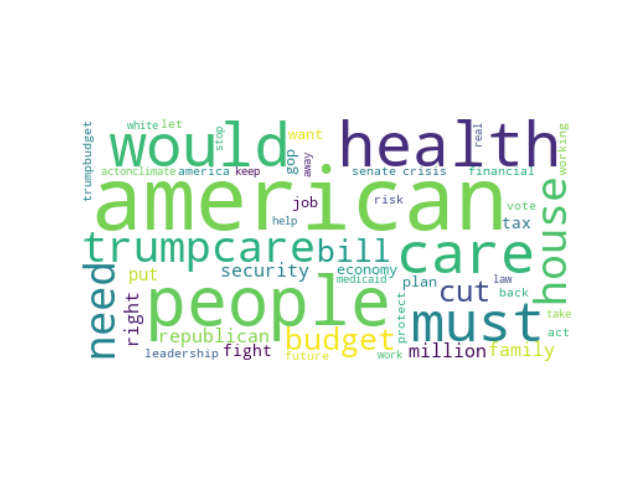

In [43]:
#Generate topic word clouds
topic = 0 # Initialize counter
while topic < NUM_topics:
    topic_words_freq = dict(lda_model.show_topic(topic, topn=50))
    topic += 1    
    # Generate Word Cloud for topic using frequencies
    wordcloud = WordCloud(background_color="white").generate_from_frequencies(topic_words_freq) 
    plot=plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()